In [1]:
from tensorflow.keras.models import load_model
from VisionUtils import *
#from imgaug import augmenters as iaa
from Manager import *
from sklearn.model_selection import train_test_split

import tensorflow.keras.backend as k
import tensorflow as tf
import matplotlib.pyplot as plt
import os 
#import imgaug
import shutil
import tqdm
tf.enable_eager_execution()
tf.__version__

'1.13.1'

In [2]:
# tf.data api batch_size
BATCH_SIZE = 32

In [3]:
m = load_model("Models/FaceNet/model/saved_model.h5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
### Important Dirrectories
IMG_RT_PATH = 'data/processed/images/'
FEATURE_RT_PATH = "data/image_features/"
FEATURE_AUG_RT_PATH = "data/image_aug_features/"
IMG_AUG_RT_PATH = 'data/images_aug/'

In [5]:
import pathlib
data_root = pathlib.Path(IMG_RT_PATH)
print('data_root: ', data_root)

data_root:  data\processed\images


In [6]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [7]:
all_dir_paths = [str(item_path) for item_path in data_root.iterdir() if '.DS_Store' not in str(item_path)]
all_dir_paths[:5]

['data\\processed\\images\\n000001',
 'data\\processed\\images\\n000002',
 'data\\processed\\images\\n000003',
 'data\\processed\\images\\n000004',
 'data\\processed\\images\\n000006']

In [8]:
len(all_dir_paths)

190

In [9]:
image_dir_paths_train, image_dir_paths_test, = train_test_split(all_dir_paths, test_size=0.2, shuffle=False)

In [10]:
len(image_dir_paths_train), image_dir_paths_train[0]

(152, 'data\\processed\\images\\n000001')

In [11]:
len(image_dir_paths_test), image_dir_paths_test[0]

(38, 'data\\processed\\images\\n002351')

In [12]:
all_train_image_paths = []
for image_dir_train_path in tqdm.tqdm(image_dir_paths_train[:606]):
    root = pathlib.Path(image_dir_train_path)
    train_image_paths = list(root.glob('*.jpg'))
    train_image_paths = [ str(item_path) for item_path in train_image_paths if '.DS_Store' not in str(item_path)]
    all_train_image_paths += train_image_paths

random.shuffle(all_train_image_paths)
train_image_count = len(all_train_image_paths)
train_image_count, all_train_image_paths[0]

100%|███████████████████████████████████████████████████████████████████████████████| 152/152 [00:00<00:00, 619.46it/s]


(46493, 'data\\processed\\images\\n000220\\0233_01.jpg')

In [13]:
all_test_image_paths = []
for image_dir_test_path in tqdm.tqdm(image_dir_paths_test[:100]):
    root = pathlib.Path(image_dir_test_path)
    test_image_paths = list(root.glob('*.jpg'))
    test_image_paths = [ str(item_path) for item_path in test_image_paths if '.DS_Store' not in str(item_path)]
    all_test_image_paths += test_image_paths

random.shuffle(all_test_image_paths)
test_image_count = len(all_test_image_paths)
test_image_count, all_test_image_paths[0]

100%|█████████████████████████████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 564.06it/s]


(11176, 'data\\processed\\images\\n002474\\0278_03.jpg')

In [14]:
label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
label_names

['n000001',
 'n000002',
 'n000003',
 'n000004',
 'n000006',
 'n000007',
 'n000008',
 'n000009',
 'n000010',
 'n000012',
 'n000013',
 'n000015',
 'n000016',
 'n000017',
 'n000018',
 'n000019',
 'n000020',
 'n000029',
 'n000032',
 'n000037',
 'n000040',
 'n000045',
 'n000046',
 'n000056',
 'n000065',
 'n000070',
 'n000074',
 'n000076',
 'n000078',
 'n000079',
 'n000082',
 'n000084',
 'n000088',
 'n000094',
 'n000096',
 'n000104',
 'n000106',
 'n000114',
 'n000118',
 'n000119',
 'n000127',
 'n000129',
 'n000130',
 'n000135',
 'n000144',
 'n000148',
 'n000149',
 'n000154',
 'n000158',
 'n000159',
 'n000160',
 'n000163',
 'n000165',
 'n000171',
 'n000172',
 'n000173',
 'n000178',
 'n000180',
 'n000181',
 'n000182',
 'n000186',
 'n000191',
 'n000192',
 'n000196',
 'n000198',
 'n000205',
 'n000208',
 'n000209',
 'n000210',
 'n000211',
 'n000217',
 'n000220',
 'n000223',
 'n000233',
 'n000235',
 'n000259',
 'n000267',
 'n000276',
 'n000278',
 'n000281',
 'n000284',
 'n000294',
 'n000299',
 'n0

In [15]:
label_to_index = dict((name, index) for index,name in enumerate(label_names))
label_to_index

{'n000001': 0,
 'n000002': 1,
 'n000003': 2,
 'n000004': 3,
 'n000006': 4,
 'n000007': 5,
 'n000008': 6,
 'n000009': 7,
 'n000010': 8,
 'n000012': 9,
 'n000013': 10,
 'n000015': 11,
 'n000016': 12,
 'n000017': 13,
 'n000018': 14,
 'n000019': 15,
 'n000020': 16,
 'n000029': 17,
 'n000032': 18,
 'n000037': 19,
 'n000040': 20,
 'n000045': 21,
 'n000046': 22,
 'n000056': 23,
 'n000065': 24,
 'n000070': 25,
 'n000074': 26,
 'n000076': 27,
 'n000078': 28,
 'n000079': 29,
 'n000082': 30,
 'n000084': 31,
 'n000088': 32,
 'n000094': 33,
 'n000096': 34,
 'n000104': 35,
 'n000106': 36,
 'n000114': 37,
 'n000118': 38,
 'n000119': 39,
 'n000127': 40,
 'n000129': 41,
 'n000130': 42,
 'n000135': 43,
 'n000144': 44,
 'n000148': 45,
 'n000149': 46,
 'n000154': 47,
 'n000158': 48,
 'n000159': 49,
 'n000160': 50,
 'n000163': 51,
 'n000165': 52,
 'n000171': 53,
 'n000172': 54,
 'n000173': 55,
 'n000178': 56,
 'n000180': 57,
 'n000181': 58,
 'n000182': 59,
 'n000186': 60,
 'n000191': 61,
 'n000192': 62,
 '

In [16]:
index_to_label = dict((index,name) for index,name in enumerate(label_names))
index_to_label

{0: 'n000001',
 1: 'n000002',
 2: 'n000003',
 3: 'n000004',
 4: 'n000006',
 5: 'n000007',
 6: 'n000008',
 7: 'n000009',
 8: 'n000010',
 9: 'n000012',
 10: 'n000013',
 11: 'n000015',
 12: 'n000016',
 13: 'n000017',
 14: 'n000018',
 15: 'n000019',
 16: 'n000020',
 17: 'n000029',
 18: 'n000032',
 19: 'n000037',
 20: 'n000040',
 21: 'n000045',
 22: 'n000046',
 23: 'n000056',
 24: 'n000065',
 25: 'n000070',
 26: 'n000074',
 27: 'n000076',
 28: 'n000078',
 29: 'n000079',
 30: 'n000082',
 31: 'n000084',
 32: 'n000088',
 33: 'n000094',
 34: 'n000096',
 35: 'n000104',
 36: 'n000106',
 37: 'n000114',
 38: 'n000118',
 39: 'n000119',
 40: 'n000127',
 41: 'n000129',
 42: 'n000130',
 43: 'n000135',
 44: 'n000144',
 45: 'n000148',
 46: 'n000149',
 47: 'n000154',
 48: 'n000158',
 49: 'n000159',
 50: 'n000160',
 51: 'n000163',
 52: 'n000165',
 53: 'n000171',
 54: 'n000172',
 55: 'n000173',
 56: 'n000178',
 57: 'n000180',
 58: 'n000181',
 59: 'n000182',
 60: 'n000186',
 61: 'n000191',
 62: 'n000192',
 6

In [17]:
all_train_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_train_image_paths]

print("First 10 labels indices: ", all_train_image_labels[:10])

First 10 labels indices:  [71, 111, 120, 83, 58, 54, 47, 108, 118, 53]


In [18]:
all_test_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_test_image_paths]

print("First 10 labels indices: ", all_test_image_labels[:10])

First 10 labels indices:  [153, 166, 167, 183, 152, 174, 158, 158, 173, 169]


In [19]:
all_test_image_labels[:10]

[153, 166, 167, 183, 152, 174, 158, 158, 173, 169]

In [20]:
def load_positive_path_match(label_index, img_path1, base="data\\processed\\images\\"):
    label = index_to_label[label_index]
    dir_path = base+label
    img_path2 = dir_path+'\\'+random.choice(os.listdir(dir_path))
    return label_index, img_path1, label_index, img_path2
    

In [21]:
def load_random_path_match(label_index1, img_path1, dirs, base="data\\processed\\images\\"):
    random_dir = random.choice(dirs)
    label = random_dir.split('\\')[-1]
    label_index = label_to_index[label]
    dir_files = os.listdir(random_dir)
    if label_index == label_index1:
        print('random_dir: ', random_dir)
        print('label: ', label)
        print('label_index : ', label_index)
        print('label_index1: ', label_index1)
        print('img_path1: ', img_path1)
    if len(dir_files) != 0:
        random_file = random.choice(dir_files)
        while '.jpg' not in random_file:
            #print('redo random.choice(dir_files) : ', random_dir)
            random_file = random.choice(dir_files)
        img_path2 = random_dir+'\\'+random_file
        #print('img_path1: ', img_path1)
        #print('img_path2: ', img_path2)
        return label_index1, img_path1, label_index, img_path2
    else:
        return '', '', '', ''


In [22]:
img_path1 = all_train_image_paths[0]
label_index = all_train_image_labels[0]
load_random_path_match(label_index, img_path1, image_dir_paths_train)

(71,
 'data\\processed\\images\\n000220\\0233_01.jpg',
 66,
 'data\\processed\\images\\n000208\\0050_01.jpg')

In [23]:
img_path1 = all_train_image_paths[0]
label_index = all_train_image_labels[0]
load_positive_path_match(label_index, img_path1)

(71,
 'data\\processed\\images\\n000220\\0233_01.jpg',
 71,
 'data\\processed\\images\\n000220\\0392_02.jpg')

In [28]:
index_to_label[66]

'n000208'

In [24]:
all_train_image_paths[0]


'data\\processed\\images\\n000220\\0233_01.jpg'

In [25]:
all_train_image_labels[0]

71

In [30]:
all_train_image_pair_paths = []
all_train_image_pair_labels = []
all_train_data_labels = []

for label_index, image_path in tqdm.tqdm(zip(all_train_image_labels, all_train_image_paths), total=len(all_train_image_labels)):
    choice = random.choice([0,1])
    if choice == 0:
        label_index1, img_path1, label_index2, img_path2 = load_random_path_match(label_index, image_path, image_dir_paths_train)
        all_train_image_pair_paths.append((img_path1, img_path2))
        all_train_image_pair_labels.append((label_index1, label_index2))
        if label_index1 == label_index2:
            all_train_data_labels.append(1)
            print()
            print(img_path1)
            print(img_path2)
            print(label_index1)
            print(label_index2)
            print()
            
        else:
            all_train_data_labels.append(0)
   

len(all_train_image_pair_paths), len(all_train_image_pair_labels), len(all_train_data_labels) 

  0%|                                                                                        | 0/46493 [00:00<?, ?it/s]

random_dir:  data\processed\images\n002080
label:  n002080
label_index :  144
label_index1:  144
img_path1:  data\processed\images\n002080\0130_01.jpg

data\processed\images\n002080\0130_01.jpg
data\processed\images\n002080\0006_01.jpg
144
144



  1%|▉                                                                           | 584/46493 [00:00<00:07, 5822.97it/s]

random_dir:  data\processed\images\n000020
label:  n000020
label_index :  16
label_index1:  16
img_path1:  data\processed\images\n000020\0184_01.jpg

data\processed\images\n000020\0184_01.jpg
data\processed\images\n000020\0205_02.jpg
16
16

random_dir:  data\processed\images\n000284
label:  n000284
label_index :  80
label_index1:  80
img_path1:  data\processed\images\n000284\0250_01.jpg

data\processed\images\n000284\0250_01.jpg
data\processed\images\n000284\0414_01.jpg
80
80



  2%|█▍                                                                          | 875/46493 [00:00<00:10, 4324.18it/s]

random_dir:  data\processed\images\n001923
label:  n001923
label_index :  142
label_index1:  142
img_path1:  data\processed\images\n001923\0194_01.jpg

data\processed\images\n001923\0194_01.jpg
data\processed\images\n001923\0072_01.jpg
142
142

random_dir:  data\processed\images\n000130
label:  n000130
label_index :  42
label_index1:  42
img_path1:  data\processed\images\n000130\0089_01.jpg

data\processed\images\n000130\0089_01.jpg
data\processed\images\n000130\0043_02.jpg
42
42



  3%|█▉                                                                         | 1181/46493 [00:00<00:12, 3724.99it/s]

random_dir:  data\processed\images\n000094
label:  n000094
label_index :  33
label_index1:  33
img_path1:  data\processed\images\n000094\0196_01.jpg

data\processed\images\n000094\0196_01.jpg
data\processed\images\n000094\0474_01.jpg
33
33

random_dir:  data\processed\images\n001127
label:  n001127
label_index :  130
label_index1:  130
img_path1:  data\processed\images\n001127\0018_02.jpg

data\processed\images\n001127\0018_02.jpg
data\processed\images\n001127\0679_01.jpg
130
130

random_dir:  data\processed\images\n000182
label:  n000182
label_index :  59
label_index1:  59
img_path1:  data\processed\images\n000182\0379_01.jpg

data\processed\images\n000182\0379_01.jpg
data\processed\images\n000182\0058_01.jpg
59
59



  3%|██▎                                                                        | 1408/46493 [00:00<00:14, 3076.55it/s]

random_dir:  data\processed\images\n000371
label:  n000371
label_index :  99
label_index1:  99
img_path1:  data\processed\images\n000371\0343_01.jpg

data\processed\images\n000371\0343_01.jpg
data\processed\images\n000371\0129_01.jpg
99
99

random_dir:  data\processed\images\n000130
label:  n000130
label_index :  42
label_index1:  42
img_path1:  data\processed\images\n000130\0066_01.jpg

data\processed\images\n000130\0066_01.jpg
data\processed\images\n000130\0291_04.jpg
42
42



  4%|██▋                                                                        | 1690/46493 [00:00<00:14, 2987.89it/s]

random_dir:  data\processed\images\n000104
label:  n000104
label_index :  35
label_index1:  35
img_path1:  data\processed\images\n000104\0250_01.jpg

data\processed\images\n000104\0250_01.jpg
data\processed\images\n000104\0105_01.jpg
35
35



  5%|███▍                                                                       | 2118/46493 [00:00<00:13, 3280.15it/s]

random_dir:  data\processed\images\n000706
label:  n000706
label_index :  115
label_index1:  115
img_path1:  data\processed\images\n000706\0125_02.jpg

data\processed\images\n000706\0125_02.jpg
data\processed\images\n000706\0019_02.jpg
115
115



  6%|████▎                                                                      | 2644/46493 [00:00<00:11, 3690.84it/s]

random_dir:  data\processed\images\n000284
label:  n000284
label_index :  80
label_index1:  80
img_path1:  data\processed\images\n000284\0079_01.jpg

data\processed\images\n000284\0079_01.jpg
data\processed\images\n000284\0061_01.jpg
80
80

random_dir:  data\processed\images\n001127
label:  n001127
label_index :  130
label_index1:  130
img_path1:  data\processed\images\n001127\0030_01.jpg

data\processed\images\n001127\0030_01.jpg
data\processed\images\n001127\0093_01.jpg
130
130

random_dir:  data\processed\images\n001021
label:  n001021
label_index :  128
label_index1:  128
img_path1:  data\processed\images\n001021\0386_01.jpg

data\processed\images\n001021\0386_01.jpg
data\processed\images\n001021\0141_01.jpg
128
128

random_dir:  data\processed\images\n000928
label:  n000928
label_index :  124
label_index1:  124
img_path1:  data\processed\images\n000928\0184_04.jpg

data\processed\images\n000928\0184_04.jpg
data\processed\images\n000928\0173_01.jpg
124
124



  6%|████▊                                                                      | 3008/46493 [00:00<00:13, 3308.32it/s]

random_dir:  data\processed\images\n000318
label:  n000318
label_index :  83
label_index1:  83
img_path1:  data\processed\images\n000318\0254_01.jpg

data\processed\images\n000318\0254_01.jpg
data\processed\images\n000318\0157_01.jpg
83
83

random_dir:  data\processed\images\n000276
label:  n000276
label_index :  77
label_index1:  77
img_path1:  data\processed\images\n000276\0076_04.jpg

data\processed\images\n000276\0076_04.jpg
data\processed\images\n000276\0246_01.jpg
77
77



  7%|█████▌                                                                     | 3436/46493 [00:00<00:12, 3543.67it/s]

random_dir:  data\processed\images\n000114
label:  n000114
label_index :  37
label_index1:  37
img_path1:  data\processed\images\n000114\0042_01.jpg

data\processed\images\n000114\0042_01.jpg
data\processed\images\n000114\0297_01.jpg
37
37



  9%|██████▍                                                                    | 3982/46493 [00:01<00:10, 3954.66it/s]

random_dir:  data\processed\images\n000689
label:  n000689
label_index :  114
label_index1:  114
img_path1:  data\processed\images\n000689\0229_02.jpg

data\processed\images\n000689\0229_02.jpg
data\processed\images\n000689\0254_01.jpg
114
114



 10%|███████▎                                                                   | 4534/46493 [00:01<00:09, 4314.97it/s]

random_dir:  data\processed\images\n000158
label:  n000158
label_index :  48
label_index1:  48
img_path1:  data\processed\images\n000158\0186_01.jpg

data\processed\images\n000158\0186_01.jpg
data\processed\images\n000158\0199_04.jpg
48
48



 11%|████████▎                                                                  | 5159/46493 [00:01<00:08, 4716.69it/s]

random_dir:  data\processed\images\n000322
label:  n000322
label_index :  86
label_index1:  86
img_path1:  data\processed\images\n000322\0394_05.jpg

data\processed\images\n000322\0394_05.jpg
data\processed\images\n000322\0136_02.jpg
86
86



 12%|█████████▏                                                                 | 5680/46493 [00:01<00:08, 4844.69it/s]

random_dir:  data\processed\images\n002158
label:  n002158
label_index :  146
label_index1:  146
img_path1:  data\processed\images\n002158\0202_01.jpg

data\processed\images\n002158\0202_01.jpg
data\processed\images\n002158\0306_01.jpg
146
146

random_dir:  data\processed\images\n000104
label:  n000104
label_index :  35
label_index1:  35
img_path1:  data\processed\images\n000104\0331_02.jpg

data\processed\images\n000104\0331_02.jpg
data\processed\images\n000104\0115_03.jpg
35
35

random_dir:  data\processed\images\n000127
label:  n000127
label_index :  40
label_index1:  40
img_path1:  data\processed\images\n000127\0243_02.jpg

data\processed\images\n000127\0243_02.jpg
data\processed\images\n000127\0016_01.jpg
40
40



 13%|█████████▉                                                                 | 6185/46493 [00:01<00:10, 4029.45it/s]

random_dir:  data\processed\images\n000018
label:  n000018
label_index :  14
label_index1:  14
img_path1:  data\processed\images\n000018\0171_02.jpg

data\processed\images\n000018\0171_02.jpg
data\processed\images\n000018\0158_01.jpg
14
14

random_dir:  data\processed\images\n000017
label:  n000017
label_index :  13
label_index1:  13
img_path1:  data\processed\images\n000017\0060_01.jpg

data\processed\images\n000017\0060_01.jpg
data\processed\images\n000017\0028_01.jpg
13
13



 14%|██████████▋                                                                | 6626/46493 [00:01<00:10, 3929.91it/s]

random_dir:  data\processed\images\n000838
label:  n000838
label_index :  122
label_index1:  122
img_path1:  data\processed\images\n000838\0489_02.jpg

data\processed\images\n000838\0489_02.jpg
data\processed\images\n000838\0077_01.jpg
122
122



 17%|████████████▍                                                              | 7738/46493 [00:01<00:08, 4540.79it/s]

random_dir:  data\processed\images\n000348
label:  n000348
label_index :  91
label_index1:  91
img_path1:  data\processed\images\n000348\0121_01.jpg

data\processed\images\n000348\0121_01.jpg
data\processed\images\n000348\0216_01.jpg
91
91



 18%|█████████████▍                                                             | 8356/46493 [00:01<00:07, 4925.09it/s]

random_dir:  data\processed\images\n000016
label:  n000016
label_index :  12
label_index1:  12
img_path1:  data\processed\images\n000016\0290_01.jpg

data\processed\images\n000016\0290_01.jpg
data\processed\images\n000016\0310_01.jpg
12
12

random_dir:  data\processed\images\n000017
label:  n000017
label_index :  13
label_index1:  13
img_path1:  data\processed\images\n000017\0002_02.jpg

data\processed\images\n000017\0002_02.jpg
data\processed\images\n000017\0355_01.jpg
13
13

random_dir:  data\processed\images\n000366
label:  n000366
label_index :  97
label_index1:  97
img_path1:  data\processed\images\n000366\0179_01.jpg

data\processed\images\n000366\0179_01.jpg
data\processed\images\n000366\0102_01.jpg
97
97



 19%|██████████████▎                                                            | 8888/46493 [00:02<00:08, 4382.55it/s]

random_dir:  data\processed\images\n002267
label:  n002267
label_index :  150
label_index1:  150
img_path1:  data\processed\images\n002267\0257_01.jpg

data\processed\images\n002267\0257_01.jpg
data\processed\images\n002267\0236_02.jpg
150
150

random_dir:  data\processed\images\n000192
label:  n000192
label_index :  62
label_index1:  62
img_path1:  data\processed\images\n000192\0063_01.jpg

data\processed\images\n000192\0063_01.jpg
data\processed\images\n000192\0113_01.jpg
62
62

random_dir:  data\processed\images\n000208
label:  n000208
label_index :  66
label_index1:  66
img_path1:  data\processed\images\n000208\0111_01.jpg

data\processed\images\n000208\0111_01.jpg
data\processed\images\n000208\0218_03.jpg
66
66



 20%|███████████████                                                            | 9365/46493 [00:02<00:09, 4029.54it/s]

random_dir:  data\processed\images\n000336
label:  n000336
label_index :  88
label_index1:  88
img_path1:  data\processed\images\n000336\0240_01.jpg

data\processed\images\n000336\0240_01.jpg
data\processed\images\n000336\0173_01.jpg
88
88



 21%|███████████████▉                                                           | 9901/46493 [00:02<00:08, 4193.40it/s]

random_dir:  data\processed\images\n000181
label:  n000181
label_index :  58
label_index1:  58
img_path1:  data\processed\images\n000181\0009_01.jpg

data\processed\images\n000181\0009_01.jpg
data\processed\images\n000181\0161_02.jpg
58
58

random_dir:  data\processed\images\n000003
label:  n000003
label_index :  2
label_index1:  2
img_path1:  data\processed\images\n000003\0132_01.jpg

data\processed\images\n000003\0132_01.jpg
data\processed\images\n000003\0165_01.jpg
2
2



 24%|█████████████████▌                                                        | 11073/46493 [00:02<00:08, 4346.25it/s]

random_dir:  data\processed\images\n000480
label:  n000480
label_index :  106
label_index1:  106
img_path1:  data\processed\images\n000480\0067_02.jpg

data\processed\images\n000480\0067_02.jpg
data\processed\images\n000480\0011_01.jpg
106
106



 25%|██████████████████▌                                                       | 11697/46493 [00:02<00:07, 4773.59it/s]

random_dir:  data\processed\images\n002158
label:  n002158
label_index :  146
label_index1:  146
img_path1:  data\processed\images\n002158\0192_03.jpg

data\processed\images\n002158\0192_03.jpg
data\processed\images\n002158\0116_01.jpg
146
146

random_dir:  data\processed\images\n000119
label:  n000119
label_index :  39
label_index1:  39
img_path1:  data\processed\images\n000119\0208_01.jpg

data\processed\images\n000119\0208_01.jpg
data\processed\images\n000119\0026_01.jpg
39
39

random_dir:  data\processed\images\n000088
label:  n000088
label_index :  32
label_index1:  32
img_path1:  data\processed\images\n000088\0030_01.jpg

data\processed\images\n000088\0030_01.jpg
data\processed\images\n000088\0265_01.jpg
32
32



 26%|███████████████████▍                                                      | 12230/46493 [00:02<00:07, 4363.79it/s]

random_dir:  data\processed\images\n000452
label:  n000452
label_index :  105
label_index1:  105
img_path1:  data\processed\images\n000452\0290_01.jpg

data\processed\images\n000452\0290_01.jpg
data\processed\images\n000452\0171_01.jpg
105
105



 28%|████████████████████▍                                                     | 12814/46493 [00:02<00:07, 4713.18it/s]

random_dir:  data\processed\images\n000267
label:  n000267
label_index :  76
label_index1:  76
img_path1:  data\processed\images\n000267\0152_01.jpg

data\processed\images\n000267\0152_01.jpg
data\processed\images\n000267\0411_01.jpg
76
76

random_dir:  data\processed\images\n000065
label:  n000065
label_index :  24
label_index1:  24
img_path1:  data\processed\images\n000065\0361_01.jpg

data\processed\images\n000065\0361_01.jpg
data\processed\images\n000065\0039_01.jpg
24
24



 29%|█████████████████████▏                                                    | 13351/46493 [00:03<00:07, 4691.84it/s]

random_dir:  data\processed\images\n000029
label:  n000029
label_index :  17
label_index1:  17
img_path1:  data\processed\images\n000029\0461_01.jpg

data\processed\images\n000029\0461_01.jpg
data\processed\images\n000029\0156_01.jpg
17
17



 30%|██████████████████████                                                    | 13891/46493 [00:03<00:06, 4873.94it/s]

random_dir:  data\processed\images\n000084
label:  n000084
label_index :  31
label_index1:  31
img_path1:  data\processed\images\n000084\0079_01.jpg

data\processed\images\n000084\0079_01.jpg
data\processed\images\n000084\0063_01.jpg
31
31



 31%|██████████████████████▉                                                   | 14400/46493 [00:03<00:06, 4856.43it/s]

random_dir:  data\processed\images\n000235
label:  n000235
label_index :  74
label_index1:  74
img_path1:  data\processed\images\n000235\0397_01.jpg

data\processed\images\n000235\0397_01.jpg
data\processed\images\n000235\0244_01.jpg
74
74

random_dir:  data\processed\images\n002216
label:  n002216
label_index :  147
label_index1:  147
img_path1:  data\processed\images\n002216\0148_01.jpg

data\processed\images\n002216\0148_01.jpg
data\processed\images\n002216\0042_01.jpg
147
147

random_dir:  data\processed\images\n000209
label:  n000209
label_index :  67
label_index1:  67
img_path1:  data\processed\images\n000209\0070_01.jpg

data\processed\images\n000209\0070_01.jpg
data\processed\images\n000209\0164_01.jpg
67
67



 32%|███████████████████████▋                                                  | 14901/46493 [00:03<00:07, 4256.54it/s]

random_dir:  data\processed\images\n001439
label:  n001439
label_index :  136
label_index1:  136
img_path1:  data\processed\images\n001439\0390_03.jpg

data\processed\images\n001439\0390_03.jpg
data\processed\images\n001439\0192_01.jpg
136
136



 33%|████████████████████████▋                                                 | 15502/46493 [00:03<00:06, 4657.12it/s]

random_dir:  data\processed\images\n000018
label:  n000018
label_index :  14
label_index1:  14
img_path1:  data\processed\images\n000018\0095_01.jpg

data\processed\images\n000018\0095_01.jpg
data\processed\images\n000018\0288_02.jpg
14
14

random_dir:  data\processed\images\n002267
label:  n002267
label_index :  150
label_index1:  150
img_path1:  data\processed\images\n002267\0196_02.jpg

data\processed\images\n002267\0196_02.jpg
data\processed\images\n002267\0401_01.jpg
150
150



 34%|█████████████████████████▍                                                | 15996/46493 [00:03<00:06, 4424.18it/s]

random_dir:  data\processed\images\n000178
label:  n000178
label_index :  56
label_index1:  56
img_path1:  data\processed\images\n000178\0144_01.jpg

data\processed\images\n000178\0144_01.jpg
data\processed\images\n000178\0085_02.jpg
56
56

random_dir:  data\processed\images\n000324
label:  n000324
label_index :  87
label_index1:  87
img_path1:  data\processed\images\n000324\0114_02.jpg

data\processed\images\n000324\0114_02.jpg
data\processed\images\n000324\0323_01.jpg
87
87

random_dir:  data\processed\images\n002080
label:  n002080
label_index :  144
label_index1:  144
img_path1:  data\processed\images\n002080\0181_01.jpg

data\processed\images\n002080\0181_01.jpg
data\processed\images\n002080\0221_01.jpg
144
144



 35%|██████████████████████████▏                                               | 16461/46493 [00:03<00:08, 3710.40it/s]

random_dir:  data\processed\images\n000658
label:  n000658
label_index :  111
label_index1:  111
img_path1:  data\processed\images\n000658\0229_01.jpg

data\processed\images\n000658\0229_01.jpg
data\processed\images\n000658\0177_01.jpg
111
111

random_dir:  data\processed\images\n000345
label:  n000345
label_index :  90
label_index1:  90
img_path1:  data\processed\images\n000345\0196_01.jpg

data\processed\images\n000345\0196_01.jpg
data\processed\images\n000345\0060_01.jpg
90
90



 36%|██████████████████████████▉                                               | 16930/46493 [00:03<00:07, 3844.28it/s]

random_dir:  data\processed\images\n000320
label:  n000320
label_index :  84
label_index1:  84
img_path1:  data\processed\images\n000320\0019_01.jpg

data\processed\images\n000320\0019_01.jpg
data\processed\images\n000320\0195_01.jpg
84
84



 37%|███████████████████████████▋                                              | 17365/46493 [00:04<00:07, 3975.15it/s]

random_dir:  data\processed\images\n000094
label:  n000094
label_index :  33
label_index1:  33
img_path1:  data\processed\images\n000094\0077_01.jpg

data\processed\images\n000094\0077_01.jpg
data\processed\images\n000094\0169_01.jpg
33
33

random_dir:  data\processed\images\n001655
label:  n001655
label_index :  137
label_index1:  137
img_path1:  data\processed\images\n001655\0530_03.jpg

data\processed\images\n001655\0530_03.jpg
data\processed\images\n001655\0251_02.jpg
137
137



 38%|████████████████████████████▎                                             | 17782/46493 [00:04<00:07, 3932.72it/s]

random_dir:  data\processed\images\n000452
label:  n000452
label_index :  105
label_index1:  105
img_path1:  data\processed\images\n000452\0086_01.jpg

data\processed\images\n000452\0086_01.jpg
data\processed\images\n000452\0205_02.jpg
105
105



 40%|█████████████████████████████▏                                            | 18369/46493 [00:04<00:06, 4357.77it/s]

random_dir:  data\processed\images\n000205
label:  n000205
label_index :  65
label_index1:  65
img_path1:  data\processed\images\n000205\0152_04.jpg

data\processed\images\n000205\0152_04.jpg
data\processed\images\n000205\0251_01.jpg
65
65



 41%|██████████████████████████████▏                                           | 19004/46493 [00:04<00:05, 4802.36it/s]

random_dir:  data\processed\images\n000004
label:  n000004
label_index :  3
label_index1:  3
img_path1:  data\processed\images\n000004\0295_02.jpg

data\processed\images\n000004\0295_02.jpg
data\processed\images\n000004\0052_01.jpg
3
3



 42%|███████████████████████████████▏                                          | 19590/46493 [00:04<00:05, 5067.81it/s]

random_dir:  data\processed\images\n002158
label:  n002158
label_index :  146
label_index1:  146
img_path1:  data\processed\images\n002158\0182_04.jpg

data\processed\images\n002158\0182_04.jpg
data\processed\images\n002158\0064_01.jpg
146
146



 43%|████████████████████████████████                                          | 20130/46493 [00:04<00:05, 5151.85it/s]

random_dir:  data\processed\images\n000205
label:  n000205
label_index :  65
label_index1:  65
img_path1:  data\processed\images\n000205\0110_01.jpg

data\processed\images\n000205\0110_01.jpg
data\processed\images\n000205\0051_01.jpg
65
65

random_dir:  data\processed\images\n000135
label:  n000135
label_index :  43
label_index1:  43
img_path1:  data\processed\images\n000135\0005_01.jpg

data\processed\images\n000135\0005_01.jpg
data\processed\images\n000135\0469_03.jpg
43
43

random_dir:  data\processed\images\n000378
label:  n000378
label_index :  101
label_index1:  101
img_path1:  data\processed\images\n000378\0019_01.jpg

data\processed\images\n000378\0019_01.jpg
data\processed\images\n000378\0256_01.jpg
101
101

random_dir:  data\processed\images\n001199
label:  n001199
label_index :  132
label_index1:  132
img_path1:  data\processed\images\n001199\0090_01.jpg

data\processed\images\n001199\0090_01.jpg
data\processed\images\n001199\0533_01.jpg
132
132

random_dir:  data\processed\

 44%|████████████████████████████████▉                                         | 20664/46493 [00:04<00:06, 3769.32it/s]

random_dir:  data\processed\images\n000029
label:  n000029
label_index :  17
label_index1:  17
img_path1:  data\processed\images\n000029\0218_01.jpg

data\processed\images\n000029\0218_01.jpg
data\processed\images\n000029\0246_01.jpg
17
17

random_dir:  data\processed\images\n000345
label:  n000345
label_index :  90
label_index1:  90
img_path1:  data\processed\images\n000345\0449_01.jpg

data\processed\images\n000345\0449_01.jpg
data\processed\images\n000345\0066_01.jpg
90
90



 45%|█████████████████████████████████▌                                        | 21107/46493 [00:04<00:06, 3755.25it/s]

random_dir:  data\processed\images\n000172
label:  n000172
label_index :  54
label_index1:  54
img_path1:  data\processed\images\n000172\0257_01.jpg

data\processed\images\n000172\0257_01.jpg
data\processed\images\n000172\0233_01.jpg
54
54



 47%|██████████████████████████████████▍                                       | 21630/46493 [00:05<00:06, 4094.95it/s]

random_dir:  data\processed\images\n000192
label:  n000192
label_index :  62
label_index1:  62
img_path1:  data\processed\images\n000192\0024_01.jpg

data\processed\images\n000192\0024_01.jpg
data\processed\images\n000192\0093_01.jpg
62
62

random_dir:  data\processed\images\n001299
label:  n001299
label_index :  134
label_index1:  134
img_path1:  data\processed\images\n001299\0407_01.jpg

data\processed\images\n001299\0407_01.jpg
data\processed\images\n001299\0205_01.jpg
134
134



 47%|███████████████████████████████████▏                                      | 22081/46493 [00:05<00:05, 4122.13it/s]

random_dir:  data\processed\images\n000002
label:  n000002
label_index :  1
label_index1:  1
img_path1:  data\processed\images\n000002\0109_01.jpg

data\processed\images\n000002\0109_01.jpg
data\processed\images\n000002\0071_01.jpg
1
1



 49%|████████████████████████████████████                                      | 22687/46493 [00:05<00:05, 4558.08it/s]

random_dir:  data\processed\images\n000217
label:  n000217
label_index :  70
label_index1:  70
img_path1:  data\processed\images\n000217\0031_01.jpg

data\processed\images\n000217\0031_01.jpg
data\processed\images\n000217\0032_01.jpg
70
70



 50%|████████████████████████████████████▉                                     | 23189/46493 [00:05<00:04, 4677.50it/s]

random_dir:  data\processed\images\n000452
label:  n000452
label_index :  105
label_index1:  105
img_path1:  data\processed\images\n000452\0202_01.jpg

data\processed\images\n000452\0202_01.jpg
data\processed\images\n000452\0040_02.jpg
105
105

random_dir:  data\processed\images\n001956
label:  n001956
label_index :  143
label_index1:  143
img_path1:  data\processed\images\n001956\0104_01.jpg

data\processed\images\n001956\0104_01.jpg
data\processed\images\n001956\0289_03.jpg
143
143

random_dir:  data\processed\images\n000667
label:  n000667
label_index :  113
label_index1:  113
img_path1:  data\processed\images\n000667\0183_02.jpg

data\processed\images\n000667\0183_02.jpg
data\processed\images\n000667\0075_02.jpg
113
113



 51%|█████████████████████████████████████▋                                    | 23682/46493 [00:05<00:05, 3974.40it/s]

random_dir:  data\processed\images\n000596
label:  n000596
label_index :  108
label_index1:  108
img_path1:  data\processed\images\n000596\0195_01.jpg

data\processed\images\n000596\0195_01.jpg
data\processed\images\n000596\0110_03.jpg
108
108

random_dir:  data\processed\images\n000020
label:  n000020
label_index :  16
label_index1:  16
img_path1:  data\processed\images\n000020\0150_01.jpg

data\processed\images\n000020\0150_01.jpg
data\processed\images\n000020\0327_01.jpg
16
16



 52%|██████████████████████████████████████▍                                   | 24116/46493 [00:05<00:06, 3695.80it/s]

random_dir:  data\processed\images\n002109
label:  n002109
label_index :  145
label_index1:  145
img_path1:  data\processed\images\n002109\0559_01.jpg

data\processed\images\n002109\0559_01.jpg
data\processed\images\n002109\0192_01.jpg
145
145



 53%|███████████████████████████████████████                                   | 24555/46493 [00:05<00:05, 3872.40it/s]

random_dir:  data\processed\images\n000046
label:  n000046
label_index :  22
label_index1:  22
img_path1:  data\processed\images\n000046\0285_01.jpg

data\processed\images\n000046\0285_01.jpg
data\processed\images\n000046\0010_01.jpg
22
22



 54%|███████████████████████████████████████▋                                  | 24965/46493 [00:05<00:05, 3863.21it/s]

random_dir:  data\processed\images\n000181
label:  n000181
label_index :  58
label_index1:  58
img_path1:  data\processed\images\n000181\0123_01.jpg

data\processed\images\n000181\0123_01.jpg
data\processed\images\n000181\0132_01.jpg
58
58



 55%|████████████████████████████████████████▌                                 | 25497/46493 [00:05<00:04, 4201.69it/s]

random_dir:  data\processed\images\n000015
label:  n000015
label_index :  11
label_index1:  11
img_path1:  data\processed\images\n000015\0062_01.jpg

data\processed\images\n000015\0062_01.jpg
data\processed\images\n000015\0150_01.jpg
11
11



 56%|█████████████████████████████████████████▎                                | 25994/46493 [00:06<00:04, 4397.46it/s]

random_dir:  data\processed\images\n001655
label:  n001655
label_index :  137
label_index1:  137
img_path1:  data\processed\images\n001655\0031_01.jpg

data\processed\images\n001655\0031_01.jpg
data\processed\images\n001655\0226_01.jpg
137
137



 57%|██████████████████████████████████████████                                | 26450/46493 [00:06<00:04, 4435.13it/s]

random_dir:  data\processed\images\n000394
label:  n000394
label_index :  103
label_index1:  103
img_path1:  data\processed\images\n000394\0418_01.jpg

data\processed\images\n000394\0418_01.jpg
data\processed\images\n000394\0035_01.jpg
103
103



 58%|██████████████████████████████████████████▊                               | 26920/46493 [00:06<00:04, 4502.37it/s]

random_dir:  data\processed\images\n000129
label:  n000129
label_index :  41
label_index1:  41
img_path1:  data\processed\images\n000129\0342_01.jpg

data\processed\images\n000129\0342_01.jpg
data\processed\images\n000129\0083_01.jpg
41
41

random_dir:  data\processed\images\n001439
label:  n001439
label_index :  136
label_index1:  136
img_path1:  data\processed\images\n001439\0101_01.jpg

data\processed\images\n001439\0101_01.jpg
data\processed\images\n001439\0213_01.jpg
136
136



 59%|███████████████████████████████████████████▌                              | 27379/46493 [00:06<00:04, 4315.16it/s]

random_dir:  data\processed\images\n000002
label:  n000002
label_index :  1
label_index1:  1
img_path1:  data\processed\images\n000002\0022_01.jpg

data\processed\images\n000002\0022_01.jpg
data\processed\images\n000002\0101_01.jpg
1
1



 60%|████████████████████████████████████████████▎                             | 27869/46493 [00:06<00:04, 4466.09it/s]

random_dir:  data\processed\images\n000211
label:  n000211
label_index :  69
label_index1:  69
img_path1:  data\processed\images\n000211\0006_01.jpg

data\processed\images\n000211\0006_01.jpg
data\processed\images\n000211\0311_01.jpg
69
69

random_dir:  data\processed\images\n001956
label:  n001956
label_index :  143
label_index1:  143
img_path1:  data\processed\images\n001956\0173_02.jpg

data\processed\images\n001956\0173_02.jpg
data\processed\images\n001956\0175_06.jpg
143
143



 61%|█████████████████████████████████████████████                             | 28323/46493 [00:06<00:04, 4362.83it/s]

random_dir:  data\processed\images\n000106
label:  n000106
label_index :  36
label_index1:  36
img_path1:  data\processed\images\n000106\0096_01.jpg

data\processed\images\n000106\0096_01.jpg
data\processed\images\n000106\0007_01.jpg
36
36

random_dir:  data\processed\images\n000209
label:  n000209
label_index :  67
label_index1:  67
img_path1:  data\processed\images\n000209\0317_02.jpg

data\processed\images\n000209\0317_02.jpg
data\processed\images\n000209\0179_01.jpg
67
67

random_dir:  data\processed\images\n000785
label:  n000785
label_index :  120
label_index1:  120
img_path1:  data\processed\images\n000785\0315_01.jpg

data\processed\images\n000785\0315_01.jpg
data\processed\images\n000785\0146_01.jpg
120
120



 62%|█████████████████████████████████████████████▊                            | 28765/46493 [00:06<00:04, 3611.45it/s]

random_dir:  data\processed\images\n000278
label:  n000278
label_index :  78
label_index1:  78
img_path1:  data\processed\images\n000278\0050_02.jpg

data\processed\images\n000278\0050_02.jpg
data\processed\images\n000278\0092_01.jpg
78
78



 63%|██████████████████████████████████████████████▌                           | 29217/46493 [00:06<00:04, 3836.02it/s]

random_dir:  data\processed\images\n000366
label:  n000366
label_index :  97
label_index1:  97
img_path1:  data\processed\images\n000366\0052_01.jpg

data\processed\images\n000366\0052_01.jpg
data\processed\images\n000366\0156_01.jpg
97
97

random_dir:  data\processed\images\n001127
label:  n001127
label_index :  130
label_index1:  130
img_path1:  data\processed\images\n001127\0432_01.jpg

data\processed\images\n001127\0432_01.jpg
data\processed\images\n001127\0054_02.jpg
130
130



 64%|███████████████████████████████████████████████▏                          | 29622/46493 [00:06<00:04, 3867.72it/s]

random_dir:  data\processed\images\n000037
label:  n000037
label_index :  19
label_index1:  19
img_path1:  data\processed\images\n000037\0128_01.jpg

data\processed\images\n000037\0128_01.jpg
data\processed\images\n000037\0270_01.jpg
19
19



 65%|███████████████████████████████████████████████▉                          | 30115/46493 [00:07<00:03, 4127.39it/s]

random_dir:  data\processed\images\n000198
label:  n000198
label_index :  64
label_index1:  64
img_path1:  data\processed\images\n000198\0187_01.jpg

data\processed\images\n000198\0187_01.jpg
data\processed\images\n000198\0241_02.jpg
64
64

random_dir:  data\processed\images\n000220
label:  n000220
label_index :  71
label_index1:  71
img_path1:  data\processed\images\n000220\0026_01.jpg

data\processed\images\n000220\0026_01.jpg
data\processed\images\n000220\0039_01.jpg
71
71



 66%|████████████████████████████████████████████████▌                         | 30544/46493 [00:07<00:03, 4106.33it/s]

random_dir:  data\processed\images\n000371
label:  n000371
label_index :  99
label_index1:  99
img_path1:  data\processed\images\n000371\0188_01.jpg

data\processed\images\n000371\0188_01.jpg
data\processed\images\n000371\0128_01.jpg
99
99

random_dir:  data\processed\images\n000233
label:  n000233
label_index :  73
label_index1:  73
img_path1:  data\processed\images\n000233\0287_02.jpg

data\processed\images\n000233\0287_02.jpg
data\processed\images\n000233\0202_01.jpg
73
73



 67%|█████████████████████████████████████████████████▎                        | 30966/46493 [00:07<00:04, 3776.91it/s]

random_dir:  data\processed\images\n000391
label:  n000391
label_index :  102
label_index1:  102
img_path1:  data\processed\images\n000391\0130_01.jpg

data\processed\images\n000391\0130_01.jpg
data\processed\images\n000391\0089_01.jpg
102
102



 68%|█████████████████████████████████████████████████▉                        | 31401/46493 [00:07<00:03, 3924.55it/s]

random_dir:  data\processed\images\n000945
label:  n000945
label_index :  125
label_index1:  125
img_path1:  data\processed\images\n000945\0354_01.jpg

data\processed\images\n000945\0354_01.jpg
data\processed\images\n000945\0634_01.jpg
125
125

random_dir:  data\processed\images\n000667
label:  n000667
label_index :  113
label_index1:  113
img_path1:  data\processed\images\n000667\0292_01.jpg

data\processed\images\n000667\0292_01.jpg
data\processed\images\n000667\0152_01.jpg
113
113



 68%|██████████████████████████████████████████████████▋                       | 31826/46493 [00:07<00:03, 4008.31it/s]

random_dir:  data\processed\images\n000172
label:  n000172
label_index :  54
label_index1:  54
img_path1:  data\processed\images\n000172\0018_02.jpg

data\processed\images\n000172\0018_02.jpg
data\processed\images\n000172\0312_02.jpg
54
54

random_dir:  data\processed\images\n000148
label:  n000148
label_index :  45
label_index1:  45
img_path1:  data\processed\images\n000148\0134_02.jpg

data\processed\images\n000148\0134_02.jpg
data\processed\images\n000148\0100_01.jpg
45
45



 69%|███████████████████████████████████████████████████▎                      | 32235/46493 [00:07<00:03, 3908.92it/s]

random_dir:  data\processed\images\n000348
label:  n000348
label_index :  91
label_index1:  91
img_path1:  data\processed\images\n000348\0102_01.jpg

data\processed\images\n000348\0102_01.jpg
data\processed\images\n000348\0030_01.jpg
91
91

random_dir:  data\processed\images\n001199
label:  n001199
label_index :  132
label_index1:  132
img_path1:  data\processed\images\n001199\0422_01.jpg

data\processed\images\n001199\0422_01.jpg
data\processed\images\n001199\0113_02.jpg
132
132



 70%|████████████████████████████████████████████████████                      | 32688/46493 [00:07<00:03, 4057.67it/s]

random_dir:  data\processed\images\n001655
label:  n001655
label_index :  137
label_index1:  137
img_path1:  data\processed\images\n001655\0211_02.jpg

data\processed\images\n001655\0211_02.jpg
data\processed\images\n001655\0070_01.jpg
137
137



 71%|████████████████████████████████████████████████████▊                     | 33185/46493 [00:07<00:03, 4285.69it/s]

random_dir:  data\processed\images\n000171
label:  n000171
label_index :  53
label_index1:  53
img_path1:  data\processed\images\n000171\0234_01.jpg

data\processed\images\n000171\0234_01.jpg
data\processed\images\n000171\0192_01.jpg
53
53



 73%|█████████████████████████████████████████████████████▋                    | 33720/46493 [00:07<00:02, 4549.55it/s]

random_dir:  data\processed\images\n000127
label:  n000127
label_index :  40
label_index1:  40
img_path1:  data\processed\images\n000127\0209_01.jpg

data\processed\images\n000127\0209_01.jpg
data\processed\images\n000127\0055_01.jpg
40
40

random_dir:  data\processed\images\n000259
label:  n000259
label_index :  75
label_index1:  75
img_path1:  data\processed\images\n000259\0367_02.jpg

data\processed\images\n000259\0367_02.jpg
data\processed\images\n000259\0193_01.jpg
75
75



 74%|██████████████████████████████████████████████████████▍                   | 34185/46493 [00:08<00:02, 4375.98it/s]

random_dir:  data\processed\images\n000452
label:  n000452
label_index :  105
label_index1:  105
img_path1:  data\processed\images\n000452\0085_01.jpg

data\processed\images\n000452\0085_01.jpg
data\processed\images\n000452\0381_02.jpg
105
105



 75%|███████████████████████████████████████████████████████▎                  | 34743/46493 [00:08<00:02, 4670.63it/s]

random_dir:  data\processed\images\n000172
label:  n000172
label_index :  54
label_index1:  54
img_path1:  data\processed\images\n000172\0294_01.jpg

data\processed\images\n000172\0294_01.jpg
data\processed\images\n000172\0187_01.jpg
54
54

random_dir:  data\processed\images\n000096
label:  n000096
label_index :  34
label_index1:  34
img_path1:  data\processed\images\n000096\0516_01.jpg

data\processed\images\n000096\0516_01.jpg
data\processed\images\n000096\0263_01.jpg
34
34



 76%|████████████████████████████████████████████████████████                  | 35222/46493 [00:08<00:02, 4561.51it/s]

random_dir:  data\processed\images\n000019
label:  n000019
label_index :  15
label_index1:  15
img_path1:  data\processed\images\n000019\0262_01.jpg

data\processed\images\n000019\0262_01.jpg
data\processed\images\n000019\0160_01.jpg
15
15



 78%|█████████████████████████████████████████████████████████▉                | 36396/46493 [00:08<00:01, 5127.69it/s]

random_dir:  data\processed\images\n000032
label:  n000032
label_index :  18
label_index1:  18
img_path1:  data\processed\images\n000032\0151_01.jpg

data\processed\images\n000032\0151_01.jpg
data\processed\images\n000032\0078_01.jpg
18
18

random_dir:  data\processed\images\n000191
label:  n000191
label_index :  61
label_index1:  61
img_path1:  data\processed\images\n000191\0233_01.jpg

data\processed\images\n000191\0233_01.jpg
data\processed\images\n000191\0006_01.jpg
61
61



 79%|██████████████████████████████████████████████████████████▊               | 36931/46493 [00:08<00:01, 4844.05it/s]

random_dir:  data\processed\images\n000186
label:  n000186
label_index :  60
label_index1:  60
img_path1:  data\processed\images\n000186\0131_03.jpg

data\processed\images\n000186\0131_03.jpg
data\processed\images\n000186\0345_01.jpg
60
60

random_dir:  data\processed\images\n000171
label:  n000171
label_index :  53
label_index1:  53
img_path1:  data\processed\images\n000171\0085_01.jpg

data\processed\images\n000171\0085_01.jpg
data\processed\images\n000171\0469_01.jpg
53
53



 81%|███████████████████████████████████████████████████████████▌              | 37434/46493 [00:08<00:02, 4356.36it/s]

random_dir:  data\processed\images\n000171
label:  n000171
label_index :  53
label_index1:  53
img_path1:  data\processed\images\n000171\0353_01.jpg

data\processed\images\n000171\0353_01.jpg
data\processed\images\n000171\0292_02.jpg
53
53

random_dir:  data\processed\images\n001672
label:  n001672
label_index :  138
label_index1:  138
img_path1:  data\processed\images\n001672\0344_03.jpg

data\processed\images\n001672\0344_03.jpg
data\processed\images\n001672\0344_03.jpg
138
138



 82%|████████████████████████████████████████████████████████████▎             | 37892/46493 [00:08<00:02, 3836.76it/s]

random_dir:  data\processed\images\n000149
label:  n000149
label_index :  46
label_index1:  46
img_path1:  data\processed\images\n000149\0052_02.jpg

data\processed\images\n000149\0052_02.jpg
data\processed\images\n000149\0282_01.jpg
46
46

random_dir:  data\processed\images\n000104
label:  n000104
label_index :  35
label_index1:  35
img_path1:  data\processed\images\n000104\0142_01.jpg

data\processed\images\n000104\0142_01.jpg
data\processed\images\n000104\0185_01.jpg
35
35



 82%|████████████████████████████████████████████████████████████▉             | 38303/46493 [00:08<00:02, 3463.37it/s]

random_dir:  data\processed\images\n000958
label:  n000958
label_index :  127
label_index1:  127
img_path1:  data\processed\images\n000958\0044_01.jpg

data\processed\images\n000958\0044_01.jpg
data\processed\images\n000958\0190_01.jpg
127
127



 84%|█████████████████████████████████████████████████████████████▉            | 38883/46493 [00:09<00:01, 3933.65it/s]

random_dir:  data\processed\images\n002267
label:  n002267
label_index :  150
label_index1:  150
img_path1:  data\processed\images\n002267\0010_02.jpg

data\processed\images\n002267\0010_02.jpg
data\processed\images\n002267\0217_01.jpg
150
150

random_dir:  data\processed\images\n000394
label:  n000394
label_index :  103
label_index1:  103
img_path1:  data\processed\images\n000394\0134_01.jpg

data\processed\images\n000394\0134_01.jpg
data\processed\images\n000394\0220_01.jpg
103
103

random_dir:  data\processed\images\n000210
label:  n000210
label_index :  68
label_index1:  68
img_path1:  data\processed\images\n000210\0127_01.jpg

data\processed\images\n000210\0127_01.jpg
data\processed\images\n000210\0148_03.jpg
68
68



 85%|██████████████████████████████████████████████████████████████▌           | 39317/46493 [00:09<00:01, 3625.20it/s]

random_dir:  data\processed\images\n000159
label:  n000159
label_index :  49
label_index1:  49
img_path1:  data\processed\images\n000159\0165_01.jpg

data\processed\images\n000159\0165_01.jpg
data\processed\images\n000159\0203_01.jpg
49
49

random_dir:  data\processed\images\n001299
label:  n001299
label_index :  134
label_index1:  134
img_path1:  data\processed\images\n001299\0005_01.jpg

data\processed\images\n001299\0005_01.jpg
data\processed\images\n001299\0260_01.jpg
134
134



 85%|███████████████████████████████████████████████████████████████▏          | 39713/46493 [00:09<00:01, 3468.70it/s]

random_dir:  data\processed\images\n000220
label:  n000220
label_index :  71
label_index1:  71
img_path1:  data\processed\images\n000220\0328_01.jpg

data\processed\images\n000220\0328_01.jpg
data\processed\images\n000220\0147_01.jpg
71
71

random_dir:  data\processed\images\n000114
label:  n000114
label_index :  37
label_index1:  37
img_path1:  data\processed\images\n000114\0093_01.jpg

data\processed\images\n000114\0093_01.jpg
data\processed\images\n000114\0095_01.jpg
37
37



 86%|███████████████████████████████████████████████████████████████▊          | 40085/46493 [00:09<00:01, 3454.55it/s]

random_dir:  data\processed\images\n000220
label:  n000220
label_index :  71
label_index1:  71
img_path1:  data\processed\images\n000220\0181_01.jpg

data\processed\images\n000220\0181_01.jpg
data\processed\images\n000220\0019_01.jpg
71
71



 87%|████████████████████████████████████████████████████████████████▌         | 40591/46493 [00:09<00:01, 3811.65it/s]

random_dir:  data\processed\images\n000958
label:  n000958
label_index :  127
label_index1:  127
img_path1:  data\processed\images\n000958\0093_02.jpg

data\processed\images\n000958\0093_02.jpg
data\processed\images\n000958\0248_02.jpg
127
127

random_dir:  data\processed\images\n000378
label:  n000378
label_index :  101
label_index1:  101
img_path1:  data\processed\images\n000378\0341_01.jpg

data\processed\images\n000378\0341_01.jpg
data\processed\images\n000378\0565_01.jpg
101
101



 88%|█████████████████████████████████████████████████████████████████▎        | 40996/46493 [00:09<00:01, 3604.00it/s]

random_dir:  data\processed\images\n000452
label:  n000452
label_index :  105
label_index1:  105
img_path1:  data\processed\images\n000452\0052_09.jpg

data\processed\images\n000452\0052_09.jpg
data\processed\images\n000452\0205_02.jpg
105
105



 89%|█████████████████████████████████████████████████████████████████▉        | 41433/46493 [00:09<00:01, 3796.78it/s]

random_dir:  data\processed\images\n000294
label:  n000294
label_index :  81
label_index1:  81
img_path1:  data\processed\images\n000294\0207_01.jpg

data\processed\images\n000294\0207_01.jpg
data\processed\images\n000294\0229_01.jpg
81
81



 90%|██████████████████████████████████████████████████████████████████▋       | 41872/46493 [00:09<00:01, 3949.40it/s]

random_dir:  data\processed\images\n000009
label:  n000009
label_index :  7
label_index1:  7
img_path1:  data\processed\images\n000009\0112_02.jpg

data\processed\images\n000009\0112_02.jpg
data\processed\images\n000009\0083_01.jpg
7
7



 91%|███████████████████████████████████████████████████████████████████▍      | 42345/46493 [00:09<00:01, 4147.14it/s]

random_dir:  data\processed\images\n000001
label:  n000001
label_index :  0
label_index1:  0
img_path1:  data\processed\images\n000001\0162_06.jpg

data\processed\images\n000001\0162_06.jpg
data\processed\images\n000001\0334_01.jpg
0
0

random_dir:  data\processed\images\n000359
label:  n000359
label_index :  94
label_index1:  94
img_path1:  data\processed\images\n000359\0190_01.jpg

data\processed\images\n000359\0190_01.jpg
data\processed\images\n000359\0510_01.jpg
94
94



 92%|████████████████████████████████████████████████████████████████████      | 42772/46493 [00:10<00:00, 3737.05it/s]

random_dir:  data\processed\images\n000667
label:  n000667
label_index :  113
label_index1:  113
img_path1:  data\processed\images\n000667\0442_02.jpg

data\processed\images\n000667\0442_02.jpg
data\processed\images\n000667\0234_01.jpg
113
113

random_dir:  data\processed\images\n000480
label:  n000480
label_index :  106
label_index1:  106
img_path1:  data\processed\images\n000480\0346_03.jpg

data\processed\images\n000480\0346_03.jpg
data\processed\images\n000480\0411_01.jpg
106
106

random_dir:  data\processed\images\n000082
label:  n000082
label_index :  30
label_index1:  30
img_path1:  data\processed\images\n000082\0562_02.jpg

data\processed\images\n000082\0562_02.jpg
data\processed\images\n000082\0087_03.jpg
30
30

random_dir:  data\processed\images\n001299
label:  n001299
label_index :  134
label_index1:  134
img_path1:  data\processed\images\n001299\0179_03.jpg

data\processed\images\n001299\0179_03.jpg
data\processed\images\n001299\0039_02.jpg
134
134

random_dir:  data\proces

 94%|█████████████████████████████████████████████████████████████████████▎    | 43559/46493 [00:10<00:01, 2928.31it/s]

random_dir:  data\processed\images\n000348
label:  n000348
label_index :  91
label_index1:  91
img_path1:  data\processed\images\n000348\0077_01.jpg

data\processed\images\n000348\0077_01.jpg
data\processed\images\n000348\0071_02.jpg
91
91



 95%|██████████████████████████████████████████████████████████████████████    | 43999/46493 [00:10<00:00, 3251.00it/s]

random_dir:  data\processed\images\n000366
label:  n000366
label_index :  97
label_index1:  97
img_path1:  data\processed\images\n000366\0060_03.jpg

data\processed\images\n000366\0060_03.jpg
data\processed\images\n000366\0135_01.jpg
97
97

random_dir:  data\processed\images\n000211
label:  n000211
label_index :  69
label_index1:  69
img_path1:  data\processed\images\n000211\0278_01.jpg

data\processed\images\n000211\0278_01.jpg
data\processed\images\n000211\0166_01.jpg
69
69



 95%|██████████████████████████████████████████████████████████████████████▌   | 44370/46493 [00:10<00:00, 3009.88it/s]

random_dir:  data\processed\images\n000281
label:  n000281
label_index :  79
label_index1:  79
img_path1:  data\processed\images\n000281\0113_01.jpg

data\processed\images\n000281\0113_01.jpg
data\processed\images\n000281\0206_01.jpg
79
79

random_dir:  data\processed\images\n000659
label:  n000659
label_index :  112
label_index1:  112
img_path1:  data\processed\images\n000659\0401_01.jpg

data\processed\images\n000659\0401_01.jpg
data\processed\images\n000659\0159_02.jpg
112
112



 97%|███████████████████████████████████████████████████████████████████████▉  | 45194/46493 [00:10<00:00, 3374.68it/s]

random_dir:  data\processed\images\n000785
label:  n000785
label_index :  120
label_index1:  120
img_path1:  data\processed\images\n000785\0086_01.jpg

data\processed\images\n000785\0086_01.jpg
data\processed\images\n000785\0091_02.jpg
120
120



 99%|█████████████████████████████████████████████████████████████████████████▍| 46143/46493 [00:11<00:00, 3856.18it/s]

random_dir:  data\processed\images\n000172
label:  n000172
label_index :  54
label_index1:  54
img_path1:  data\processed\images\n000172\0106_01.jpg

data\processed\images\n000172\0106_01.jpg
data\processed\images\n000172\0152_01.jpg
54
54



100%|██████████████████████████████████████████████████████████████████████████| 46493/46493 [00:11<00:00, 4118.74it/s]


(23435, 23435, 23435)

In [55]:
img_path1

'data\\processed\\images\\n000119\\0161_05.jpg'

In [56]:
img_path2

'data\\processed\\images\\n005956\\0466_01.jpg'

In [57]:
all_train_image_pair_paths[:5], all_train_image_pair_labels[:5], all_train_data_labels[:10]

([('data\\processed\\images\\n000119\\0161_05.jpg',
   'data\\processed\\images\\n000016\\0033_01.jpg'),
  ('data\\processed\\images\\n000119\\0161_05.jpg',
   'data\\processed\\images\\n000391\\0536_01.jpg'),
  ('data\\processed\\images\\n000119\\0161_05.jpg',
   'data\\processed\\images\\n002761\\0008_02.jpg'),
  ('data\\processed\\images\\n000119\\0161_05.jpg',
   'data\\processed\\images\\n000008\\0178_01.jpg'),
  ('data\\processed\\images\\n000119\\0161_05.jpg',
   'data\\processed\\images\\n000010\\0115_02.jpg')],
 [(96, 12), (26, 102), (24, 154), (174, 6), (123, 8)],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [27]:
a, b = list(zip(*all_train_image_pair_paths[:5]))
a

('data\\processed\\images\\n000040\\0182_01.jpg',
 'data\\processed\\images\\n000040\\0182_01.jpg',
 'data\\processed\\images\\n000040\\0182_01.jpg',
 'data\\processed\\images\\n000040\\0182_01.jpg',
 'data\\processed\\images\\n000040\\0182_01.jpg')

In [28]:
all_test_image_pair_paths = []
all_test_image_pair_labels = []
all_test_data_labels = []

for label_index, image_path in tqdm.tqdm(zip(all_test_image_labels, all_test_image_paths), total=len(all_test_image_labels)):
    choice = random.choice([0,1])
    if choice == 0:
        label_index1, img_path1, label_index2, img_path2 = load_random_path_match(label_index, img_path1, image_dir_paths_train)
        all_test_image_pair_paths.append((img_path1, img_path2))
        all_test_image_pair_labels.append((label_index1, label_index2))
        if label_index1 == label_index2:
            all_test_data_labels.append(1)
        else:
            all_test_data_labels.append(0)
    else:
        label_index1, img_path1, label_index2, img_path2 = load_positive_path_match(label_index, img_path1)
        all_test_image_pair_paths.append((img_path1, img_path2))
        all_test_image_pair_labels.append((label_index1, label_index2))
        if label_index1 == label_index2:
            all_test_data_labels.append(1)
        else:
            all_test_data_labels.append(0)

len(all_test_image_pair_paths), len(all_test_image_pair_labels), len(all_test_data_labels) 

100%|██████████████████████████████████████████████████████████████████████████| 11140/11140 [00:02<00:00, 4849.65it/s]


(11140, 11140, 11140)

In [29]:
all_test_image_pair_paths[:5], all_test_image_pair_labels[:5], all_test_data_labels[:10]

([('data\\processed\\images\\n000040\\0182_01.jpg',
   'data/processed/images/n000018/0201_01.jpg'),
  ('data\\processed\\images\\n000040\\0182_01.jpg',
   'data\\processed\\images\\n009294/0115_01.jpg'),
  ('data\\processed\\images\\n000040\\0182_01.jpg',
   'data/processed/images/n000135/0216_01.jpg'),
  ('data\\processed\\images\\n000040\\0182_01.jpg',
   'data\\processed\\images\\n000084/0731_01.jpg'),
  ('data\\processed\\images\\n000040\\0182_01.jpg',
   'data\\processed\\images\\n000020/0151_01.jpg')],
 [(14, 14), (102, 189), (43, 43), (73, 31), (136, 16)],
 [1, 0, 1, 0, 0, 1, 1, 0, 0, 0])

In [30]:
def preprocess_image(path):
    image = tf.read_file(path)
    
    image = tf.image.decode_jpeg(image, channels=3)

    return image

In [31]:
def load_and_preprocess_image(paths):
#     paths = tf.constant(np.array(list(paths)))
    return tf.map_fn(preprocess_image, paths)

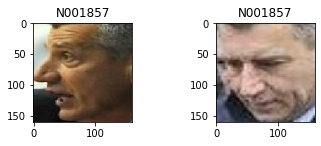

In [32]:
import matplotlib.pyplot as plt


img_paths = all_train_image_pair_paths[0]
label_indexs = all_train_image_pair_labels[0]
image1, image2 = preprocess_image(img_paths[0]), preprocess_image(img_paths[1])
plt.subplot(2,2,1)
plt.imshow(image1)
plt.title(label_names[label_index].title())


plt.subplot(2,2,2)
plt.imshow(image2)

plt.grid(False)
plt.title(label_names[label_index].title())
print()

In [33]:
label_indexs

(20, 114)

In [66]:
input_shape = m.input_shape[1:]

In [67]:
input_shape

(160, 160, 3)

In [111]:
for layer in m.layers[:-6]:
    layer.trainable = False

In [112]:
def squared_differences(pair_of_tensors):
    x, y = pair_of_tensors
    return k.square(x - y)

In [113]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input, Lambda, add, Dropout, BatchNormalization

inputs1 = Input(input_shape)
inputs2 = Input(input_shape)
x1 = m(inputs1)
x2 = m(inputs2)
x1 = Model(inputs = inputs1, outputs = x1)
x2 = Model(inputs = inputs2, outputs = x2)


x = Lambda(squared_differences)([x1.output, x2.output])
X = Dense(16, activation = tf.nn.relu)(x)
X = Dropout(rate=0.5)(X)
X = BatchNormalization()(X)
 #x= Dropout(0.5)(X)
output = Dense(1, activation = 'sigmoid')(x)

In [114]:
model = Model(inputs =[x1.input,x2.input], outputs=output)
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.001), 
    loss = 'binary_crossentropy', 
    metrics = ["accuracy"],
)


In [115]:
all_train_image_pair_paths_a, all_train_image_pair_paths_b = list(zip(*all_train_image_pair_paths))
all_train_image_pair_paths_a = list(all_train_image_pair_paths_a)
all_train_image_pair_paths_b = list(all_train_image_pair_paths_b)

In [116]:
path_ds_a = tf.data.Dataset.from_tensor_slices(all_train_image_pair_paths_a)
path_ds_b = tf.data.Dataset.from_tensor_slices(all_train_image_pair_paths_b)

type(path_ds_a)

tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter

In [117]:
train_image_datasource_a = path_ds_a.map(preprocess_image, num_parallel_calls=AUTOTUNE)
train_image_datasource_b = path_ds_b.map(preprocess_image, num_parallel_calls=AUTOTUNE)
train_image_datasource = tf.data.Dataset.zip((train_image_datasource_a, train_image_datasource_b))

In [118]:
train_label_datasource = tf.data.Dataset.from_tensor_slices(tf.cast(all_train_data_labels, tf.int64))

In [119]:
train_datasource = tf.data.Dataset.zip((train_image_datasource, train_label_datasource))

In [120]:
all_test_image_pair_paths_a, all_test_image_pair_paths_b = list(zip(*all_test_image_pair_paths))
all_test_image_pair_paths_a = list(all_test_image_pair_paths_a)
all_test_image_pair_paths_b = list(all_test_image_pair_paths_b)

In [121]:
test_path_ds_a = tf.data.Dataset.from_tensor_slices(all_test_image_pair_paths_a)
test_path_ds_b = tf.data.Dataset.from_tensor_slices(all_test_image_pair_paths_b)

type(test_path_ds_a)

tensorflow.python.data.ops.dataset_ops.DatasetV1Adapter

In [122]:
test_image_datasource_a = test_path_ds_a.map(preprocess_image, num_parallel_calls=AUTOTUNE)
test_image_datasource_b = test_path_ds_b.map(preprocess_image, num_parallel_calls=AUTOTUNE)
test_image_datasource = tf.data.Dataset.zip((test_image_datasource_a, test_image_datasource_b))

In [123]:
test_label_datasource = tf.data.Dataset.from_tensor_slices(tf.cast(all_test_data_labels, tf.int64))

In [124]:
test_datasource = tf.data.Dataset.zip((test_image_datasource, test_label_datasource))

In [125]:
# train_datasource = train_datasource.shuffle(buffer_size=1000)

In [126]:
train_datasource = train_datasource.repeat()

In [127]:
train_datasource = train_datasource.batch(BATCH_SIZE)

In [128]:
train_datasource = train_datasource.prefetch(buffer_size=AUTOTUNE)

In [129]:
# test_datasource = test_datasource.shuffle(buffer_size=1000)

In [130]:
test_datasource = test_datasource.repeat()

In [131]:
test_datasource = test_datasource.batch(BATCH_SIZE)

In [132]:
test_datasource = test_datasource.prefetch(buffer_size=AUTOTUNE)

In [ ]:

callbacks = [
  # Interrupt training if `val_loss` stops improving for over 2 epochs
  #tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss'),
  # Write TensorBoard logs to `./logs` directory
  tf.keras.callbacks.TensorBoard(log_dir='./logs')
]
model.fit(train_datasource, epochs=100, callbacks = callbacks, steps_per_epoch=int(len(all_train_image_pair_paths)/BATCH_SIZE),
          validation_data=test_datasource, 
          validation_steps=int(len(all_test_image_pair_paths)/BATCH_SIZE))

Epoch 1/100


 203/1454 [===>..........................] - ETA: 9:01:41 - loss: 2.7479 - acc: 0.40 - ETA: 4:32:45 - loss: 2.3265 - acc: 0.43 - ETA: 3:03:06 - loss: 2.0509 - acc: 0.48 - ETA: 2:18:22 - loss: 2.1272 - acc: 0.46 - ETA: 1:51:30 - loss: 2.1069 - acc: 0.48 - ETA: 1:33:34 - loss: 2.1140 - acc: 0.48 - ETA: 1:20:45 - loss: 2.1676 - acc: 0.48 - ETA: 1:11:08 - loss: 2.1305 - acc: 0.48 - ETA: 1:03:41 - loss: 2.2262 - acc: 0.48 - ETA: 57:44 - loss: 2.1479 - acc: 0.4969 - ETA: 52:48 - loss: 2.0673 - acc: 0.51 - ETA: 48:41 - loss: 2.0513 - acc: 0.51 - ETA: 45:12 - loss: 2.0255 - acc: 0.51 - ETA: 42:15 - loss: 1.9891 - acc: 0.52 - ETA: 39:41 - loss: 1.9829 - acc: 0.51 - ETA: 37:25 - loss: 1.9513 - acc: 0.50 - ETA: 35:26 - loss: 1.9373 - acc: 0.50 - ETA: 33:39 - loss: 1.9475 - acc: 0.49 - ETA: 32:04 - loss: 1.9416 - acc: 0.49 - ETA: 30:39 - loss: 1.9032 - acc: 0.49 - ETA: 29:21 - loss: 1.8815 - acc: 0.49 - ETA: 28:10 - loss: 1.8771 - acc: 0.49 - ETA: 27:05 - loss: 1.8722 - acc: 0.49 - ETA: 26:07 - lo

 611/1454 [===========>..................] - ETA: 3:51 - loss: 1.2339 - acc: 0.505 - ETA: 3:50 - loss: 1.2331 - acc: 0.505 - ETA: 3:50 - loss: 1.2321 - acc: 0.505 - ETA: 3:50 - loss: 1.2309 - acc: 0.505 - ETA: 3:49 - loss: 1.2302 - acc: 0.505 - ETA: 3:49 - loss: 1.2296 - acc: 0.505 - ETA: 3:49 - loss: 1.2288 - acc: 0.505 - ETA: 3:48 - loss: 1.2278 - acc: 0.505 - ETA: 3:48 - loss: 1.2269 - acc: 0.505 - ETA: 3:48 - loss: 1.2265 - acc: 0.505 - ETA: 3:47 - loss: 1.2255 - acc: 0.506 - ETA: 3:47 - loss: 1.2248 - acc: 0.505 - ETA: 3:47 - loss: 1.2247 - acc: 0.505 - ETA: 3:46 - loss: 1.2239 - acc: 0.505 - ETA: 3:46 - loss: 1.2228 - acc: 0.505 - ETA: 3:46 - loss: 1.2220 - acc: 0.505 - ETA: 3:45 - loss: 1.2213 - acc: 0.505 - ETA: 3:45 - loss: 1.2205 - acc: 0.505 - ETA: 3:44 - loss: 1.2201 - acc: 0.505 - ETA: 3:44 - loss: 1.2197 - acc: 0.505 - ETA: 3:44 - loss: 1.2189 - acc: 0.505 - ETA: 3:43 - loss: 1.2178 - acc: 0.505 - ETA: 3:43 - loss: 1.2172 - acc: 0.505 - ETA: 3:43 - loss: 1.2161 - acc: 0.5

 815/1454 [===============>..............] - ETA: 2:51 - loss: 1.0903 - acc: 0.507 - ETA: 2:50 - loss: 1.0897 - acc: 0.507 - ETA: 2:50 - loss: 1.0894 - acc: 0.507 - ETA: 2:50 - loss: 1.0889 - acc: 0.507 - ETA: 2:50 - loss: 1.0883 - acc: 0.507 - ETA: 2:49 - loss: 1.0877 - acc: 0.507 - ETA: 2:49 - loss: 1.0872 - acc: 0.507 - ETA: 2:49 - loss: 1.0865 - acc: 0.507 - ETA: 2:49 - loss: 1.0861 - acc: 0.507 - ETA: 2:48 - loss: 1.0856 - acc: 0.506 - ETA: 2:48 - loss: 1.0850 - acc: 0.507 - ETA: 2:48 - loss: 1.0845 - acc: 0.507 - ETA: 2:48 - loss: 1.0839 - acc: 0.507 - ETA: 2:47 - loss: 1.0832 - acc: 0.507 - ETA: 2:47 - loss: 1.0826 - acc: 0.507 - ETA: 2:47 - loss: 1.0820 - acc: 0.507 - ETA: 2:47 - loss: 1.0816 - acc: 0.507 - ETA: 2:46 - loss: 1.0812 - acc: 0.507 - ETA: 2:46 - loss: 1.0808 - acc: 0.507 - ETA: 2:46 - loss: 1.0802 - acc: 0.507 - ETA: 2:46 - loss: 1.0795 - acc: 0.507 - ETA: 2:45 - loss: 1.0790 - acc: 0.507 - ETA: 2:45 - loss: 1.0782 - acc: 0.507 - ETA: 2:45 - loss: 1.0776 - acc: 0.5

1019/1454 [====================>.........] - ETA: 2:04 - loss: 0.9990 - acc: 0.508 - ETA: 2:04 - loss: 0.9987 - acc: 0.508 - ETA: 2:04 - loss: 0.9984 - acc: 0.507 - ETA: 2:04 - loss: 0.9980 - acc: 0.508 - ETA: 2:03 - loss: 0.9977 - acc: 0.508 - ETA: 2:03 - loss: 0.9974 - acc: 0.507 - ETA: 2:03 - loss: 0.9970 - acc: 0.507 - ETA: 2:03 - loss: 0.9967 - acc: 0.508 - ETA: 2:03 - loss: 0.9963 - acc: 0.508 - ETA: 2:02 - loss: 0.9960 - acc: 0.508 - ETA: 2:02 - loss: 0.9956 - acc: 0.508 - ETA: 2:02 - loss: 0.9952 - acc: 0.508 - ETA: 2:02 - loss: 0.9949 - acc: 0.508 - ETA: 2:01 - loss: 0.9945 - acc: 0.508 - ETA: 2:01 - loss: 0.9941 - acc: 0.508 - ETA: 2:01 - loss: 0.9937 - acc: 0.508 - ETA: 2:01 - loss: 0.9934 - acc: 0.508 - ETA: 2:01 - loss: 0.9931 - acc: 0.508 - ETA: 2:00 - loss: 0.9928 - acc: 0.508 - ETA: 2:00 - loss: 0.9924 - acc: 0.508 - ETA: 2:00 - loss: 0.9920 - acc: 0.508 - ETA: 2:00 - loss: 0.9917 - acc: 0.508 - ETA: 1:59 - loss: 0.9914 - acc: 0.508 - ETA: 1:59 - loss: 0.9910 - acc: 0.5

1228/1454 [========================>.....] - ETA: 1:22 - loss: 0.9390 - acc: 0.513 - ETA: 1:22 - loss: 0.9387 - acc: 0.513 - ETA: 1:22 - loss: 0.9385 - acc: 0.513 - ETA: 1:22 - loss: 0.9383 - acc: 0.513 - ETA: 1:21 - loss: 0.9380 - acc: 0.513 - ETA: 1:21 - loss: 0.9378 - acc: 0.513 - ETA: 1:21 - loss: 0.9376 - acc: 0.513 - ETA: 1:21 - loss: 0.9373 - acc: 0.513 - ETA: 1:21 - loss: 0.9371 - acc: 0.513 - ETA: 1:20 - loss: 0.9368 - acc: 0.513 - ETA: 1:20 - loss: 0.9366 - acc: 0.513 - ETA: 1:20 - loss: 0.9363 - acc: 0.513 - ETA: 1:20 - loss: 0.9361 - acc: 0.513 - ETA: 1:20 - loss: 0.9358 - acc: 0.514 - ETA: 1:19 - loss: 0.9356 - acc: 0.514 - ETA: 1:19 - loss: 0.9353 - acc: 0.514 - ETA: 1:19 - loss: 0.9350 - acc: 0.514 - ETA: 1:19 - loss: 0.9347 - acc: 0.514 - ETA: 1:19 - loss: 0.9345 - acc: 0.514 - ETA: 1:18 - loss: 0.9343 - acc: 0.514 - ETA: 1:18 - loss: 0.9340 - acc: 0.514 - ETA: 1:18 - loss: 0.9339 - acc: 0.514 - ETA: 1:18 - loss: 0.9337 - acc: 0.514 - ETA: 1:18 - loss: 0.9335 - acc: 0.5

1443/1454 [============================>.] - ETA: 42s - loss: 0.8982 - acc: 0.51 - ETA: 41s - loss: 0.8981 - acc: 0.51 - ETA: 41s - loss: 0.8979 - acc: 0.51 - ETA: 41s - loss: 0.8977 - acc: 0.51 - ETA: 41s - loss: 0.8975 - acc: 0.51 - ETA: 41s - loss: 0.8974 - acc: 0.51 - ETA: 40s - loss: 0.8972 - acc: 0.51 - ETA: 40s - loss: 0.8971 - acc: 0.51 - ETA: 40s - loss: 0.8969 - acc: 0.51 - ETA: 40s - loss: 0.8968 - acc: 0.51 - ETA: 40s - loss: 0.8966 - acc: 0.51 - ETA: 39s - loss: 0.8964 - acc: 0.51 - ETA: 39s - loss: 0.8963 - acc: 0.51 - ETA: 39s - loss: 0.8961 - acc: 0.51 - ETA: 39s - loss: 0.8960 - acc: 0.51 - ETA: 39s - loss: 0.8958 - acc: 0.51 - ETA: 39s - loss: 0.8957 - acc: 0.51 - ETA: 38s - loss: 0.8955 - acc: 0.51 - ETA: 38s - loss: 0.8954 - acc: 0.51 - ETA: 38s - loss: 0.8952 - acc: 0.51 - ETA: 38s - loss: 0.8950 - acc: 0.51 - ETA: 38s - loss: 0.8949 - acc: 0.51 - ETA: 37s - loss: 0.8947 - acc: 0.51 - ETA: 37s - loss: 0.8945 - acc: 0.51 - ETA: 37s - loss: 0.8944 - acc: 0.51 - ETA: 

201/348 [================>.............].] - ETA: 1s - loss: 0.8681 - acc: 0.517 - ETA: 1s - loss: 0.8680 - acc: 0.517 - ETA: 1s - loss: 0.8679 - acc: 0.517 - ETA: 1s - loss: 0.8677 - acc: 0.517 - ETA: 1s - loss: 0.8676 - acc: 0.517 - ETA: 0s - loss: 0.8675 - acc: 0.517 - ETA: 0s - loss: 0.8674 - acc: 0.517 - ETA: 0s - loss: 0.8673 - acc: 0.517 - ETA: 0s - loss: 0.8672 - acc: 0.517 - ETA: 0s - loss: 0.8671 - acc: 0.5174 - ETA: 31:17 - loss: 0.7047 - acc: 0.40 - ETA: 16:02 - loss: 0.7116 - acc: 0.45 - ETA: 10:57 - loss: 0.7125 - acc: 0.43 - ETA: 8:25 - loss: 0.7090 - acc: 0.4766 - ETA: 6:53 - loss: 0.7101 - acc: 0.462 - ETA: 5:53 - loss: 0.7060 - acc: 0.474 - ETA: 5:09 - loss: 0.7048 - acc: 0.482 - ETA: 4:36 - loss: 0.7012 - acc: 0.472 - ETA: 4:11 - loss: 0.7039 - acc: 0.468 - ETA: 3:50 - loss: 0.7045 - acc: 0.456 - ETA: 3:33 - loss: 0.7054 - acc: 0.451 - ETA: 3:19 - loss: 0.7029 - acc: 0.468 - ETA: 3:07 - loss: 0.7029 - acc: 0.476 - ETA: 2:57 - loss: 0.7014 - acc: 0.482 - ETA: 2:48 - l

1454/1454 [==============================] - 331s 228ms/step - loss: 0.8670 - acc: 0.5175 - val_loss: 0.7014 - val_acc: 0.4727
Epoch 2/100


 204/1454 [===>..........................] - ETA: 4:03 - loss: 0.6918 - acc: 0.625 - ETA: 4:09 - loss: 0.6505 - acc: 0.671 - ETA: 4:12 - loss: 0.6604 - acc: 0.635 - ETA: 4:16 - loss: 0.6740 - acc: 0.593 - ETA: 4:16 - loss: 0.6885 - acc: 0.550 - ETA: 4:18 - loss: 0.6842 - acc: 0.546 - ETA: 4:18 - loss: 0.6884 - acc: 0.540 - ETA: 4:16 - loss: 0.6909 - acc: 0.523 - ETA: 4:16 - loss: 0.6919 - acc: 0.524 - ETA: 4:16 - loss: 0.6873 - acc: 0.540 - ETA: 4:16 - loss: 0.6894 - acc: 0.534 - ETA: 4:17 - loss: 0.6881 - acc: 0.539 - ETA: 4:17 - loss: 0.6868 - acc: 0.545 - ETA: 4:17 - loss: 0.6882 - acc: 0.546 - ETA: 4:18 - loss: 0.6866 - acc: 0.556 - ETA: 4:18 - loss: 0.6871 - acc: 0.554 - ETA: 4:18 - loss: 0.6860 - acc: 0.555 - ETA: 4:17 - loss: 0.6896 - acc: 0.543 - ETA: 4:17 - loss: 0.6920 - acc: 0.537 - ETA: 4:18 - loss: 0.6899 - acc: 0.542 - ETA: 4:18 - loss: 0.6896 - acc: 0.543 - ETA: 4:18 - loss: 0.6887 - acc: 0.542 - ETA: 4:18 - loss: 0.6926 - acc: 0.536 - ETA: 4:18 - loss: 0.6912 - acc: 0.5

 612/1454 [===========>..................] - ETA: 3:10 - loss: 0.6943 - acc: 0.531 - ETA: 3:10 - loss: 0.6944 - acc: 0.530 - ETA: 3:10 - loss: 0.6944 - acc: 0.530 - ETA: 3:09 - loss: 0.6944 - acc: 0.530 - ETA: 3:09 - loss: 0.6943 - acc: 0.530 - ETA: 3:09 - loss: 0.6944 - acc: 0.530 - ETA: 3:09 - loss: 0.6945 - acc: 0.530 - ETA: 3:09 - loss: 0.6945 - acc: 0.530 - ETA: 3:08 - loss: 0.6945 - acc: 0.530 - ETA: 3:08 - loss: 0.6945 - acc: 0.530 - ETA: 3:08 - loss: 0.6944 - acc: 0.530 - ETA: 3:08 - loss: 0.6945 - acc: 0.530 - ETA: 3:08 - loss: 0.6945 - acc: 0.530 - ETA: 3:08 - loss: 0.6944 - acc: 0.530 - ETA: 3:07 - loss: 0.6944 - acc: 0.530 - ETA: 3:07 - loss: 0.6946 - acc: 0.529 - ETA: 3:07 - loss: 0.6944 - acc: 0.530 - ETA: 3:07 - loss: 0.6944 - acc: 0.530 - ETA: 3:07 - loss: 0.6944 - acc: 0.530 - ETA: 3:06 - loss: 0.6944 - acc: 0.530 - ETA: 3:06 - loss: 0.6945 - acc: 0.530 - ETA: 3:06 - loss: 0.6946 - acc: 0.530 - ETA: 3:06 - loss: 0.6946 - acc: 0.530 - ETA: 3:06 - loss: 0.6945 - acc: 0.5

 816/1454 [===============>..............] - ETA: 2:34 - loss: 0.6952 - acc: 0.527 - ETA: 2:34 - loss: 0.6952 - acc: 0.526 - ETA: 2:34 - loss: 0.6953 - acc: 0.526 - ETA: 2:34 - loss: 0.6952 - acc: 0.526 - ETA: 2:34 - loss: 0.6952 - acc: 0.526 - ETA: 2:34 - loss: 0.6952 - acc: 0.526 - ETA: 2:33 - loss: 0.6951 - acc: 0.527 - ETA: 2:33 - loss: 0.6952 - acc: 0.527 - ETA: 2:33 - loss: 0.6951 - acc: 0.527 - ETA: 2:33 - loss: 0.6951 - acc: 0.527 - ETA: 2:33 - loss: 0.6951 - acc: 0.527 - ETA: 2:32 - loss: 0.6950 - acc: 0.527 - ETA: 2:32 - loss: 0.6950 - acc: 0.527 - ETA: 2:32 - loss: 0.6950 - acc: 0.527 - ETA: 2:32 - loss: 0.6950 - acc: 0.527 - ETA: 2:32 - loss: 0.6950 - acc: 0.527 - ETA: 2:31 - loss: 0.6949 - acc: 0.527 - ETA: 2:31 - loss: 0.6950 - acc: 0.527 - ETA: 2:31 - loss: 0.6949 - acc: 0.527 - ETA: 2:31 - loss: 0.6949 - acc: 0.527 - ETA: 2:31 - loss: 0.6949 - acc: 0.527 - ETA: 2:31 - loss: 0.6949 - acc: 0.527 - ETA: 2:30 - loss: 0.6948 - acc: 0.527 - ETA: 2:30 - loss: 0.6948 - acc: 0.5

1020/1454 [====================>.........] - ETA: 1:57 - loss: 0.6955 - acc: 0.526 - ETA: 1:57 - loss: 0.6956 - acc: 0.526 - ETA: 1:57 - loss: 0.6955 - acc: 0.526 - ETA: 1:57 - loss: 0.6955 - acc: 0.526 - ETA: 1:56 - loss: 0.6955 - acc: 0.526 - ETA: 1:56 - loss: 0.6956 - acc: 0.526 - ETA: 1:56 - loss: 0.6955 - acc: 0.526 - ETA: 1:56 - loss: 0.6956 - acc: 0.526 - ETA: 1:56 - loss: 0.6956 - acc: 0.526 - ETA: 1:55 - loss: 0.6956 - acc: 0.526 - ETA: 1:55 - loss: 0.6956 - acc: 0.526 - ETA: 1:55 - loss: 0.6956 - acc: 0.526 - ETA: 1:55 - loss: 0.6955 - acc: 0.526 - ETA: 1:55 - loss: 0.6956 - acc: 0.526 - ETA: 1:54 - loss: 0.6955 - acc: 0.526 - ETA: 1:54 - loss: 0.6955 - acc: 0.526 - ETA: 1:54 - loss: 0.6956 - acc: 0.526 - ETA: 1:54 - loss: 0.6955 - acc: 0.526 - ETA: 1:54 - loss: 0.6956 - acc: 0.526 - ETA: 1:54 - loss: 0.6956 - acc: 0.526 - ETA: 1:53 - loss: 0.6955 - acc: 0.526 - ETA: 1:53 - loss: 0.6954 - acc: 0.526 - ETA: 1:53 - loss: 0.6954 - acc: 0.526 - ETA: 1:53 - loss: 0.6954 - acc: 0.5

1229/1454 [========================>.....] - ETA: 1:19 - loss: 0.6957 - acc: 0.528 - ETA: 1:19 - loss: 0.6957 - acc: 0.528 - ETA: 1:19 - loss: 0.6957 - acc: 0.528 - ETA: 1:19 - loss: 0.6957 - acc: 0.528 - ETA: 1:19 - loss: 0.6957 - acc: 0.528 - ETA: 1:18 - loss: 0.6957 - acc: 0.528 - ETA: 1:18 - loss: 0.6957 - acc: 0.528 - ETA: 1:18 - loss: 0.6957 - acc: 0.528 - ETA: 1:18 - loss: 0.6956 - acc: 0.528 - ETA: 1:18 - loss: 0.6957 - acc: 0.528 - ETA: 1:17 - loss: 0.6956 - acc: 0.528 - ETA: 1:17 - loss: 0.6957 - acc: 0.528 - ETA: 1:17 - loss: 0.6956 - acc: 0.528 - ETA: 1:17 - loss: 0.6956 - acc: 0.528 - ETA: 1:17 - loss: 0.6956 - acc: 0.528 - ETA: 1:17 - loss: 0.6955 - acc: 0.528 - ETA: 1:16 - loss: 0.6955 - acc: 0.528 - ETA: 1:16 - loss: 0.6955 - acc: 0.528 - ETA: 1:16 - loss: 0.6955 - acc: 0.528 - ETA: 1:16 - loss: 0.6955 - acc: 0.528 - ETA: 1:16 - loss: 0.6956 - acc: 0.528 - ETA: 1:15 - loss: 0.6956 - acc: 0.528 - ETA: 1:15 - loss: 0.6956 - acc: 0.528 - ETA: 1:15 - loss: 0.6956 - acc: 0.5

1444/1454 [============================>.] - ETA: 41s - loss: 0.6959 - acc: 0.52 - ETA: 40s - loss: 0.6959 - acc: 0.52 - ETA: 40s - loss: 0.6960 - acc: 0.52 - ETA: 40s - loss: 0.6960 - acc: 0.52 - ETA: 40s - loss: 0.6959 - acc: 0.52 - ETA: 40s - loss: 0.6959 - acc: 0.52 - ETA: 40s - loss: 0.6959 - acc: 0.52 - ETA: 39s - loss: 0.6959 - acc: 0.52 - ETA: 39s - loss: 0.6959 - acc: 0.52 - ETA: 39s - loss: 0.6959 - acc: 0.52 - ETA: 39s - loss: 0.6959 - acc: 0.52 - ETA: 39s - loss: 0.6959 - acc: 0.52 - ETA: 38s - loss: 0.6959 - acc: 0.52 - ETA: 38s - loss: 0.6959 - acc: 0.52 - ETA: 38s - loss: 0.6959 - acc: 0.52 - ETA: 38s - loss: 0.6958 - acc: 0.52 - ETA: 38s - loss: 0.6958 - acc: 0.52 - ETA: 37s - loss: 0.6958 - acc: 0.52 - ETA: 37s - loss: 0.6958 - acc: 0.52 - ETA: 37s - loss: 0.6959 - acc: 0.52 - ETA: 37s - loss: 0.6959 - acc: 0.52 - ETA: 37s - loss: 0.6959 - acc: 0.52 - ETA: 37s - loss: 0.6959 - acc: 0.52 - ETA: 36s - loss: 0.6959 - acc: 0.52 - ETA: 36s - loss: 0.6959 - acc: 0.52 - ETA: 

206/348 [================>.............].] - ETA: 1s - loss: 0.6956 - acc: 0.528 - ETA: 1s - loss: 0.6956 - acc: 0.528 - ETA: 1s - loss: 0.6956 - acc: 0.528 - ETA: 1s - loss: 0.6956 - acc: 0.528 - ETA: 0s - loss: 0.6956 - acc: 0.528 - ETA: 0s - loss: 0.6956 - acc: 0.528 - ETA: 0s - loss: 0.6956 - acc: 0.528 - ETA: 0s - loss: 0.6956 - acc: 0.528 - ETA: 0s - loss: 0.6956 - acc: 0.5283 - ETA: 1:11 - loss: 0.6950 - acc: 0.531 - ETA: 1:03 - loss: 0.6903 - acc: 0.609 - ETA: 59s - loss: 0.6927 - acc: 0.625 - ETA: 57s - loss: 0.6898 - acc: 0.62 - ETA: 55s - loss: 0.6948 - acc: 0.58 - ETA: 55s - loss: 0.6982 - acc: 0.55 - ETA: 54s - loss: 0.6995 - acc: 0.54 - ETA: 53s - loss: 0.7019 - acc: 0.53 - ETA: 53s - loss: 0.7043 - acc: 0.52 - ETA: 52s - loss: 0.7057 - acc: 0.51 - ETA: 52s - loss: 0.7059 - acc: 0.51 - ETA: 52s - loss: 0.7060 - acc: 0.50 - ETA: 52s - loss: 0.7062 - acc: 0.50 - ETA: 52s - loss: 0.7044 - acc: 0.50 - ETA: 52s - loss: 0.7044 - acc: 0.50 - ETA: 51s - loss: 0.7037 - acc: 0.50 -

1454/1454 [==============================] - 325s 224ms/step - loss: 0.6956 - acc: 0.5283 - val_loss: 0.6990 - val_acc: 0.4915
Epoch 3/100


 204/1454 [===>..........................] - ETA: 4:16 - loss: 0.6899 - acc: 0.500 - ETA: 4:22 - loss: 0.6928 - acc: 0.515 - ETA: 4:23 - loss: 0.6882 - acc: 0.520 - ETA: 4:25 - loss: 0.6934 - acc: 0.507 - ETA: 4:25 - loss: 0.6972 - acc: 0.475 - ETA: 4:26 - loss: 0.6949 - acc: 0.505 - ETA: 4:26 - loss: 0.6944 - acc: 0.508 - ETA: 4:24 - loss: 0.6936 - acc: 0.515 - ETA: 4:24 - loss: 0.6911 - acc: 0.510 - ETA: 4:23 - loss: 0.6918 - acc: 0.521 - ETA: 4:22 - loss: 0.6904 - acc: 0.528 - ETA: 4:22 - loss: 0.6872 - acc: 0.541 - ETA: 4:22 - loss: 0.6858 - acc: 0.543 - ETA: 4:22 - loss: 0.6885 - acc: 0.544 - ETA: 4:22 - loss: 0.6910 - acc: 0.539 - ETA: 4:22 - loss: 0.6910 - acc: 0.535 - ETA: 4:22 - loss: 0.6898 - acc: 0.536 - ETA: 4:21 - loss: 0.6912 - acc: 0.536 - ETA: 4:21 - loss: 0.6939 - acc: 0.536 - ETA: 4:21 - loss: 0.6937 - acc: 0.535 - ETA: 4:21 - loss: 0.6932 - acc: 0.541 - ETA: 4:21 - loss: 0.6937 - acc: 0.541 - ETA: 4:20 - loss: 0.6955 - acc: 0.534 - ETA: 4:21 - loss: 0.6945 - acc: 0.5

 612/1454 [===========>..................] - ETA: 3:15 - loss: 0.6950 - acc: 0.529 - ETA: 3:15 - loss: 0.6949 - acc: 0.530 - ETA: 3:14 - loss: 0.6949 - acc: 0.530 - ETA: 3:14 - loss: 0.6951 - acc: 0.529 - ETA: 3:14 - loss: 0.6951 - acc: 0.529 - ETA: 3:14 - loss: 0.6950 - acc: 0.529 - ETA: 3:14 - loss: 0.6951 - acc: 0.529 - ETA: 3:14 - loss: 0.6951 - acc: 0.529 - ETA: 3:13 - loss: 0.6951 - acc: 0.528 - ETA: 3:13 - loss: 0.6951 - acc: 0.529 - ETA: 3:13 - loss: 0.6951 - acc: 0.529 - ETA: 3:13 - loss: 0.6952 - acc: 0.528 - ETA: 3:13 - loss: 0.6950 - acc: 0.529 - ETA: 3:12 - loss: 0.6951 - acc: 0.529 - ETA: 3:12 - loss: 0.6951 - acc: 0.529 - ETA: 3:12 - loss: 0.6952 - acc: 0.529 - ETA: 3:12 - loss: 0.6951 - acc: 0.529 - ETA: 3:12 - loss: 0.6951 - acc: 0.529 - ETA: 3:11 - loss: 0.6952 - acc: 0.529 - ETA: 3:11 - loss: 0.6951 - acc: 0.529 - ETA: 3:11 - loss: 0.6951 - acc: 0.529 - ETA: 3:11 - loss: 0.6952 - acc: 0.529 - ETA: 3:11 - loss: 0.6952 - acc: 0.529 - ETA: 3:10 - loss: 0.6952 - acc: 0.5

 816/1454 [===============>..............] - ETA: 2:36 - loss: 0.6966 - acc: 0.524 - ETA: 2:36 - loss: 0.6967 - acc: 0.524 - ETA: 2:36 - loss: 0.6967 - acc: 0.524 - ETA: 2:36 - loss: 0.6967 - acc: 0.525 - ETA: 2:36 - loss: 0.6966 - acc: 0.525 - ETA: 2:35 - loss: 0.6966 - acc: 0.525 - ETA: 2:35 - loss: 0.6965 - acc: 0.525 - ETA: 2:35 - loss: 0.6966 - acc: 0.525 - ETA: 2:35 - loss: 0.6967 - acc: 0.525 - ETA: 2:35 - loss: 0.6967 - acc: 0.525 - ETA: 2:34 - loss: 0.6967 - acc: 0.525 - ETA: 2:34 - loss: 0.6967 - acc: 0.524 - ETA: 2:34 - loss: 0.6967 - acc: 0.525 - ETA: 2:34 - loss: 0.6967 - acc: 0.525 - ETA: 2:34 - loss: 0.6967 - acc: 0.525 - ETA: 2:33 - loss: 0.6967 - acc: 0.525 - ETA: 2:33 - loss: 0.6967 - acc: 0.525 - ETA: 2:33 - loss: 0.6968 - acc: 0.525 - ETA: 2:33 - loss: 0.6967 - acc: 0.525 - ETA: 2:33 - loss: 0.6967 - acc: 0.525 - ETA: 2:32 - loss: 0.6967 - acc: 0.525 - ETA: 2:32 - loss: 0.6966 - acc: 0.525 - ETA: 2:32 - loss: 0.6966 - acc: 0.525 - ETA: 2:32 - loss: 0.6965 - acc: 0.5

1020/1454 [====================>.........] - ETA: 1:58 - loss: 0.6971 - acc: 0.525 - ETA: 1:58 - loss: 0.6972 - acc: 0.524 - ETA: 1:58 - loss: 0.6971 - acc: 0.524 - ETA: 1:58 - loss: 0.6971 - acc: 0.524 - ETA: 1:58 - loss: 0.6972 - acc: 0.524 - ETA: 1:57 - loss: 0.6972 - acc: 0.524 - ETA: 1:57 - loss: 0.6972 - acc: 0.524 - ETA: 1:57 - loss: 0.6972 - acc: 0.524 - ETA: 1:57 - loss: 0.6972 - acc: 0.524 - ETA: 1:57 - loss: 0.6972 - acc: 0.524 - ETA: 1:57 - loss: 0.6972 - acc: 0.524 - ETA: 1:56 - loss: 0.6972 - acc: 0.524 - ETA: 1:56 - loss: 0.6973 - acc: 0.524 - ETA: 1:56 - loss: 0.6973 - acc: 0.524 - ETA: 1:56 - loss: 0.6972 - acc: 0.524 - ETA: 1:56 - loss: 0.6973 - acc: 0.524 - ETA: 1:55 - loss: 0.6974 - acc: 0.524 - ETA: 1:55 - loss: 0.6974 - acc: 0.524 - ETA: 1:55 - loss: 0.6974 - acc: 0.524 - ETA: 1:55 - loss: 0.6974 - acc: 0.524 - ETA: 1:55 - loss: 0.6973 - acc: 0.524 - ETA: 1:54 - loss: 0.6973 - acc: 0.524 - ETA: 1:54 - loss: 0.6973 - acc: 0.525 - ETA: 1:54 - loss: 0.6973 - acc: 0.5

1229/1454 [========================>.....] - ETA: 1:21 - loss: 0.6974 - acc: 0.525 - ETA: 1:21 - loss: 0.6974 - acc: 0.525 - ETA: 1:21 - loss: 0.6974 - acc: 0.525 - ETA: 1:20 - loss: 0.6974 - acc: 0.525 - ETA: 1:20 - loss: 0.6974 - acc: 0.525 - ETA: 1:20 - loss: 0.6974 - acc: 0.525 - ETA: 1:20 - loss: 0.6974 - acc: 0.525 - ETA: 1:20 - loss: 0.6974 - acc: 0.525 - ETA: 1:19 - loss: 0.6974 - acc: 0.525 - ETA: 1:19 - loss: 0.6974 - acc: 0.525 - ETA: 1:19 - loss: 0.6974 - acc: 0.525 - ETA: 1:19 - loss: 0.6974 - acc: 0.525 - ETA: 1:19 - loss: 0.6973 - acc: 0.525 - ETA: 1:19 - loss: 0.6973 - acc: 0.525 - ETA: 1:18 - loss: 0.6973 - acc: 0.525 - ETA: 1:18 - loss: 0.6972 - acc: 0.525 - ETA: 1:18 - loss: 0.6972 - acc: 0.525 - ETA: 1:18 - loss: 0.6972 - acc: 0.525 - ETA: 1:18 - loss: 0.6973 - acc: 0.525 - ETA: 1:17 - loss: 0.6972 - acc: 0.525 - ETA: 1:17 - loss: 0.6973 - acc: 0.525 - ETA: 1:17 - loss: 0.6973 - acc: 0.525 - ETA: 1:17 - loss: 0.6973 - acc: 0.525 - ETA: 1:17 - loss: 0.6973 - acc: 0.5

1444/1454 [============================>.] - ETA: 42s - loss: 0.6974 - acc: 0.52 - ETA: 41s - loss: 0.6974 - acc: 0.52 - ETA: 41s - loss: 0.6974 - acc: 0.52 - ETA: 41s - loss: 0.6974 - acc: 0.52 - ETA: 41s - loss: 0.6974 - acc: 0.52 - ETA: 41s - loss: 0.6974 - acc: 0.52 - ETA: 41s - loss: 0.6974 - acc: 0.52 - ETA: 40s - loss: 0.6974 - acc: 0.52 - ETA: 40s - loss: 0.6974 - acc: 0.52 - ETA: 40s - loss: 0.6974 - acc: 0.52 - ETA: 40s - loss: 0.6973 - acc: 0.52 - ETA: 40s - loss: 0.6973 - acc: 0.52 - ETA: 39s - loss: 0.6973 - acc: 0.52 - ETA: 39s - loss: 0.6973 - acc: 0.52 - ETA: 39s - loss: 0.6973 - acc: 0.52 - ETA: 39s - loss: 0.6973 - acc: 0.52 - ETA: 39s - loss: 0.6973 - acc: 0.52 - ETA: 38s - loss: 0.6973 - acc: 0.52 - ETA: 38s - loss: 0.6973 - acc: 0.52 - ETA: 38s - loss: 0.6973 - acc: 0.52 - ETA: 38s - loss: 0.6973 - acc: 0.52 - ETA: 38s - loss: 0.6973 - acc: 0.52 - ETA: 38s - loss: 0.6973 - acc: 0.52 - ETA: 37s - loss: 0.6973 - acc: 0.52 - ETA: 37s - loss: 0.6973 - acc: 0.52 - ETA: 

205/348 [================>.............].] - ETA: 1s - loss: 0.6970 - acc: 0.526 - ETA: 1s - loss: 0.6971 - acc: 0.526 - ETA: 1s - loss: 0.6970 - acc: 0.526 - ETA: 1s - loss: 0.6970 - acc: 0.526 - ETA: 0s - loss: 0.6970 - acc: 0.526 - ETA: 0s - loss: 0.6971 - acc: 0.526 - ETA: 0s - loss: 0.6970 - acc: 0.526 - ETA: 0s - loss: 0.6970 - acc: 0.526 - ETA: 0s - loss: 0.6970 - acc: 0.5268 - ETA: 1:23 - loss: 0.6938 - acc: 0.593 - ETA: 1:10 - loss: 0.6926 - acc: 0.578 - ETA: 1:05 - loss: 0.6953 - acc: 0.583 - ETA: 1:03 - loss: 0.6925 - acc: 0.570 - ETA: 1:03 - loss: 0.6963 - acc: 0.556 - ETA: 1:02 - loss: 0.6993 - acc: 0.536 - ETA: 1:01 - loss: 0.7013 - acc: 0.522 - ETA: 1:00 - loss: 0.7025 - acc: 0.503 - ETA: 1:00 - loss: 0.7052 - acc: 0.500 - ETA: 59s - loss: 0.7069 - acc: 0.481 - ETA: 59s - loss: 0.7080 - acc: 0.47 - ETA: 59s - loss: 0.7076 - acc: 0.47 - ETA: 59s - loss: 0.7074 - acc: 0.47 - ETA: 58s - loss: 0.7055 - acc: 0.47 - ETA: 58s - loss: 0.7058 - acc: 0.47 - ETA: 57s - loss: 0.7053

1454/1454 [==============================] - 331s 228ms/step - loss: 0.6970 - acc: 0.5268 - val_loss: 0.7000 - val_acc: 0.4864
Epoch 4/100


 204/1454 [===>..........................] - ETA: 4:22 - loss: 0.6876 - acc: 0.531 - ETA: 4:19 - loss: 0.6562 - acc: 0.593 - ETA: 4:20 - loss: 0.6675 - acc: 0.593 - ETA: 4:23 - loss: 0.6820 - acc: 0.578 - ETA: 4:22 - loss: 0.6820 - acc: 0.562 - ETA: 4:24 - loss: 0.6837 - acc: 0.552 - ETA: 4:24 - loss: 0.6777 - acc: 0.558 - ETA: 4:24 - loss: 0.6819 - acc: 0.550 - ETA: 4:25 - loss: 0.6791 - acc: 0.562 - ETA: 4:29 - loss: 0.6830 - acc: 0.550 - ETA: 4:30 - loss: 0.6843 - acc: 0.545 - ETA: 4:31 - loss: 0.6817 - acc: 0.546 - ETA: 4:32 - loss: 0.6846 - acc: 0.538 - ETA: 4:32 - loss: 0.6887 - acc: 0.529 - ETA: 4:32 - loss: 0.6925 - acc: 0.529 - ETA: 4:32 - loss: 0.6942 - acc: 0.527 - ETA: 4:32 - loss: 0.6935 - acc: 0.527 - ETA: 4:31 - loss: 0.6974 - acc: 0.517 - ETA: 4:30 - loss: 0.6976 - acc: 0.518 - ETA: 4:30 - loss: 0.7004 - acc: 0.514 - ETA: 4:29 - loss: 0.6998 - acc: 0.519 - ETA: 4:29 - loss: 0.7044 - acc: 0.509 - ETA: 4:28 - loss: 0.7059 - acc: 0.506 - ETA: 4:28 - loss: 0.7030 - acc: 0.5

 612/1454 [===========>..................] - ETA: 3:12 - loss: 0.6947 - acc: 0.532 - ETA: 3:12 - loss: 0.6946 - acc: 0.532 - ETA: 3:12 - loss: 0.6947 - acc: 0.532 - ETA: 3:12 - loss: 0.6947 - acc: 0.532 - ETA: 3:12 - loss: 0.6947 - acc: 0.532 - ETA: 3:11 - loss: 0.6947 - acc: 0.532 - ETA: 3:11 - loss: 0.6947 - acc: 0.532 - ETA: 3:11 - loss: 0.6947 - acc: 0.532 - ETA: 3:11 - loss: 0.6946 - acc: 0.532 - ETA: 3:11 - loss: 0.6946 - acc: 0.532 - ETA: 3:10 - loss: 0.6946 - acc: 0.532 - ETA: 3:10 - loss: 0.6947 - acc: 0.532 - ETA: 3:10 - loss: 0.6946 - acc: 0.532 - ETA: 3:10 - loss: 0.6946 - acc: 0.532 - ETA: 3:10 - loss: 0.6947 - acc: 0.532 - ETA: 3:09 - loss: 0.6947 - acc: 0.532 - ETA: 3:09 - loss: 0.6946 - acc: 0.532 - ETA: 3:09 - loss: 0.6946 - acc: 0.532 - ETA: 3:09 - loss: 0.6947 - acc: 0.532 - ETA: 3:09 - loss: 0.6947 - acc: 0.532 - ETA: 3:08 - loss: 0.6948 - acc: 0.532 - ETA: 3:08 - loss: 0.6948 - acc: 0.532 - ETA: 3:08 - loss: 0.6948 - acc: 0.532 - ETA: 3:08 - loss: 0.6948 - acc: 0.5

 816/1454 [===============>..............] - ETA: 2:34 - loss: 0.6954 - acc: 0.527 - ETA: 2:34 - loss: 0.6955 - acc: 0.527 - ETA: 2:34 - loss: 0.6955 - acc: 0.527 - ETA: 2:34 - loss: 0.6955 - acc: 0.527 - ETA: 2:33 - loss: 0.6955 - acc: 0.527 - ETA: 2:33 - loss: 0.6954 - acc: 0.527 - ETA: 2:33 - loss: 0.6954 - acc: 0.526 - ETA: 2:33 - loss: 0.6954 - acc: 0.526 - ETA: 2:33 - loss: 0.6954 - acc: 0.526 - ETA: 2:32 - loss: 0.6955 - acc: 0.526 - ETA: 2:32 - loss: 0.6955 - acc: 0.526 - ETA: 2:32 - loss: 0.6955 - acc: 0.526 - ETA: 2:32 - loss: 0.6954 - acc: 0.526 - ETA: 2:32 - loss: 0.6954 - acc: 0.526 - ETA: 2:32 - loss: 0.6954 - acc: 0.527 - ETA: 2:31 - loss: 0.6954 - acc: 0.527 - ETA: 2:31 - loss: 0.6954 - acc: 0.527 - ETA: 2:31 - loss: 0.6955 - acc: 0.527 - ETA: 2:31 - loss: 0.6955 - acc: 0.526 - ETA: 2:31 - loss: 0.6956 - acc: 0.526 - ETA: 2:30 - loss: 0.6957 - acc: 0.526 - ETA: 2:30 - loss: 0.6956 - acc: 0.526 - ETA: 2:30 - loss: 0.6956 - acc: 0.526 - ETA: 2:30 - loss: 0.6956 - acc: 0.5

1020/1454 [====================>.........] - ETA: 1:57 - loss: 0.6963 - acc: 0.523 - ETA: 1:56 - loss: 0.6964 - acc: 0.523 - ETA: 1:56 - loss: 0.6964 - acc: 0.523 - ETA: 1:56 - loss: 0.6963 - acc: 0.523 - ETA: 1:56 - loss: 0.6963 - acc: 0.523 - ETA: 1:56 - loss: 0.6964 - acc: 0.523 - ETA: 1:55 - loss: 0.6963 - acc: 0.523 - ETA: 1:55 - loss: 0.6963 - acc: 0.523 - ETA: 1:55 - loss: 0.6963 - acc: 0.524 - ETA: 1:55 - loss: 0.6963 - acc: 0.524 - ETA: 1:55 - loss: 0.6963 - acc: 0.524 - ETA: 1:55 - loss: 0.6963 - acc: 0.523 - ETA: 1:54 - loss: 0.6964 - acc: 0.523 - ETA: 1:54 - loss: 0.6963 - acc: 0.523 - ETA: 1:54 - loss: 0.6963 - acc: 0.523 - ETA: 1:54 - loss: 0.6963 - acc: 0.523 - ETA: 1:54 - loss: 0.6964 - acc: 0.523 - ETA: 1:53 - loss: 0.6964 - acc: 0.523 - ETA: 1:53 - loss: 0.6964 - acc: 0.523 - ETA: 1:53 - loss: 0.6964 - acc: 0.523 - ETA: 1:53 - loss: 0.6964 - acc: 0.523 - ETA: 1:53 - loss: 0.6964 - acc: 0.523 - ETA: 1:53 - loss: 0.6964 - acc: 0.523 - ETA: 1:52 - loss: 0.6964 - acc: 0.5

1229/1454 [========================>.....] - ETA: 1:19 - loss: 0.6962 - acc: 0.527 - ETA: 1:19 - loss: 0.6962 - acc: 0.527 - ETA: 1:19 - loss: 0.6962 - acc: 0.527 - ETA: 1:19 - loss: 0.6962 - acc: 0.527 - ETA: 1:18 - loss: 0.6962 - acc: 0.527 - ETA: 1:18 - loss: 0.6962 - acc: 0.527 - ETA: 1:18 - loss: 0.6962 - acc: 0.527 - ETA: 1:18 - loss: 0.6963 - acc: 0.527 - ETA: 1:18 - loss: 0.6963 - acc: 0.527 - ETA: 1:17 - loss: 0.6962 - acc: 0.527 - ETA: 1:17 - loss: 0.6962 - acc: 0.527 - ETA: 1:17 - loss: 0.6962 - acc: 0.527 - ETA: 1:17 - loss: 0.6962 - acc: 0.527 - ETA: 1:17 - loss: 0.6962 - acc: 0.527 - ETA: 1:17 - loss: 0.6962 - acc: 0.527 - ETA: 1:16 - loss: 0.6961 - acc: 0.527 - ETA: 1:16 - loss: 0.6961 - acc: 0.527 - ETA: 1:16 - loss: 0.6961 - acc: 0.527 - ETA: 1:16 - loss: 0.6961 - acc: 0.527 - ETA: 1:16 - loss: 0.6961 - acc: 0.528 - ETA: 1:15 - loss: 0.6961 - acc: 0.527 - ETA: 1:15 - loss: 0.6962 - acc: 0.527 - ETA: 1:15 - loss: 0.6962 - acc: 0.527 - ETA: 1:15 - loss: 0.6962 - acc: 0.5

1444/1454 [============================>.] - ETA: 41s - loss: 0.6968 - acc: 0.52 - ETA: 41s - loss: 0.6967 - acc: 0.52 - ETA: 40s - loss: 0.6967 - acc: 0.52 - ETA: 40s - loss: 0.6967 - acc: 0.52 - ETA: 40s - loss: 0.6967 - acc: 0.52 - ETA: 40s - loss: 0.6967 - acc: 0.52 - ETA: 40s - loss: 0.6967 - acc: 0.52 - ETA: 39s - loss: 0.6967 - acc: 0.52 - ETA: 39s - loss: 0.6967 - acc: 0.52 - ETA: 39s - loss: 0.6967 - acc: 0.52 - ETA: 39s - loss: 0.6967 - acc: 0.52 - ETA: 39s - loss: 0.6967 - acc: 0.52 - ETA: 39s - loss: 0.6967 - acc: 0.52 - ETA: 38s - loss: 0.6967 - acc: 0.52 - ETA: 38s - loss: 0.6967 - acc: 0.52 - ETA: 38s - loss: 0.6967 - acc: 0.52 - ETA: 38s - loss: 0.6967 - acc: 0.52 - ETA: 38s - loss: 0.6967 - acc: 0.52 - ETA: 37s - loss: 0.6967 - acc: 0.52 - ETA: 37s - loss: 0.6967 - acc: 0.52 - ETA: 37s - loss: 0.6967 - acc: 0.52 - ETA: 37s - loss: 0.6967 - acc: 0.52 - ETA: 37s - loss: 0.6968 - acc: 0.52 - ETA: 37s - loss: 0.6967 - acc: 0.52 - ETA: 36s - loss: 0.6967 - acc: 0.52 - ETA: 

206/348 [================>.............].] - ETA: 1s - loss: 0.6969 - acc: 0.526 - ETA: 1s - loss: 0.6969 - acc: 0.526 - ETA: 1s - loss: 0.6968 - acc: 0.526 - ETA: 1s - loss: 0.6968 - acc: 0.526 - ETA: 0s - loss: 0.6968 - acc: 0.526 - ETA: 0s - loss: 0.6968 - acc: 0.526 - ETA: 0s - loss: 0.6968 - acc: 0.526 - ETA: 0s - loss: 0.6968 - acc: 0.526 - ETA: 0s - loss: 0.6968 - acc: 0.5263 - ETA: 1:12 - loss: 0.7091 - acc: 0.375 - ETA: 1:02 - loss: 0.7001 - acc: 0.453 - ETA: 59s - loss: 0.6965 - acc: 0.489 - ETA: 57s - loss: 0.6934 - acc: 0.49 - ETA: 56s - loss: 0.6959 - acc: 0.49 - ETA: 56s - loss: 0.6975 - acc: 0.48 - ETA: 55s - loss: 0.6971 - acc: 0.49 - ETA: 55s - loss: 0.6980 - acc: 0.50 - ETA: 54s - loss: 0.7004 - acc: 0.48 - ETA: 54s - loss: 0.7019 - acc: 0.45 - ETA: 53s - loss: 0.7015 - acc: 0.45 - ETA: 53s - loss: 0.7011 - acc: 0.44 - ETA: 52s - loss: 0.6997 - acc: 0.44 - ETA: 52s - loss: 0.6988 - acc: 0.45 - ETA: 52s - loss: 0.6989 - acc: 0.45 - ETA: 52s - loss: 0.6992 - acc: 0.45 -

1454/1454 [==============================] - 325s 224ms/step - loss: 0.6968 - acc: 0.5262 - val_loss: 0.6979 - val_acc: 0.4763
Epoch 5/100


 204/1454 [===>..........................] - ETA: 4:10 - loss: 0.7166 - acc: 0.406 - ETA: 4:08 - loss: 0.7087 - acc: 0.484 - ETA: 4:11 - loss: 0.7058 - acc: 0.437 - ETA: 4:12 - loss: 0.7047 - acc: 0.500 - ETA: 4:12 - loss: 0.7091 - acc: 0.487 - ETA: 4:13 - loss: 0.7117 - acc: 0.468 - ETA: 4:14 - loss: 0.7046 - acc: 0.500 - ETA: 4:15 - loss: 0.7103 - acc: 0.488 - ETA: 4:16 - loss: 0.7096 - acc: 0.493 - ETA: 4:16 - loss: 0.7051 - acc: 0.500 - ETA: 4:16 - loss: 0.7012 - acc: 0.511 - ETA: 4:15 - loss: 0.6984 - acc: 0.520 - ETA: 4:14 - loss: 0.6990 - acc: 0.514 - ETA: 4:15 - loss: 0.6998 - acc: 0.515 - ETA: 4:16 - loss: 0.7006 - acc: 0.510 - ETA: 4:16 - loss: 0.7014 - acc: 0.511 - ETA: 4:16 - loss: 0.6990 - acc: 0.512 - ETA: 4:16 - loss: 0.6998 - acc: 0.508 - ETA: 4:15 - loss: 0.7005 - acc: 0.501 - ETA: 4:17 - loss: 0.6999 - acc: 0.503 - ETA: 4:16 - loss: 0.6988 - acc: 0.506 - ETA: 4:16 - loss: 0.6985 - acc: 0.504 - ETA: 4:16 - loss: 0.7004 - acc: 0.500 - ETA: 4:16 - loss: 0.6982 - acc: 0.5

 612/1454 [===========>..................] - ETA: 3:09 - loss: 0.6939 - acc: 0.532 - ETA: 3:09 - loss: 0.6939 - acc: 0.532 - ETA: 3:09 - loss: 0.6939 - acc: 0.532 - ETA: 3:09 - loss: 0.6940 - acc: 0.532 - ETA: 3:09 - loss: 0.6940 - acc: 0.532 - ETA: 3:09 - loss: 0.6941 - acc: 0.532 - ETA: 3:08 - loss: 0.6942 - acc: 0.532 - ETA: 3:08 - loss: 0.6941 - acc: 0.532 - ETA: 3:08 - loss: 0.6942 - acc: 0.532 - ETA: 3:08 - loss: 0.6942 - acc: 0.532 - ETA: 3:08 - loss: 0.6941 - acc: 0.532 - ETA: 3:07 - loss: 0.6944 - acc: 0.531 - ETA: 3:07 - loss: 0.6943 - acc: 0.532 - ETA: 3:07 - loss: 0.6942 - acc: 0.532 - ETA: 3:07 - loss: 0.6943 - acc: 0.532 - ETA: 3:07 - loss: 0.6944 - acc: 0.532 - ETA: 3:07 - loss: 0.6943 - acc: 0.532 - ETA: 3:06 - loss: 0.6942 - acc: 0.532 - ETA: 3:06 - loss: 0.6941 - acc: 0.532 - ETA: 3:06 - loss: 0.6940 - acc: 0.532 - ETA: 3:06 - loss: 0.6939 - acc: 0.532 - ETA: 3:06 - loss: 0.6940 - acc: 0.532 - ETA: 3:06 - loss: 0.6940 - acc: 0.532 - ETA: 3:05 - loss: 0.6939 - acc: 0.5

 816/1454 [===============>..............] - ETA: 2:33 - loss: 0.6951 - acc: 0.529 - ETA: 2:32 - loss: 0.6952 - acc: 0.529 - ETA: 2:32 - loss: 0.6952 - acc: 0.529 - ETA: 2:32 - loss: 0.6952 - acc: 0.529 - ETA: 2:32 - loss: 0.6952 - acc: 0.529 - ETA: 2:32 - loss: 0.6952 - acc: 0.529 - ETA: 2:32 - loss: 0.6952 - acc: 0.529 - ETA: 2:31 - loss: 0.6952 - acc: 0.529 - ETA: 2:31 - loss: 0.6952 - acc: 0.529 - ETA: 2:31 - loss: 0.6952 - acc: 0.529 - ETA: 2:31 - loss: 0.6952 - acc: 0.529 - ETA: 2:31 - loss: 0.6952 - acc: 0.529 - ETA: 2:30 - loss: 0.6952 - acc: 0.529 - ETA: 2:30 - loss: 0.6952 - acc: 0.529 - ETA: 2:30 - loss: 0.6952 - acc: 0.529 - ETA: 2:30 - loss: 0.6953 - acc: 0.529 - ETA: 2:30 - loss: 0.6952 - acc: 0.529 - ETA: 2:29 - loss: 0.6953 - acc: 0.529 - ETA: 2:29 - loss: 0.6952 - acc: 0.529 - ETA: 2:29 - loss: 0.6953 - acc: 0.529 - ETA: 2:29 - loss: 0.6953 - acc: 0.529 - ETA: 2:29 - loss: 0.6951 - acc: 0.529 - ETA: 2:29 - loss: 0.6952 - acc: 0.529 - ETA: 2:28 - loss: 0.6952 - acc: 0.5

1020/1454 [====================>.........] - ETA: 1:56 - loss: 0.6959 - acc: 0.529 - ETA: 1:55 - loss: 0.6958 - acc: 0.528 - ETA: 1:55 - loss: 0.6959 - acc: 0.529 - ETA: 1:55 - loss: 0.6959 - acc: 0.528 - ETA: 1:55 - loss: 0.6960 - acc: 0.528 - ETA: 1:55 - loss: 0.6960 - acc: 0.528 - ETA: 1:55 - loss: 0.6960 - acc: 0.528 - ETA: 1:54 - loss: 0.6959 - acc: 0.528 - ETA: 1:54 - loss: 0.6959 - acc: 0.528 - ETA: 1:54 - loss: 0.6958 - acc: 0.529 - ETA: 1:54 - loss: 0.6958 - acc: 0.529 - ETA: 1:54 - loss: 0.6959 - acc: 0.529 - ETA: 1:53 - loss: 0.6959 - acc: 0.529 - ETA: 1:53 - loss: 0.6958 - acc: 0.529 - ETA: 1:53 - loss: 0.6957 - acc: 0.529 - ETA: 1:53 - loss: 0.6957 - acc: 0.529 - ETA: 1:53 - loss: 0.6958 - acc: 0.528 - ETA: 1:53 - loss: 0.6959 - acc: 0.528 - ETA: 1:52 - loss: 0.6959 - acc: 0.528 - ETA: 1:52 - loss: 0.6958 - acc: 0.528 - ETA: 1:52 - loss: 0.6958 - acc: 0.529 - ETA: 1:52 - loss: 0.6958 - acc: 0.529 - ETA: 1:52 - loss: 0.6958 - acc: 0.528 - ETA: 1:51 - loss: 0.6958 - acc: 0.5

1230/1454 [========================>.....] - ETA: 1:18 - loss: 0.6958 - acc: 0.530 - ETA: 1:18 - loss: 0.6957 - acc: 0.530 - ETA: 1:18 - loss: 0.6958 - acc: 0.530 - ETA: 1:17 - loss: 0.6957 - acc: 0.530 - ETA: 1:17 - loss: 0.6958 - acc: 0.530 - ETA: 1:17 - loss: 0.6958 - acc: 0.530 - ETA: 1:17 - loss: 0.6958 - acc: 0.530 - ETA: 1:17 - loss: 0.6958 - acc: 0.530 - ETA: 1:17 - loss: 0.6958 - acc: 0.530 - ETA: 1:16 - loss: 0.6957 - acc: 0.530 - ETA: 1:16 - loss: 0.6958 - acc: 0.530 - ETA: 1:16 - loss: 0.6958 - acc: 0.530 - ETA: 1:16 - loss: 0.6957 - acc: 0.530 - ETA: 1:16 - loss: 0.6957 - acc: 0.530 - ETA: 1:15 - loss: 0.6957 - acc: 0.530 - ETA: 1:15 - loss: 0.6957 - acc: 0.530 - ETA: 1:15 - loss: 0.6956 - acc: 0.530 - ETA: 1:15 - loss: 0.6956 - acc: 0.531 - ETA: 1:15 - loss: 0.6956 - acc: 0.530 - ETA: 1:14 - loss: 0.6956 - acc: 0.531 - ETA: 1:14 - loss: 0.6957 - acc: 0.530 - ETA: 1:14 - loss: 0.6958 - acc: 0.530 - ETA: 1:14 - loss: 0.6958 - acc: 0.530 - ETA: 1:14 - loss: 0.6958 - acc: 0.5

1445/1454 [============================>.] - ETA: 40s - loss: 0.6963 - acc: 0.52 - ETA: 40s - loss: 0.6963 - acc: 0.52 - ETA: 39s - loss: 0.6963 - acc: 0.52 - ETA: 39s - loss: 0.6963 - acc: 0.52 - ETA: 39s - loss: 0.6963 - acc: 0.52 - ETA: 39s - loss: 0.6963 - acc: 0.52 - ETA: 39s - loss: 0.6963 - acc: 0.52 - ETA: 39s - loss: 0.6963 - acc: 0.52 - ETA: 38s - loss: 0.6963 - acc: 0.52 - ETA: 38s - loss: 0.6962 - acc: 0.52 - ETA: 38s - loss: 0.6962 - acc: 0.52 - ETA: 38s - loss: 0.6962 - acc: 0.52 - ETA: 38s - loss: 0.6962 - acc: 0.52 - ETA: 37s - loss: 0.6962 - acc: 0.52 - ETA: 37s - loss: 0.6962 - acc: 0.52 - ETA: 37s - loss: 0.6962 - acc: 0.52 - ETA: 37s - loss: 0.6962 - acc: 0.52 - ETA: 37s - loss: 0.6962 - acc: 0.52 - ETA: 37s - loss: 0.6962 - acc: 0.52 - ETA: 36s - loss: 0.6962 - acc: 0.52 - ETA: 36s - loss: 0.6962 - acc: 0.52 - ETA: 36s - loss: 0.6962 - acc: 0.52 - ETA: 36s - loss: 0.6962 - acc: 0.52 - ETA: 36s - loss: 0.6962 - acc: 0.52 - ETA: 35s - loss: 0.6962 - acc: 0.52 - ETA: 

207/348 [================>.............].] - ETA: 1s - loss: 0.6958 - acc: 0.530 - ETA: 1s - loss: 0.6958 - acc: 0.530 - ETA: 1s - loss: 0.6958 - acc: 0.530 - ETA: 0s - loss: 0.6958 - acc: 0.530 - ETA: 0s - loss: 0.6958 - acc: 0.530 - ETA: 0s - loss: 0.6958 - acc: 0.530 - ETA: 0s - loss: 0.6957 - acc: 0.530 - ETA: 0s - loss: 0.6957 - acc: 0.5305 - ETA: 1:19 - loss: 0.7055 - acc: 0.468 - ETA: 1:07 - loss: 0.7076 - acc: 0.437 - ETA: 1:03 - loss: 0.7089 - acc: 0.437 - ETA: 1:02 - loss: 0.7051 - acc: 0.468 - ETA: 1:00 - loss: 0.7031 - acc: 0.468 - ETA: 59s - loss: 0.7027 - acc: 0.479 - ETA: 58s - loss: 0.7003 - acc: 0.48 - ETA: 57s - loss: 0.6997 - acc: 0.48 - ETA: 57s - loss: 0.7032 - acc: 0.47 - ETA: 57s - loss: 0.7053 - acc: 0.46 - ETA: 56s - loss: 0.7057 - acc: 0.45 - ETA: 56s - loss: 0.7031 - acc: 0.46 - ETA: 55s - loss: 0.7020 - acc: 0.47 - ETA: 55s - loss: 0.7017 - acc: 0.47 - ETA: 55s - loss: 0.7033 - acc: 0.46 - ETA: 54s - loss: 0.7038 - acc: 0.45 - ETA: 54s - loss: 0.7057 - acc: 

1454/1454 [==============================] - 322s 222ms/step - loss: 0.6957 - acc: 0.5305 - val_loss: 0.6992 - val_acc: 0.4871
Epoch 6/100


 204/1454 [===>..........................] - ETA: 4:16 - loss: 0.7126 - acc: 0.500 - ETA: 4:27 - loss: 0.6880 - acc: 0.546 - ETA: 4:30 - loss: 0.6869 - acc: 0.552 - ETA: 4:31 - loss: 0.6790 - acc: 0.585 - ETA: 4:30 - loss: 0.6855 - acc: 0.562 - ETA: 4:31 - loss: 0.6843 - acc: 0.552 - ETA: 4:35 - loss: 0.6866 - acc: 0.553 - ETA: 4:35 - loss: 0.6897 - acc: 0.550 - ETA: 4:35 - loss: 0.6830 - acc: 0.569 - ETA: 4:35 - loss: 0.6801 - acc: 0.571 - ETA: 4:35 - loss: 0.6858 - acc: 0.565 - ETA: 4:35 - loss: 0.6842 - acc: 0.570 - ETA: 4:35 - loss: 0.6878 - acc: 0.567 - ETA: 4:33 - loss: 0.6892 - acc: 0.567 - ETA: 4:33 - loss: 0.6891 - acc: 0.568 - ETA: 4:33 - loss: 0.6901 - acc: 0.568 - ETA: 4:34 - loss: 0.6893 - acc: 0.577 - ETA: 4:34 - loss: 0.6907 - acc: 0.574 - ETA: 4:34 - loss: 0.6914 - acc: 0.565 - ETA: 4:35 - loss: 0.6928 - acc: 0.564 - ETA: 4:35 - loss: 0.6924 - acc: 0.564 - ETA: 4:34 - loss: 0.6934 - acc: 0.558 - ETA: 4:34 - loss: 0.6958 - acc: 0.555 - ETA: 4:34 - loss: 0.6972 - acc: 0.5

 612/1454 [===========>..................] - ETA: 3:15 - loss: 0.6969 - acc: 0.525 - ETA: 3:15 - loss: 0.6968 - acc: 0.525 - ETA: 3:15 - loss: 0.6968 - acc: 0.525 - ETA: 3:15 - loss: 0.6968 - acc: 0.525 - ETA: 3:14 - loss: 0.6968 - acc: 0.526 - ETA: 3:14 - loss: 0.6967 - acc: 0.526 - ETA: 3:14 - loss: 0.6967 - acc: 0.526 - ETA: 3:14 - loss: 0.6967 - acc: 0.525 - ETA: 3:14 - loss: 0.6967 - acc: 0.525 - ETA: 3:13 - loss: 0.6967 - acc: 0.525 - ETA: 3:13 - loss: 0.6967 - acc: 0.525 - ETA: 3:13 - loss: 0.6969 - acc: 0.525 - ETA: 3:13 - loss: 0.6968 - acc: 0.525 - ETA: 3:13 - loss: 0.6968 - acc: 0.525 - ETA: 3:12 - loss: 0.6968 - acc: 0.525 - ETA: 3:12 - loss: 0.6968 - acc: 0.525 - ETA: 3:12 - loss: 0.6968 - acc: 0.525 - ETA: 3:12 - loss: 0.6967 - acc: 0.525 - ETA: 3:12 - loss: 0.6967 - acc: 0.525 - ETA: 3:11 - loss: 0.6967 - acc: 0.525 - ETA: 3:11 - loss: 0.6968 - acc: 0.525 - ETA: 3:11 - loss: 0.6968 - acc: 0.525 - ETA: 3:11 - loss: 0.6968 - acc: 0.525 - ETA: 3:11 - loss: 0.6968 - acc: 0.5

 816/1454 [===============>..............] - ETA: 2:36 - loss: 0.6970 - acc: 0.523 - ETA: 2:36 - loss: 0.6971 - acc: 0.523 - ETA: 2:36 - loss: 0.6971 - acc: 0.523 - ETA: 2:36 - loss: 0.6971 - acc: 0.523 - ETA: 2:36 - loss: 0.6971 - acc: 0.523 - ETA: 2:35 - loss: 0.6970 - acc: 0.523 - ETA: 2:35 - loss: 0.6970 - acc: 0.523 - ETA: 2:35 - loss: 0.6970 - acc: 0.523 - ETA: 2:35 - loss: 0.6970 - acc: 0.523 - ETA: 2:35 - loss: 0.6970 - acc: 0.523 - ETA: 2:34 - loss: 0.6970 - acc: 0.523 - ETA: 2:34 - loss: 0.6970 - acc: 0.523 - ETA: 2:34 - loss: 0.6970 - acc: 0.523 - ETA: 2:34 - loss: 0.6970 - acc: 0.523 - ETA: 2:34 - loss: 0.6970 - acc: 0.523 - ETA: 2:34 - loss: 0.6970 - acc: 0.523 - ETA: 2:33 - loss: 0.6970 - acc: 0.523 - ETA: 2:33 - loss: 0.6971 - acc: 0.523 - ETA: 2:33 - loss: 0.6971 - acc: 0.523 - ETA: 2:33 - loss: 0.6971 - acc: 0.523 - ETA: 2:33 - loss: 0.6970 - acc: 0.523 - ETA: 2:32 - loss: 0.6968 - acc: 0.524 - ETA: 2:32 - loss: 0.6968 - acc: 0.524 - ETA: 2:32 - loss: 0.6968 - acc: 0.5

1020/1454 [====================>.........] - ETA: 1:58 - loss: 0.6967 - acc: 0.525 - ETA: 1:58 - loss: 0.6967 - acc: 0.525 - ETA: 1:58 - loss: 0.6968 - acc: 0.524 - ETA: 1:58 - loss: 0.6968 - acc: 0.524 - ETA: 1:58 - loss: 0.6968 - acc: 0.525 - ETA: 1:57 - loss: 0.6967 - acc: 0.524 - ETA: 1:57 - loss: 0.6967 - acc: 0.525 - ETA: 1:57 - loss: 0.6967 - acc: 0.525 - ETA: 1:57 - loss: 0.6967 - acc: 0.525 - ETA: 1:57 - loss: 0.6967 - acc: 0.525 - ETA: 1:57 - loss: 0.6966 - acc: 0.525 - ETA: 1:56 - loss: 0.6966 - acc: 0.525 - ETA: 1:56 - loss: 0.6966 - acc: 0.525 - ETA: 1:56 - loss: 0.6966 - acc: 0.525 - ETA: 1:56 - loss: 0.6966 - acc: 0.525 - ETA: 1:56 - loss: 0.6966 - acc: 0.525 - ETA: 1:55 - loss: 0.6966 - acc: 0.525 - ETA: 1:55 - loss: 0.6965 - acc: 0.525 - ETA: 1:55 - loss: 0.6965 - acc: 0.525 - ETA: 1:55 - loss: 0.6965 - acc: 0.525 - ETA: 1:55 - loss: 0.6965 - acc: 0.525 - ETA: 1:54 - loss: 0.6965 - acc: 0.525 - ETA: 1:54 - loss: 0.6963 - acc: 0.525 - ETA: 1:54 - loss: 0.6964 - acc: 0.5

1229/1454 [========================>.....] - ETA: 1:20 - loss: 0.6964 - acc: 0.528 - ETA: 1:20 - loss: 0.6964 - acc: 0.528 - ETA: 1:20 - loss: 0.6964 - acc: 0.528 - ETA: 1:20 - loss: 0.6964 - acc: 0.528 - ETA: 1:19 - loss: 0.6964 - acc: 0.528 - ETA: 1:19 - loss: 0.6964 - acc: 0.528 - ETA: 1:19 - loss: 0.6964 - acc: 0.528 - ETA: 1:19 - loss: 0.6964 - acc: 0.528 - ETA: 1:19 - loss: 0.6964 - acc: 0.528 - ETA: 1:18 - loss: 0.6964 - acc: 0.528 - ETA: 1:18 - loss: 0.6964 - acc: 0.528 - ETA: 1:18 - loss: 0.6964 - acc: 0.528 - ETA: 1:18 - loss: 0.6964 - acc: 0.528 - ETA: 1:18 - loss: 0.6964 - acc: 0.528 - ETA: 1:17 - loss: 0.6964 - acc: 0.528 - ETA: 1:17 - loss: 0.6964 - acc: 0.528 - ETA: 1:17 - loss: 0.6963 - acc: 0.528 - ETA: 1:17 - loss: 0.6963 - acc: 0.528 - ETA: 1:17 - loss: 0.6964 - acc: 0.528 - ETA: 1:17 - loss: 0.6963 - acc: 0.528 - ETA: 1:16 - loss: 0.6963 - acc: 0.528 - ETA: 1:16 - loss: 0.6965 - acc: 0.528 - ETA: 1:16 - loss: 0.6965 - acc: 0.528 - ETA: 1:16 - loss: 0.6965 - acc: 0.5

1444/1454 [============================>.] - ETA: 41s - loss: 0.6965 - acc: 0.52 - ETA: 41s - loss: 0.6965 - acc: 0.52 - ETA: 41s - loss: 0.6964 - acc: 0.52 - ETA: 41s - loss: 0.6964 - acc: 0.52 - ETA: 40s - loss: 0.6964 - acc: 0.52 - ETA: 40s - loss: 0.6964 - acc: 0.52 - ETA: 40s - loss: 0.6964 - acc: 0.52 - ETA: 40s - loss: 0.6964 - acc: 0.52 - ETA: 40s - loss: 0.6964 - acc: 0.52 - ETA: 39s - loss: 0.6964 - acc: 0.52 - ETA: 39s - loss: 0.6963 - acc: 0.52 - ETA: 39s - loss: 0.6963 - acc: 0.52 - ETA: 39s - loss: 0.6963 - acc: 0.52 - ETA: 39s - loss: 0.6963 - acc: 0.52 - ETA: 39s - loss: 0.6964 - acc: 0.52 - ETA: 38s - loss: 0.6963 - acc: 0.52 - ETA: 38s - loss: 0.6963 - acc: 0.52 - ETA: 38s - loss: 0.6963 - acc: 0.52 - ETA: 38s - loss: 0.6963 - acc: 0.52 - ETA: 38s - loss: 0.6963 - acc: 0.52 - ETA: 37s - loss: 0.6963 - acc: 0.52 - ETA: 37s - loss: 0.6963 - acc: 0.52 - ETA: 37s - loss: 0.6963 - acc: 0.52 - ETA: 37s - loss: 0.6963 - acc: 0.52 - ETA: 37s - loss: 0.6963 - acc: 0.52 - ETA: 

206/348 [================>.............].] - ETA: 1s - loss: 0.6963 - acc: 0.529 - ETA: 1s - loss: 0.6964 - acc: 0.529 - ETA: 1s - loss: 0.6963 - acc: 0.529 - ETA: 1s - loss: 0.6963 - acc: 0.529 - ETA: 0s - loss: 0.6963 - acc: 0.529 - ETA: 0s - loss: 0.6964 - acc: 0.529 - ETA: 0s - loss: 0.6964 - acc: 0.529 - ETA: 0s - loss: 0.6964 - acc: 0.529 - ETA: 0s - loss: 0.6964 - acc: 0.5293 - ETA: 1:12 - loss: 0.6964 - acc: 0.531 - ETA: 1:02 - loss: 0.7004 - acc: 0.515 - ETA: 58s - loss: 0.7033 - acc: 0.510 - ETA: 56s - loss: 0.7010 - acc: 0.52 - ETA: 55s - loss: 0.7008 - acc: 0.51 - ETA: 55s - loss: 0.7013 - acc: 0.50 - ETA: 55s - loss: 0.7027 - acc: 0.47 - ETA: 54s - loss: 0.7039 - acc: 0.47 - ETA: 54s - loss: 0.7074 - acc: 0.45 - ETA: 53s - loss: 0.7092 - acc: 0.45 - ETA: 53s - loss: 0.7101 - acc: 0.44 - ETA: 53s - loss: 0.7085 - acc: 0.45 - ETA: 52s - loss: 0.7093 - acc: 0.45 - ETA: 52s - loss: 0.7083 - acc: 0.45 - ETA: 52s - loss: 0.7091 - acc: 0.45 - ETA: 51s - loss: 0.7085 - acc: 0.44 -

1454/1454 [==============================] - 330s 227ms/step - loss: 0.6963 - acc: 0.5294 - val_loss: 0.6992 - val_acc: 0.4826
Epoch 7/100


 204/1454 [===>..........................] - ETA: 4:28 - loss: 0.7131 - acc: 0.437 - ETA: 4:19 - loss: 0.6826 - acc: 0.546 - ETA: 4:27 - loss: 0.6744 - acc: 0.572 - ETA: 4:26 - loss: 0.6824 - acc: 0.554 - ETA: 4:28 - loss: 0.6727 - acc: 0.581 - ETA: 4:30 - loss: 0.6757 - acc: 0.578 - ETA: 4:29 - loss: 0.6741 - acc: 0.567 - ETA: 4:28 - loss: 0.6809 - acc: 0.550 - ETA: 4:28 - loss: 0.6805 - acc: 0.541 - ETA: 4:28 - loss: 0.6804 - acc: 0.546 - ETA: 4:28 - loss: 0.6797 - acc: 0.548 - ETA: 4:28 - loss: 0.6792 - acc: 0.549 - ETA: 4:26 - loss: 0.6795 - acc: 0.548 - ETA: 4:26 - loss: 0.6805 - acc: 0.542 - ETA: 4:27 - loss: 0.6796 - acc: 0.547 - ETA: 4:27 - loss: 0.6838 - acc: 0.539 - ETA: 4:27 - loss: 0.6863 - acc: 0.534 - ETA: 4:26 - loss: 0.6871 - acc: 0.534 - ETA: 4:26 - loss: 0.6887 - acc: 0.529 - ETA: 4:26 - loss: 0.6892 - acc: 0.528 - ETA: 4:26 - loss: 0.6894 - acc: 0.528 - ETA: 4:26 - loss: 0.6897 - acc: 0.524 - ETA: 4:25 - loss: 0.6891 - acc: 0.523 - ETA: 4:25 - loss: 0.6892 - acc: 0.5

 612/1454 [===========>..................] - ETA: 3:19 - loss: 0.6948 - acc: 0.529 - ETA: 3:19 - loss: 0.6947 - acc: 0.529 - ETA: 3:18 - loss: 0.6947 - acc: 0.529 - ETA: 3:18 - loss: 0.6946 - acc: 0.529 - ETA: 3:18 - loss: 0.6946 - acc: 0.529 - ETA: 3:18 - loss: 0.6946 - acc: 0.529 - ETA: 3:18 - loss: 0.6944 - acc: 0.530 - ETA: 3:17 - loss: 0.6946 - acc: 0.529 - ETA: 3:17 - loss: 0.6946 - acc: 0.529 - ETA: 3:17 - loss: 0.6945 - acc: 0.530 - ETA: 3:17 - loss: 0.6945 - acc: 0.530 - ETA: 3:17 - loss: 0.6945 - acc: 0.529 - ETA: 3:16 - loss: 0.6945 - acc: 0.529 - ETA: 3:16 - loss: 0.6945 - acc: 0.529 - ETA: 3:16 - loss: 0.6944 - acc: 0.529 - ETA: 3:16 - loss: 0.6945 - acc: 0.529 - ETA: 3:16 - loss: 0.6946 - acc: 0.529 - ETA: 3:15 - loss: 0.6944 - acc: 0.530 - ETA: 3:15 - loss: 0.6945 - acc: 0.529 - ETA: 3:15 - loss: 0.6945 - acc: 0.529 - ETA: 3:15 - loss: 0.6945 - acc: 0.529 - ETA: 3:15 - loss: 0.6946 - acc: 0.529 - ETA: 3:14 - loss: 0.6947 - acc: 0.529 - ETA: 3:14 - loss: 0.6946 - acc: 0.5

 816/1454 [===============>..............] - ETA: 2:40 - loss: 0.6955 - acc: 0.528 - ETA: 2:39 - loss: 0.6956 - acc: 0.528 - ETA: 2:39 - loss: 0.6956 - acc: 0.528 - ETA: 2:39 - loss: 0.6956 - acc: 0.528 - ETA: 2:39 - loss: 0.6956 - acc: 0.528 - ETA: 2:39 - loss: 0.6956 - acc: 0.528 - ETA: 2:38 - loss: 0.6956 - acc: 0.528 - ETA: 2:38 - loss: 0.6956 - acc: 0.528 - ETA: 2:38 - loss: 0.6956 - acc: 0.528 - ETA: 2:38 - loss: 0.6957 - acc: 0.527 - ETA: 2:38 - loss: 0.6957 - acc: 0.527 - ETA: 2:38 - loss: 0.6957 - acc: 0.527 - ETA: 2:37 - loss: 0.6956 - acc: 0.527 - ETA: 2:37 - loss: 0.6956 - acc: 0.528 - ETA: 2:37 - loss: 0.6956 - acc: 0.527 - ETA: 2:37 - loss: 0.6957 - acc: 0.527 - ETA: 2:37 - loss: 0.6957 - acc: 0.527 - ETA: 2:36 - loss: 0.6956 - acc: 0.527 - ETA: 2:36 - loss: 0.6955 - acc: 0.527 - ETA: 2:36 - loss: 0.6956 - acc: 0.527 - ETA: 2:36 - loss: 0.6956 - acc: 0.527 - ETA: 2:36 - loss: 0.6956 - acc: 0.527 - ETA: 2:36 - loss: 0.6956 - acc: 0.527 - ETA: 2:35 - loss: 0.6956 - acc: 0.5

1020/1454 [====================>.........] - ETA: 2:00 - loss: 0.6961 - acc: 0.526 - ETA: 2:00 - loss: 0.6961 - acc: 0.526 - ETA: 2:00 - loss: 0.6961 - acc: 0.525 - ETA: 2:00 - loss: 0.6962 - acc: 0.525 - ETA: 2:00 - loss: 0.6963 - acc: 0.525 - ETA: 1:59 - loss: 0.6963 - acc: 0.525 - ETA: 1:59 - loss: 0.6963 - acc: 0.525 - ETA: 1:59 - loss: 0.6964 - acc: 0.525 - ETA: 1:59 - loss: 0.6963 - acc: 0.525 - ETA: 1:59 - loss: 0.6963 - acc: 0.525 - ETA: 1:58 - loss: 0.6963 - acc: 0.525 - ETA: 1:58 - loss: 0.6963 - acc: 0.525 - ETA: 1:58 - loss: 0.6964 - acc: 0.525 - ETA: 1:58 - loss: 0.6964 - acc: 0.524 - ETA: 1:58 - loss: 0.6964 - acc: 0.524 - ETA: 1:58 - loss: 0.6964 - acc: 0.524 - ETA: 1:57 - loss: 0.6964 - acc: 0.524 - ETA: 1:57 - loss: 0.6964 - acc: 0.525 - ETA: 1:57 - loss: 0.6963 - acc: 0.525 - ETA: 1:57 - loss: 0.6963 - acc: 0.525 - ETA: 1:57 - loss: 0.6963 - acc: 0.524 - ETA: 1:56 - loss: 0.6963 - acc: 0.524 - ETA: 1:56 - loss: 0.6963 - acc: 0.524 - ETA: 1:56 - loss: 0.6963 - acc: 0.5

1229/1454 [========================>.....] - ETA: 1:22 - loss: 0.6958 - acc: 0.527 - ETA: 1:21 - loss: 0.6959 - acc: 0.527 - ETA: 1:21 - loss: 0.6959 - acc: 0.527 - ETA: 1:21 - loss: 0.6959 - acc: 0.527 - ETA: 1:21 - loss: 0.6959 - acc: 0.527 - ETA: 1:21 - loss: 0.6959 - acc: 0.527 - ETA: 1:21 - loss: 0.6959 - acc: 0.527 - ETA: 1:20 - loss: 0.6959 - acc: 0.527 - ETA: 1:20 - loss: 0.6959 - acc: 0.527 - ETA: 1:20 - loss: 0.6959 - acc: 0.527 - ETA: 1:20 - loss: 0.6959 - acc: 0.527 - ETA: 1:20 - loss: 0.6959 - acc: 0.527 - ETA: 1:19 - loss: 0.6959 - acc: 0.527 - ETA: 1:19 - loss: 0.6959 - acc: 0.527 - ETA: 1:19 - loss: 0.6959 - acc: 0.527 - ETA: 1:19 - loss: 0.6959 - acc: 0.527 - ETA: 1:19 - loss: 0.6958 - acc: 0.527 - ETA: 1:18 - loss: 0.6958 - acc: 0.527 - ETA: 1:18 - loss: 0.6959 - acc: 0.527 - ETA: 1:18 - loss: 0.6958 - acc: 0.527 - ETA: 1:18 - loss: 0.6959 - acc: 0.527 - ETA: 1:18 - loss: 0.6960 - acc: 0.527 - ETA: 1:18 - loss: 0.6960 - acc: 0.527 - ETA: 1:17 - loss: 0.6961 - acc: 0.5

1444/1454 [============================>.] - ETA: 42s - loss: 0.6963 - acc: 0.52 - ETA: 42s - loss: 0.6964 - acc: 0.52 - ETA: 42s - loss: 0.6964 - acc: 0.52 - ETA: 42s - loss: 0.6964 - acc: 0.52 - ETA: 41s - loss: 0.6964 - acc: 0.52 - ETA: 41s - loss: 0.6964 - acc: 0.52 - ETA: 41s - loss: 0.6964 - acc: 0.52 - ETA: 41s - loss: 0.6964 - acc: 0.52 - ETA: 41s - loss: 0.6964 - acc: 0.52 - ETA: 40s - loss: 0.6964 - acc: 0.52 - ETA: 40s - loss: 0.6964 - acc: 0.52 - ETA: 40s - loss: 0.6964 - acc: 0.52 - ETA: 40s - loss: 0.6964 - acc: 0.52 - ETA: 40s - loss: 0.6964 - acc: 0.52 - ETA: 39s - loss: 0.6964 - acc: 0.52 - ETA: 39s - loss: 0.6964 - acc: 0.52 - ETA: 39s - loss: 0.6964 - acc: 0.52 - ETA: 39s - loss: 0.6964 - acc: 0.52 - ETA: 39s - loss: 0.6964 - acc: 0.52 - ETA: 39s - loss: 0.6964 - acc: 0.52 - ETA: 38s - loss: 0.6964 - acc: 0.52 - ETA: 38s - loss: 0.6964 - acc: 0.52 - ETA: 38s - loss: 0.6964 - acc: 0.52 - ETA: 38s - loss: 0.6964 - acc: 0.52 - ETA: 38s - loss: 0.6964 - acc: 0.52 - ETA: 

206/348 [================>.............].] - ETA: 1s - loss: 0.6963 - acc: 0.526 - ETA: 1s - loss: 0.6963 - acc: 0.526 - ETA: 1s - loss: 0.6963 - acc: 0.526 - ETA: 1s - loss: 0.6962 - acc: 0.527 - ETA: 0s - loss: 0.6963 - acc: 0.526 - ETA: 0s - loss: 0.6963 - acc: 0.526 - ETA: 0s - loss: 0.6963 - acc: 0.526 - ETA: 0s - loss: 0.6963 - acc: 0.526 - ETA: 0s - loss: 0.6963 - acc: 0.5269 - ETA: 1:15 - loss: 0.6985 - acc: 0.562 - ETA: 1:05 - loss: 0.7015 - acc: 0.531 - ETA: 1:01 - loss: 0.7048 - acc: 0.531 - ETA: 59s - loss: 0.7009 - acc: 0.546 - ETA: 58s - loss: 0.7000 - acc: 0.53 - ETA: 57s - loss: 0.7019 - acc: 0.52 - ETA: 56s - loss: 0.7006 - acc: 0.50 - ETA: 56s - loss: 0.7012 - acc: 0.50 - ETA: 56s - loss: 0.7038 - acc: 0.49 - ETA: 55s - loss: 0.7049 - acc: 0.48 - ETA: 55s - loss: 0.7043 - acc: 0.47 - ETA: 55s - loss: 0.7030 - acc: 0.48 - ETA: 54s - loss: 0.7030 - acc: 0.48 - ETA: 54s - loss: 0.7020 - acc: 0.48 - ETA: 54s - loss: 0.7035 - acc: 0.47 - ETA: 53s - loss: 0.7034 - acc: 0.46

1454/1454 [==============================] - 335s 231ms/step - loss: 0.6963 - acc: 0.5269 - val_loss: 0.6972 - val_acc: 0.4858
Epoch 8/100


 204/1454 [===>..........................] - ETA: 4:43 - loss: 0.6955 - acc: 0.500 - ETA: 4:48 - loss: 0.6889 - acc: 0.515 - ETA: 4:43 - loss: 0.6899 - acc: 0.552 - ETA: 4:41 - loss: 0.6995 - acc: 0.562 - ETA: 4:38 - loss: 0.6993 - acc: 0.550 - ETA: 4:38 - loss: 0.6989 - acc: 0.552 - ETA: 4:37 - loss: 0.6958 - acc: 0.540 - ETA: 4:36 - loss: 0.6931 - acc: 0.570 - ETA: 4:36 - loss: 0.6910 - acc: 0.566 - ETA: 4:36 - loss: 0.6929 - acc: 0.559 - ETA: 4:36 - loss: 0.6908 - acc: 0.562 - ETA: 4:38 - loss: 0.6913 - acc: 0.562 - ETA: 4:37 - loss: 0.6925 - acc: 0.557 - ETA: 4:36 - loss: 0.6907 - acc: 0.564 - ETA: 4:36 - loss: 0.6880 - acc: 0.577 - ETA: 4:35 - loss: 0.6909 - acc: 0.570 - ETA: 4:35 - loss: 0.6905 - acc: 0.569 - ETA: 4:35 - loss: 0.6913 - acc: 0.571 - ETA: 4:35 - loss: 0.6939 - acc: 0.560 - ETA: 4:35 - loss: 0.6941 - acc: 0.556 - ETA: 4:34 - loss: 0.6947 - acc: 0.555 - ETA: 4:33 - loss: 0.6934 - acc: 0.554 - ETA: 4:33 - loss: 0.6957 - acc: 0.548 - ETA: 4:32 - loss: 0.6951 - acc: 0.5

 612/1454 [===========>..................] - ETA: 3:17 - loss: 0.6941 - acc: 0.536 - ETA: 3:16 - loss: 0.6940 - acc: 0.536 - ETA: 3:16 - loss: 0.6938 - acc: 0.537 - ETA: 3:16 - loss: 0.6938 - acc: 0.536 - ETA: 3:16 - loss: 0.6938 - acc: 0.536 - ETA: 3:16 - loss: 0.6938 - acc: 0.536 - ETA: 3:16 - loss: 0.6939 - acc: 0.536 - ETA: 3:15 - loss: 0.6939 - acc: 0.536 - ETA: 3:15 - loss: 0.6939 - acc: 0.536 - ETA: 3:15 - loss: 0.6938 - acc: 0.536 - ETA: 3:15 - loss: 0.6938 - acc: 0.537 - ETA: 3:15 - loss: 0.6940 - acc: 0.536 - ETA: 3:15 - loss: 0.6939 - acc: 0.536 - ETA: 3:14 - loss: 0.6940 - acc: 0.536 - ETA: 3:14 - loss: 0.6940 - acc: 0.536 - ETA: 3:14 - loss: 0.6940 - acc: 0.536 - ETA: 3:14 - loss: 0.6940 - acc: 0.536 - ETA: 3:14 - loss: 0.6940 - acc: 0.536 - ETA: 3:13 - loss: 0.6940 - acc: 0.536 - ETA: 3:13 - loss: 0.6939 - acc: 0.536 - ETA: 3:13 - loss: 0.6940 - acc: 0.536 - ETA: 3:13 - loss: 0.6941 - acc: 0.536 - ETA: 3:13 - loss: 0.6940 - acc: 0.536 - ETA: 3:12 - loss: 0.6940 - acc: 0.5

 816/1454 [===============>..............] - ETA: 2:38 - loss: 0.6950 - acc: 0.529 - ETA: 2:38 - loss: 0.6950 - acc: 0.529 - ETA: 2:38 - loss: 0.6950 - acc: 0.529 - ETA: 2:38 - loss: 0.6950 - acc: 0.529 - ETA: 2:37 - loss: 0.6950 - acc: 0.529 - ETA: 2:37 - loss: 0.6949 - acc: 0.530 - ETA: 2:37 - loss: 0.6949 - acc: 0.530 - ETA: 2:37 - loss: 0.6949 - acc: 0.530 - ETA: 2:37 - loss: 0.6948 - acc: 0.530 - ETA: 2:36 - loss: 0.6949 - acc: 0.530 - ETA: 2:36 - loss: 0.6950 - acc: 0.529 - ETA: 2:36 - loss: 0.6950 - acc: 0.530 - ETA: 2:36 - loss: 0.6949 - acc: 0.530 - ETA: 2:36 - loss: 0.6949 - acc: 0.530 - ETA: 2:36 - loss: 0.6949 - acc: 0.530 - ETA: 2:35 - loss: 0.6949 - acc: 0.530 - ETA: 2:35 - loss: 0.6950 - acc: 0.530 - ETA: 2:35 - loss: 0.6950 - acc: 0.530 - ETA: 2:35 - loss: 0.6949 - acc: 0.530 - ETA: 2:35 - loss: 0.6949 - acc: 0.530 - ETA: 2:34 - loss: 0.6949 - acc: 0.530 - ETA: 2:34 - loss: 0.6949 - acc: 0.530 - ETA: 2:34 - loss: 0.6949 - acc: 0.530 - ETA: 2:34 - loss: 0.6948 - acc: 0.5

1020/1454 [====================>.........] - ETA: 1:59 - loss: 0.6957 - acc: 0.529 - ETA: 1:59 - loss: 0.6957 - acc: 0.529 - ETA: 1:59 - loss: 0.6958 - acc: 0.529 - ETA: 1:59 - loss: 0.6957 - acc: 0.529 - ETA: 1:58 - loss: 0.6958 - acc: 0.529 - ETA: 1:58 - loss: 0.6958 - acc: 0.529 - ETA: 1:58 - loss: 0.6958 - acc: 0.529 - ETA: 1:58 - loss: 0.6958 - acc: 0.529 - ETA: 1:58 - loss: 0.6958 - acc: 0.529 - ETA: 1:57 - loss: 0.6958 - acc: 0.529 - ETA: 1:57 - loss: 0.6958 - acc: 0.529 - ETA: 1:57 - loss: 0.6959 - acc: 0.529 - ETA: 1:57 - loss: 0.6959 - acc: 0.529 - ETA: 1:57 - loss: 0.6959 - acc: 0.529 - ETA: 1:56 - loss: 0.6959 - acc: 0.529 - ETA: 1:56 - loss: 0.6959 - acc: 0.529 - ETA: 1:56 - loss: 0.6959 - acc: 0.529 - ETA: 1:56 - loss: 0.6959 - acc: 0.529 - ETA: 1:56 - loss: 0.6959 - acc: 0.529 - ETA: 1:56 - loss: 0.6958 - acc: 0.529 - ETA: 1:55 - loss: 0.6958 - acc: 0.529 - ETA: 1:55 - loss: 0.6958 - acc: 0.529 - ETA: 1:55 - loss: 0.6958 - acc: 0.529 - ETA: 1:55 - loss: 0.6958 - acc: 0.5

1229/1454 [========================>.....] - ETA: 1:21 - loss: 0.6952 - acc: 0.531 - ETA: 1:20 - loss: 0.6952 - acc: 0.531 - ETA: 1:20 - loss: 0.6953 - acc: 0.531 - ETA: 1:20 - loss: 0.6952 - acc: 0.531 - ETA: 1:20 - loss: 0.6952 - acc: 0.531 - ETA: 1:20 - loss: 0.6952 - acc: 0.531 - ETA: 1:19 - loss: 0.6952 - acc: 0.531 - ETA: 1:19 - loss: 0.6952 - acc: 0.531 - ETA: 1:19 - loss: 0.6952 - acc: 0.531 - ETA: 1:19 - loss: 0.6952 - acc: 0.531 - ETA: 1:19 - loss: 0.6952 - acc: 0.531 - ETA: 1:18 - loss: 0.6952 - acc: 0.531 - ETA: 1:18 - loss: 0.6952 - acc: 0.531 - ETA: 1:18 - loss: 0.6951 - acc: 0.531 - ETA: 1:18 - loss: 0.6951 - acc: 0.531 - ETA: 1:18 - loss: 0.6951 - acc: 0.531 - ETA: 1:18 - loss: 0.6950 - acc: 0.531 - ETA: 1:17 - loss: 0.6950 - acc: 0.531 - ETA: 1:17 - loss: 0.6951 - acc: 0.531 - ETA: 1:17 - loss: 0.6951 - acc: 0.531 - ETA: 1:17 - loss: 0.6951 - acc: 0.531 - ETA: 1:17 - loss: 0.6952 - acc: 0.531 - ETA: 1:16 - loss: 0.6952 - acc: 0.531 - ETA: 1:16 - loss: 0.6953 - acc: 0.5

1444/1454 [============================>.] - ETA: 41s - loss: 0.6957 - acc: 0.53 - ETA: 41s - loss: 0.6957 - acc: 0.53 - ETA: 41s - loss: 0.6957 - acc: 0.53 - ETA: 41s - loss: 0.6957 - acc: 0.53 - ETA: 41s - loss: 0.6957 - acc: 0.52 - ETA: 40s - loss: 0.6957 - acc: 0.53 - ETA: 40s - loss: 0.6957 - acc: 0.52 - ETA: 40s - loss: 0.6957 - acc: 0.53 - ETA: 40s - loss: 0.6957 - acc: 0.53 - ETA: 40s - loss: 0.6957 - acc: 0.53 - ETA: 39s - loss: 0.6957 - acc: 0.53 - ETA: 39s - loss: 0.6957 - acc: 0.53 - ETA: 39s - loss: 0.6956 - acc: 0.53 - ETA: 39s - loss: 0.6957 - acc: 0.53 - ETA: 39s - loss: 0.6957 - acc: 0.52 - ETA: 39s - loss: 0.6957 - acc: 0.52 - ETA: 38s - loss: 0.6957 - acc: 0.52 - ETA: 38s - loss: 0.6957 - acc: 0.52 - ETA: 38s - loss: 0.6957 - acc: 0.52 - ETA: 38s - loss: 0.6957 - acc: 0.52 - ETA: 38s - loss: 0.6957 - acc: 0.52 - ETA: 37s - loss: 0.6956 - acc: 0.52 - ETA: 37s - loss: 0.6957 - acc: 0.52 - ETA: 37s - loss: 0.6957 - acc: 0.52 - ETA: 37s - loss: 0.6957 - acc: 0.52 - ETA: 

206/348 [================>.............].] - ETA: 1s - loss: 0.6958 - acc: 0.529 - ETA: 1s - loss: 0.6958 - acc: 0.529 - ETA: 1s - loss: 0.6958 - acc: 0.529 - ETA: 1s - loss: 0.6957 - acc: 0.529 - ETA: 0s - loss: 0.6957 - acc: 0.529 - ETA: 0s - loss: 0.6958 - acc: 0.529 - ETA: 0s - loss: 0.6957 - acc: 0.530 - ETA: 0s - loss: 0.6957 - acc: 0.530 - ETA: 0s - loss: 0.6957 - acc: 0.5300 - ETA: 1:12 - loss: 0.7031 - acc: 0.437 - ETA: 1:03 - loss: 0.6993 - acc: 0.484 - ETA: 59s - loss: 0.7009 - acc: 0.489 - ETA: 57s - loss: 0.6974 - acc: 0.52 - ETA: 56s - loss: 0.6986 - acc: 0.51 - ETA: 55s - loss: 0.6998 - acc: 0.52 - ETA: 54s - loss: 0.6977 - acc: 0.52 - ETA: 54s - loss: 0.6992 - acc: 0.51 - ETA: 54s - loss: 0.7023 - acc: 0.50 - ETA: 54s - loss: 0.7045 - acc: 0.48 - ETA: 53s - loss: 0.7044 - acc: 0.46 - ETA: 53s - loss: 0.7031 - acc: 0.46 - ETA: 52s - loss: 0.7018 - acc: 0.46 - ETA: 52s - loss: 0.7008 - acc: 0.47 - ETA: 52s - loss: 0.7023 - acc: 0.46 - ETA: 52s - loss: 0.7025 - acc: 0.45 -

1454/1454 [==============================] - 337s 232ms/step - loss: 0.6957 - acc: 0.5301 - val_loss: 0.6987 - val_acc: 0.4781
Epoch 9/100


 204/1454 [===>..........................] - ETA: 4:26 - loss: 0.7071 - acc: 0.500 - ETA: 4:37 - loss: 0.7021 - acc: 0.515 - ETA: 4:36 - loss: 0.6948 - acc: 0.541 - ETA: 4:36 - loss: 0.7001 - acc: 0.507 - ETA: 4:36 - loss: 0.6892 - acc: 0.531 - ETA: 4:37 - loss: 0.6959 - acc: 0.520 - ETA: 4:36 - loss: 0.6903 - acc: 0.531 - ETA: 4:36 - loss: 0.6912 - acc: 0.535 - ETA: 4:37 - loss: 0.6902 - acc: 0.541 - ETA: 4:37 - loss: 0.6959 - acc: 0.534 - ETA: 4:38 - loss: 0.6941 - acc: 0.542 - ETA: 4:40 - loss: 0.6919 - acc: 0.549 - ETA: 4:41 - loss: 0.6927 - acc: 0.545 - ETA: 4:40 - loss: 0.6948 - acc: 0.540 - ETA: 4:39 - loss: 0.6979 - acc: 0.539 - ETA: 4:39 - loss: 0.6997 - acc: 0.539 - ETA: 4:39 - loss: 0.6985 - acc: 0.542 - ETA: 4:39 - loss: 0.7001 - acc: 0.538 - ETA: 4:40 - loss: 0.7021 - acc: 0.532 - ETA: 4:41 - loss: 0.7017 - acc: 0.535 - ETA: 4:41 - loss: 0.7004 - acc: 0.535 - ETA: 4:41 - loss: 0.7005 - acc: 0.535 - ETA: 4:40 - loss: 0.7032 - acc: 0.531 - ETA: 4:40 - loss: 0.7027 - acc: 0.5

 612/1454 [===========>..................] - ETA: 3:21 - loss: 0.6948 - acc: 0.528 - ETA: 3:21 - loss: 0.6947 - acc: 0.528 - ETA: 3:20 - loss: 0.6947 - acc: 0.528 - ETA: 3:20 - loss: 0.6947 - acc: 0.528 - ETA: 3:20 - loss: 0.6948 - acc: 0.528 - ETA: 3:20 - loss: 0.6948 - acc: 0.528 - ETA: 3:19 - loss: 0.6947 - acc: 0.528 - ETA: 3:19 - loss: 0.6947 - acc: 0.528 - ETA: 3:19 - loss: 0.6947 - acc: 0.528 - ETA: 3:19 - loss: 0.6946 - acc: 0.528 - ETA: 3:19 - loss: 0.6946 - acc: 0.528 - ETA: 3:18 - loss: 0.6948 - acc: 0.528 - ETA: 3:18 - loss: 0.6947 - acc: 0.528 - ETA: 3:18 - loss: 0.6947 - acc: 0.528 - ETA: 3:18 - loss: 0.6946 - acc: 0.528 - ETA: 3:18 - loss: 0.6946 - acc: 0.528 - ETA: 3:17 - loss: 0.6946 - acc: 0.528 - ETA: 3:17 - loss: 0.6945 - acc: 0.529 - ETA: 3:17 - loss: 0.6946 - acc: 0.529 - ETA: 3:17 - loss: 0.6946 - acc: 0.529 - ETA: 3:17 - loss: 0.6947 - acc: 0.528 - ETA: 3:16 - loss: 0.6948 - acc: 0.528 - ETA: 3:16 - loss: 0.6948 - acc: 0.528 - ETA: 3:16 - loss: 0.6948 - acc: 0.5

 816/1454 [===============>..............] - ETA: 2:39 - loss: 0.6958 - acc: 0.525 - ETA: 2:39 - loss: 0.6958 - acc: 0.525 - ETA: 2:39 - loss: 0.6958 - acc: 0.526 - ETA: 2:39 - loss: 0.6958 - acc: 0.525 - ETA: 2:38 - loss: 0.6958 - acc: 0.525 - ETA: 2:38 - loss: 0.6958 - acc: 0.525 - ETA: 2:38 - loss: 0.6958 - acc: 0.525 - ETA: 2:38 - loss: 0.6958 - acc: 0.525 - ETA: 2:38 - loss: 0.6958 - acc: 0.525 - ETA: 2:37 - loss: 0.6959 - acc: 0.525 - ETA: 2:37 - loss: 0.6958 - acc: 0.525 - ETA: 2:37 - loss: 0.6958 - acc: 0.525 - ETA: 2:37 - loss: 0.6958 - acc: 0.525 - ETA: 2:37 - loss: 0.6958 - acc: 0.525 - ETA: 2:36 - loss: 0.6957 - acc: 0.524 - ETA: 2:36 - loss: 0.6957 - acc: 0.525 - ETA: 2:36 - loss: 0.6958 - acc: 0.525 - ETA: 2:36 - loss: 0.6958 - acc: 0.524 - ETA: 2:36 - loss: 0.6957 - acc: 0.525 - ETA: 2:35 - loss: 0.6957 - acc: 0.525 - ETA: 2:35 - loss: 0.6957 - acc: 0.525 - ETA: 2:35 - loss: 0.6957 - acc: 0.525 - ETA: 2:35 - loss: 0.6957 - acc: 0.525 - ETA: 2:35 - loss: 0.6956 - acc: 0.5

1020/1454 [====================>.........] - ETA: 1:59 - loss: 0.6962 - acc: 0.524 - ETA: 1:59 - loss: 0.6962 - acc: 0.524 - ETA: 1:59 - loss: 0.6962 - acc: 0.523 - ETA: 1:59 - loss: 0.6962 - acc: 0.523 - ETA: 1:59 - loss: 0.6963 - acc: 0.523 - ETA: 1:59 - loss: 0.6963 - acc: 0.523 - ETA: 1:58 - loss: 0.6963 - acc: 0.523 - ETA: 1:58 - loss: 0.6964 - acc: 0.523 - ETA: 1:58 - loss: 0.6963 - acc: 0.523 - ETA: 1:58 - loss: 0.6963 - acc: 0.523 - ETA: 1:58 - loss: 0.6964 - acc: 0.523 - ETA: 1:57 - loss: 0.6963 - acc: 0.523 - ETA: 1:57 - loss: 0.6963 - acc: 0.523 - ETA: 1:57 - loss: 0.6963 - acc: 0.523 - ETA: 1:57 - loss: 0.6963 - acc: 0.523 - ETA: 1:57 - loss: 0.6963 - acc: 0.523 - ETA: 1:56 - loss: 0.6963 - acc: 0.523 - ETA: 1:56 - loss: 0.6963 - acc: 0.523 - ETA: 1:56 - loss: 0.6963 - acc: 0.523 - ETA: 1:56 - loss: 0.6963 - acc: 0.523 - ETA: 1:56 - loss: 0.6963 - acc: 0.523 - ETA: 1:55 - loss: 0.6963 - acc: 0.523 - ETA: 1:55 - loss: 0.6963 - acc: 0.523 - ETA: 1:55 - loss: 0.6963 - acc: 0.5

1229/1454 [========================>.....] - ETA: 1:21 - loss: 0.6958 - acc: 0.526 - ETA: 1:21 - loss: 0.6958 - acc: 0.526 - ETA: 1:21 - loss: 0.6958 - acc: 0.526 - ETA: 1:20 - loss: 0.6958 - acc: 0.526 - ETA: 1:20 - loss: 0.6958 - acc: 0.526 - ETA: 1:20 - loss: 0.6958 - acc: 0.526 - ETA: 1:20 - loss: 0.6958 - acc: 0.526 - ETA: 1:20 - loss: 0.6959 - acc: 0.526 - ETA: 1:20 - loss: 0.6958 - acc: 0.526 - ETA: 1:19 - loss: 0.6958 - acc: 0.526 - ETA: 1:19 - loss: 0.6958 - acc: 0.526 - ETA: 1:19 - loss: 0.6958 - acc: 0.526 - ETA: 1:19 - loss: 0.6958 - acc: 0.526 - ETA: 1:19 - loss: 0.6958 - acc: 0.526 - ETA: 1:18 - loss: 0.6958 - acc: 0.526 - ETA: 1:18 - loss: 0.6958 - acc: 0.526 - ETA: 1:18 - loss: 0.6958 - acc: 0.526 - ETA: 1:18 - loss: 0.6957 - acc: 0.526 - ETA: 1:18 - loss: 0.6958 - acc: 0.526 - ETA: 1:17 - loss: 0.6958 - acc: 0.526 - ETA: 1:17 - loss: 0.6958 - acc: 0.526 - ETA: 1:17 - loss: 0.6959 - acc: 0.526 - ETA: 1:17 - loss: 0.6959 - acc: 0.526 - ETA: 1:17 - loss: 0.6959 - acc: 0.5

1444/1454 [============================>.] - ETA: 42s - loss: 0.6960 - acc: 0.52 - ETA: 41s - loss: 0.6960 - acc: 0.52 - ETA: 41s - loss: 0.6960 - acc: 0.52 - ETA: 41s - loss: 0.6960 - acc: 0.52 - ETA: 41s - loss: 0.6960 - acc: 0.52 - ETA: 41s - loss: 0.6960 - acc: 0.52 - ETA: 40s - loss: 0.6960 - acc: 0.52 - ETA: 40s - loss: 0.6960 - acc: 0.52 - ETA: 40s - loss: 0.6960 - acc: 0.52 - ETA: 40s - loss: 0.6960 - acc: 0.52 - ETA: 40s - loss: 0.6960 - acc: 0.52 - ETA: 39s - loss: 0.6960 - acc: 0.52 - ETA: 39s - loss: 0.6960 - acc: 0.52 - ETA: 39s - loss: 0.6960 - acc: 0.52 - ETA: 39s - loss: 0.6960 - acc: 0.52 - ETA: 39s - loss: 0.6960 - acc: 0.52 - ETA: 39s - loss: 0.6960 - acc: 0.52 - ETA: 38s - loss: 0.6960 - acc: 0.52 - ETA: 38s - loss: 0.6960 - acc: 0.52 - ETA: 38s - loss: 0.6960 - acc: 0.52 - ETA: 38s - loss: 0.6960 - acc: 0.52 - ETA: 38s - loss: 0.6960 - acc: 0.52 - ETA: 37s - loss: 0.6960 - acc: 0.52 - ETA: 37s - loss: 0.6960 - acc: 0.52 - ETA: 37s - loss: 0.6960 - acc: 0.52 - ETA: 

206/348 [================>.............].] - ETA: 1s - loss: 0.6958 - acc: 0.527 - ETA: 1s - loss: 0.6958 - acc: 0.527 - ETA: 1s - loss: 0.6958 - acc: 0.527 - ETA: 1s - loss: 0.6957 - acc: 0.527 - ETA: 0s - loss: 0.6957 - acc: 0.527 - ETA: 0s - loss: 0.6957 - acc: 0.527 - ETA: 0s - loss: 0.6957 - acc: 0.527 - ETA: 0s - loss: 0.6958 - acc: 0.527 - ETA: 0s - loss: 0.6958 - acc: 0.5271 - ETA: 1:14 - loss: 0.7000 - acc: 0.468 - ETA: 1:03 - loss: 0.7005 - acc: 0.500 - ETA: 1:00 - loss: 0.7015 - acc: 0.500 - ETA: 58s - loss: 0.6985 - acc: 0.515 - ETA: 57s - loss: 0.7024 - acc: 0.50 - ETA: 56s - loss: 0.7015 - acc: 0.50 - ETA: 55s - loss: 0.6987 - acc: 0.51 - ETA: 55s - loss: 0.6997 - acc: 0.50 - ETA: 55s - loss: 0.7027 - acc: 0.49 - ETA: 54s - loss: 0.7049 - acc: 0.46 - ETA: 54s - loss: 0.7047 - acc: 0.45 - ETA: 54s - loss: 0.7026 - acc: 0.46 - ETA: 54s - loss: 0.7016 - acc: 0.47 - ETA: 53s - loss: 0.7016 - acc: 0.47 - ETA: 53s - loss: 0.7028 - acc: 0.46 - ETA: 53s - loss: 0.7035 - acc: 0.45

1454/1454 [==============================] - 332s 228ms/step - loss: 0.6958 - acc: 0.5271 - val_loss: 0.6981 - val_acc: 0.4825
Epoch 10/100


 204/1454 [===>..........................] - ETA: 4:33 - loss: 0.6734 - acc: 0.531 - ETA: 4:35 - loss: 0.6795 - acc: 0.484 - ETA: 4:34 - loss: 0.6760 - acc: 0.531 - ETA: 4:33 - loss: 0.6916 - acc: 0.492 - ETA: 4:35 - loss: 0.6949 - acc: 0.481 - ETA: 4:36 - loss: 0.7029 - acc: 0.474 - ETA: 4:35 - loss: 0.7031 - acc: 0.482 - ETA: 4:35 - loss: 0.7048 - acc: 0.480 - ETA: 4:34 - loss: 0.6983 - acc: 0.486 - ETA: 4:35 - loss: 0.7003 - acc: 0.496 - ETA: 4:34 - loss: 0.6969 - acc: 0.505 - ETA: 4:35 - loss: 0.6962 - acc: 0.518 - ETA: 4:34 - loss: 0.6947 - acc: 0.524 - ETA: 4:34 - loss: 0.6946 - acc: 0.522 - ETA: 4:34 - loss: 0.6959 - acc: 0.520 - ETA: 4:34 - loss: 0.7009 - acc: 0.513 - ETA: 4:34 - loss: 0.6985 - acc: 0.516 - ETA: 4:33 - loss: 0.6997 - acc: 0.517 - ETA: 4:34 - loss: 0.7007 - acc: 0.513 - ETA: 4:33 - loss: 0.7008 - acc: 0.518 - ETA: 4:33 - loss: 0.7000 - acc: 0.517 - ETA: 4:33 - loss: 0.7028 - acc: 0.511 - ETA: 4:33 - loss: 0.7065 - acc: 0.505 - ETA: 4:32 - loss: 0.7056 - acc: 0.5

 612/1454 [===========>..................] - ETA: 3:25 - loss: 0.6948 - acc: 0.530 - ETA: 3:25 - loss: 0.6948 - acc: 0.530 - ETA: 3:24 - loss: 0.6947 - acc: 0.530 - ETA: 3:24 - loss: 0.6947 - acc: 0.530 - ETA: 3:24 - loss: 0.6947 - acc: 0.530 - ETA: 3:24 - loss: 0.6948 - acc: 0.530 - ETA: 3:23 - loss: 0.6948 - acc: 0.530 - ETA: 3:23 - loss: 0.6946 - acc: 0.531 - ETA: 3:23 - loss: 0.6948 - acc: 0.531 - ETA: 3:23 - loss: 0.6947 - acc: 0.531 - ETA: 3:23 - loss: 0.6947 - acc: 0.531 - ETA: 3:22 - loss: 0.6949 - acc: 0.530 - ETA: 3:22 - loss: 0.6948 - acc: 0.530 - ETA: 3:22 - loss: 0.6948 - acc: 0.530 - ETA: 3:22 - loss: 0.6949 - acc: 0.530 - ETA: 3:22 - loss: 0.6951 - acc: 0.530 - ETA: 3:21 - loss: 0.6951 - acc: 0.530 - ETA: 3:21 - loss: 0.6950 - acc: 0.530 - ETA: 3:21 - loss: 0.6951 - acc: 0.530 - ETA: 3:21 - loss: 0.6949 - acc: 0.530 - ETA: 3:20 - loss: 0.6949 - acc: 0.530 - ETA: 3:20 - loss: 0.6950 - acc: 0.530 - ETA: 3:20 - loss: 0.6950 - acc: 0.530 - ETA: 3:20 - loss: 0.6950 - acc: 0.5

 816/1454 [===============>..............] - ETA: 2:44 - loss: 0.6947 - acc: 0.531 - ETA: 2:44 - loss: 0.6947 - acc: 0.531 - ETA: 2:43 - loss: 0.6948 - acc: 0.531 - ETA: 2:43 - loss: 0.6948 - acc: 0.531 - ETA: 2:43 - loss: 0.6947 - acc: 0.531 - ETA: 2:43 - loss: 0.6947 - acc: 0.531 - ETA: 2:43 - loss: 0.6946 - acc: 0.531 - ETA: 2:42 - loss: 0.6946 - acc: 0.531 - ETA: 2:42 - loss: 0.6946 - acc: 0.532 - ETA: 2:42 - loss: 0.6946 - acc: 0.531 - ETA: 2:42 - loss: 0.6946 - acc: 0.532 - ETA: 2:42 - loss: 0.6945 - acc: 0.532 - ETA: 2:41 - loss: 0.6945 - acc: 0.532 - ETA: 2:41 - loss: 0.6945 - acc: 0.532 - ETA: 2:41 - loss: 0.6945 - acc: 0.532 - ETA: 2:41 - loss: 0.6945 - acc: 0.532 - ETA: 2:41 - loss: 0.6946 - acc: 0.532 - ETA: 2:40 - loss: 0.6946 - acc: 0.532 - ETA: 2:40 - loss: 0.6945 - acc: 0.532 - ETA: 2:40 - loss: 0.6946 - acc: 0.532 - ETA: 2:40 - loss: 0.6945 - acc: 0.532 - ETA: 2:40 - loss: 0.6945 - acc: 0.532 - ETA: 2:39 - loss: 0.6944 - acc: 0.532 - ETA: 2:39 - loss: 0.6944 - acc: 0.5

1020/1454 [====================>.........] - ETA: 2:04 - loss: 0.6955 - acc: 0.531 - ETA: 2:04 - loss: 0.6956 - acc: 0.531 - ETA: 2:03 - loss: 0.6956 - acc: 0.531 - ETA: 2:03 - loss: 0.6955 - acc: 0.531 - ETA: 2:03 - loss: 0.6956 - acc: 0.531 - ETA: 2:03 - loss: 0.6955 - acc: 0.531 - ETA: 2:03 - loss: 0.6955 - acc: 0.531 - ETA: 2:02 - loss: 0.6955 - acc: 0.531 - ETA: 2:02 - loss: 0.6955 - acc: 0.531 - ETA: 2:02 - loss: 0.6955 - acc: 0.531 - ETA: 2:02 - loss: 0.6955 - acc: 0.531 - ETA: 2:02 - loss: 0.6956 - acc: 0.531 - ETA: 2:01 - loss: 0.6956 - acc: 0.530 - ETA: 2:01 - loss: 0.6956 - acc: 0.530 - ETA: 2:01 - loss: 0.6956 - acc: 0.530 - ETA: 2:01 - loss: 0.6955 - acc: 0.530 - ETA: 2:01 - loss: 0.6955 - acc: 0.531 - ETA: 2:01 - loss: 0.6955 - acc: 0.531 - ETA: 2:00 - loss: 0.6956 - acc: 0.531 - ETA: 2:00 - loss: 0.6955 - acc: 0.531 - ETA: 2:00 - loss: 0.6955 - acc: 0.531 - ETA: 2:00 - loss: 0.6954 - acc: 0.531 - ETA: 2:00 - loss: 0.6954 - acc: 0.531 - ETA: 1:59 - loss: 0.6954 - acc: 0.5

1228/1454 [========================>.....] - ETA: 1:24 - loss: 0.6956 - acc: 0.532 - ETA: 1:24 - loss: 0.6956 - acc: 0.532 - ETA: 1:24 - loss: 0.6956 - acc: 0.532 - ETA: 1:24 - loss: 0.6956 - acc: 0.532 - ETA: 1:24 - loss: 0.6956 - acc: 0.532 - ETA: 1:23 - loss: 0.6956 - acc: 0.532 - ETA: 1:23 - loss: 0.6956 - acc: 0.532 - ETA: 1:23 - loss: 0.6956 - acc: 0.532 - ETA: 1:23 - loss: 0.6956 - acc: 0.532 - ETA: 1:23 - loss: 0.6956 - acc: 0.532 - ETA: 1:22 - loss: 0.6956 - acc: 0.532 - ETA: 1:22 - loss: 0.6956 - acc: 0.532 - ETA: 1:22 - loss: 0.6956 - acc: 0.532 - ETA: 1:22 - loss: 0.6955 - acc: 0.532 - ETA: 1:22 - loss: 0.6956 - acc: 0.532 - ETA: 1:21 - loss: 0.6955 - acc: 0.532 - ETA: 1:21 - loss: 0.6955 - acc: 0.532 - ETA: 1:21 - loss: 0.6955 - acc: 0.532 - ETA: 1:21 - loss: 0.6955 - acc: 0.532 - ETA: 1:21 - loss: 0.6955 - acc: 0.532 - ETA: 1:20 - loss: 0.6955 - acc: 0.532 - ETA: 1:20 - loss: 0.6957 - acc: 0.532 - ETA: 1:20 - loss: 0.6956 - acc: 0.532 - ETA: 1:20 - loss: 0.6957 - acc: 0.5

1443/1454 [============================>.] - ETA: 43s - loss: 0.6962 - acc: 0.52 - ETA: 43s - loss: 0.6963 - acc: 0.52 - ETA: 43s - loss: 0.6963 - acc: 0.52 - ETA: 43s - loss: 0.6963 - acc: 0.52 - ETA: 43s - loss: 0.6963 - acc: 0.52 - ETA: 42s - loss: 0.6963 - acc: 0.52 - ETA: 42s - loss: 0.6963 - acc: 0.52 - ETA: 42s - loss: 0.6963 - acc: 0.52 - ETA: 42s - loss: 0.6963 - acc: 0.52 - ETA: 42s - loss: 0.6963 - acc: 0.52 - ETA: 41s - loss: 0.6963 - acc: 0.52 - ETA: 41s - loss: 0.6963 - acc: 0.52 - ETA: 41s - loss: 0.6963 - acc: 0.52 - ETA: 41s - loss: 0.6962 - acc: 0.52 - ETA: 41s - loss: 0.6963 - acc: 0.52 - ETA: 40s - loss: 0.6963 - acc: 0.52 - ETA: 40s - loss: 0.6962 - acc: 0.52 - ETA: 40s - loss: 0.6962 - acc: 0.52 - ETA: 40s - loss: 0.6962 - acc: 0.52 - ETA: 40s - loss: 0.6962 - acc: 0.52 - ETA: 39s - loss: 0.6962 - acc: 0.52 - ETA: 39s - loss: 0.6962 - acc: 0.52 - ETA: 39s - loss: 0.6962 - acc: 0.52 - ETA: 39s - loss: 0.6962 - acc: 0.52 - ETA: 39s - loss: 0.6961 - acc: 0.52 - ETA: 

205/348 [================>.............].] - ETA: 1s - loss: 0.6958 - acc: 0.530 - ETA: 1s - loss: 0.6957 - acc: 0.530 - ETA: 1s - loss: 0.6957 - acc: 0.530 - ETA: 1s - loss: 0.6957 - acc: 0.530 - ETA: 1s - loss: 0.6957 - acc: 0.530 - ETA: 0s - loss: 0.6957 - acc: 0.530 - ETA: 0s - loss: 0.6957 - acc: 0.530 - ETA: 0s - loss: 0.6957 - acc: 0.530 - ETA: 0s - loss: 0.6957 - acc: 0.530 - ETA: 0s - loss: 0.6957 - acc: 0.5299 - ETA: 1:16 - loss: 0.7086 - acc: 0.531 - ETA: 1:04 - loss: 0.7106 - acc: 0.500 - ETA: 1:00 - loss: 0.7057 - acc: 0.500 - ETA: 59s - loss: 0.7073 - acc: 0.492 - ETA: 58s - loss: 0.7132 - acc: 0.50 - ETA: 58s - loss: 0.7070 - acc: 0.51 - ETA: 57s - loss: 0.7017 - acc: 0.52 - ETA: 56s - loss: 0.6949 - acc: 0.54 - ETA: 55s - loss: 0.6962 - acc: 0.54 - ETA: 55s - loss: 0.6973 - acc: 0.53 - ETA: 56s - loss: 0.6980 - acc: 0.52 - ETA: 55s - loss: 0.6954 - acc: 0.53 - ETA: 55s - loss: 0.6922 - acc: 0.54 - ETA: 54s - loss: 0.6918 - acc: 0.54 - ETA: 54s - loss: 0.6932 - acc: 0.53

1454/1454 [==============================] - 342s 235ms/step - loss: 0.6957 - acc: 0.5299 - val_loss: 0.7063 - val_acc: 0.4944
Epoch 11/100


 204/1454 [===>..........................] - ETA: 4:25 - loss: 0.6620 - acc: 0.656 - ETA: 4:27 - loss: 0.6759 - acc: 0.593 - ETA: 4:27 - loss: 0.6762 - acc: 0.604 - ETA: 4:30 - loss: 0.6934 - acc: 0.585 - ETA: 4:31 - loss: 0.6907 - acc: 0.600 - ETA: 4:31 - loss: 0.6983 - acc: 0.588 - ETA: 4:30 - loss: 0.6939 - acc: 0.571 - ETA: 4:30 - loss: 0.6959 - acc: 0.550 - ETA: 4:30 - loss: 0.6943 - acc: 0.548 - ETA: 4:31 - loss: 0.6982 - acc: 0.534 - ETA: 4:30 - loss: 0.6968 - acc: 0.528 - ETA: 4:29 - loss: 0.6953 - acc: 0.528 - ETA: 4:29 - loss: 0.6947 - acc: 0.521 - ETA: 4:29 - loss: 0.6977 - acc: 0.508 - ETA: 4:29 - loss: 0.6991 - acc: 0.516 - ETA: 4:29 - loss: 0.7017 - acc: 0.509 - ETA: 4:28 - loss: 0.7014 - acc: 0.507 - ETA: 4:28 - loss: 0.7000 - acc: 0.508 - ETA: 4:29 - loss: 0.7002 - acc: 0.508 - ETA: 4:29 - loss: 0.7046 - acc: 0.501 - ETA: 4:29 - loss: 0.7024 - acc: 0.504 - ETA: 4:29 - loss: 0.7014 - acc: 0.504 - ETA: 4:29 - loss: 0.7020 - acc: 0.504 - ETA: 4:29 - loss: 0.7007 - acc: 0.5

 612/1454 [===========>..................] - ETA: 3:21 - loss: 0.6943 - acc: 0.532 - ETA: 3:20 - loss: 0.6943 - acc: 0.532 - ETA: 3:20 - loss: 0.6942 - acc: 0.532 - ETA: 3:20 - loss: 0.6942 - acc: 0.532 - ETA: 3:20 - loss: 0.6943 - acc: 0.532 - ETA: 3:20 - loss: 0.6942 - acc: 0.532 - ETA: 3:20 - loss: 0.6943 - acc: 0.532 - ETA: 3:19 - loss: 0.6942 - acc: 0.532 - ETA: 3:19 - loss: 0.6943 - acc: 0.532 - ETA: 3:19 - loss: 0.6943 - acc: 0.532 - ETA: 3:19 - loss: 0.6942 - acc: 0.532 - ETA: 3:18 - loss: 0.6944 - acc: 0.532 - ETA: 3:18 - loss: 0.6943 - acc: 0.532 - ETA: 3:18 - loss: 0.6943 - acc: 0.532 - ETA: 3:18 - loss: 0.6943 - acc: 0.532 - ETA: 3:18 - loss: 0.6945 - acc: 0.532 - ETA: 3:17 - loss: 0.6946 - acc: 0.532 - ETA: 3:17 - loss: 0.6944 - acc: 0.532 - ETA: 3:17 - loss: 0.6945 - acc: 0.532 - ETA: 3:17 - loss: 0.6944 - acc: 0.532 - ETA: 3:17 - loss: 0.6944 - acc: 0.532 - ETA: 3:16 - loss: 0.6945 - acc: 0.532 - ETA: 3:16 - loss: 0.6945 - acc: 0.532 - ETA: 3:16 - loss: 0.6945 - acc: 0.5

 816/1454 [===============>..............] - ETA: 2:41 - loss: 0.6957 - acc: 0.530 - ETA: 2:41 - loss: 0.6957 - acc: 0.530 - ETA: 2:41 - loss: 0.6958 - acc: 0.530 - ETA: 2:40 - loss: 0.6957 - acc: 0.530 - ETA: 2:40 - loss: 0.6957 - acc: 0.530 - ETA: 2:40 - loss: 0.6957 - acc: 0.530 - ETA: 2:40 - loss: 0.6956 - acc: 0.530 - ETA: 2:40 - loss: 0.6956 - acc: 0.530 - ETA: 2:39 - loss: 0.6956 - acc: 0.530 - ETA: 2:39 - loss: 0.6957 - acc: 0.530 - ETA: 2:39 - loss: 0.6956 - acc: 0.530 - ETA: 2:39 - loss: 0.6957 - acc: 0.530 - ETA: 2:39 - loss: 0.6957 - acc: 0.530 - ETA: 2:38 - loss: 0.6957 - acc: 0.530 - ETA: 2:38 - loss: 0.6957 - acc: 0.530 - ETA: 2:38 - loss: 0.6957 - acc: 0.530 - ETA: 2:38 - loss: 0.6956 - acc: 0.530 - ETA: 2:38 - loss: 0.6957 - acc: 0.530 - ETA: 2:37 - loss: 0.6956 - acc: 0.530 - ETA: 2:37 - loss: 0.6956 - acc: 0.530 - ETA: 2:37 - loss: 0.6955 - acc: 0.530 - ETA: 2:37 - loss: 0.6955 - acc: 0.530 - ETA: 2:37 - loss: 0.6955 - acc: 0.530 - ETA: 2:36 - loss: 0.6955 - acc: 0.5

1020/1454 [====================>.........] - ETA: 2:02 - loss: 0.6956 - acc: 0.529 - ETA: 2:02 - loss: 0.6956 - acc: 0.530 - ETA: 2:02 - loss: 0.6956 - acc: 0.530 - ETA: 2:02 - loss: 0.6957 - acc: 0.529 - ETA: 2:01 - loss: 0.6958 - acc: 0.529 - ETA: 2:01 - loss: 0.6957 - acc: 0.529 - ETA: 2:01 - loss: 0.6957 - acc: 0.529 - ETA: 2:01 - loss: 0.6957 - acc: 0.529 - ETA: 2:01 - loss: 0.6958 - acc: 0.529 - ETA: 2:00 - loss: 0.6957 - acc: 0.529 - ETA: 2:00 - loss: 0.6957 - acc: 0.529 - ETA: 2:00 - loss: 0.6957 - acc: 0.529 - ETA: 2:00 - loss: 0.6957 - acc: 0.529 - ETA: 2:00 - loss: 0.6958 - acc: 0.529 - ETA: 1:59 - loss: 0.6958 - acc: 0.529 - ETA: 1:59 - loss: 0.6957 - acc: 0.529 - ETA: 1:59 - loss: 0.6957 - acc: 0.529 - ETA: 1:59 - loss: 0.6957 - acc: 0.529 - ETA: 1:59 - loss: 0.6956 - acc: 0.529 - ETA: 1:58 - loss: 0.6956 - acc: 0.529 - ETA: 1:58 - loss: 0.6956 - acc: 0.530 - ETA: 1:58 - loss: 0.6956 - acc: 0.530 - ETA: 1:58 - loss: 0.6955 - acc: 0.530 - ETA: 1:58 - loss: 0.6955 - acc: 0.5

1229/1454 [========================>.....] - ETA: 1:23 - loss: 0.6954 - acc: 0.532 - ETA: 1:22 - loss: 0.6954 - acc: 0.532 - ETA: 1:22 - loss: 0.6955 - acc: 0.531 - ETA: 1:22 - loss: 0.6955 - acc: 0.531 - ETA: 1:22 - loss: 0.6955 - acc: 0.531 - ETA: 1:22 - loss: 0.6955 - acc: 0.531 - ETA: 1:21 - loss: 0.6955 - acc: 0.531 - ETA: 1:21 - loss: 0.6955 - acc: 0.531 - ETA: 1:21 - loss: 0.6955 - acc: 0.531 - ETA: 1:21 - loss: 0.6955 - acc: 0.531 - ETA: 1:21 - loss: 0.6955 - acc: 0.531 - ETA: 1:20 - loss: 0.6955 - acc: 0.531 - ETA: 1:20 - loss: 0.6955 - acc: 0.531 - ETA: 1:20 - loss: 0.6955 - acc: 0.531 - ETA: 1:20 - loss: 0.6954 - acc: 0.532 - ETA: 1:20 - loss: 0.6954 - acc: 0.532 - ETA: 1:19 - loss: 0.6954 - acc: 0.532 - ETA: 1:19 - loss: 0.6953 - acc: 0.532 - ETA: 1:19 - loss: 0.6953 - acc: 0.532 - ETA: 1:19 - loss: 0.6953 - acc: 0.532 - ETA: 1:19 - loss: 0.6953 - acc: 0.532 - ETA: 1:19 - loss: 0.6954 - acc: 0.532 - ETA: 1:18 - loss: 0.6953 - acc: 0.532 - ETA: 1:18 - loss: 0.6953 - acc: 0.5

1444/1454 [============================>.] - ETA: 42s - loss: 0.6956 - acc: 0.53 - ETA: 42s - loss: 0.6956 - acc: 0.53 - ETA: 42s - loss: 0.6956 - acc: 0.53 - ETA: 42s - loss: 0.6956 - acc: 0.53 - ETA: 42s - loss: 0.6956 - acc: 0.53 - ETA: 41s - loss: 0.6956 - acc: 0.53 - ETA: 41s - loss: 0.6956 - acc: 0.53 - ETA: 41s - loss: 0.6956 - acc: 0.53 - ETA: 41s - loss: 0.6956 - acc: 0.53 - ETA: 41s - loss: 0.6956 - acc: 0.53 - ETA: 40s - loss: 0.6956 - acc: 0.53 - ETA: 40s - loss: 0.6956 - acc: 0.53 - ETA: 40s - loss: 0.6955 - acc: 0.53 - ETA: 40s - loss: 0.6956 - acc: 0.53 - ETA: 40s - loss: 0.6955 - acc: 0.53 - ETA: 40s - loss: 0.6955 - acc: 0.53 - ETA: 39s - loss: 0.6955 - acc: 0.53 - ETA: 39s - loss: 0.6955 - acc: 0.53 - ETA: 39s - loss: 0.6955 - acc: 0.53 - ETA: 39s - loss: 0.6955 - acc: 0.53 - ETA: 39s - loss: 0.6955 - acc: 0.53 - ETA: 38s - loss: 0.6955 - acc: 0.53 - ETA: 38s - loss: 0.6955 - acc: 0.53 - ETA: 38s - loss: 0.6955 - acc: 0.53 - ETA: 38s - loss: 0.6955 - acc: 0.53 - ETA: 

206/348 [================>.............].] - ETA: 1s - loss: 0.6950 - acc: 0.532 - ETA: 1s - loss: 0.6950 - acc: 0.532 - ETA: 1s - loss: 0.6950 - acc: 0.532 - ETA: 1s - loss: 0.6950 - acc: 0.532 - ETA: 0s - loss: 0.6950 - acc: 0.532 - ETA: 0s - loss: 0.6950 - acc: 0.532 - ETA: 0s - loss: 0.6950 - acc: 0.532 - ETA: 0s - loss: 0.6950 - acc: 0.532 - ETA: 0s - loss: 0.6950 - acc: 0.5323 - ETA: 1:15 - loss: 0.6935 - acc: 0.468 - ETA: 1:10 - loss: 0.6959 - acc: 0.515 - ETA: 1:04 - loss: 0.6960 - acc: 0.531 - ETA: 1:02 - loss: 0.6956 - acc: 0.539 - ETA: 1:00 - loss: 0.6983 - acc: 0.506 - ETA: 59s - loss: 0.6996 - acc: 0.500 - ETA: 57s - loss: 0.6970 - acc: 0.50 - ETA: 56s - loss: 0.6949 - acc: 0.51 - ETA: 56s - loss: 0.6973 - acc: 0.50 - ETA: 55s - loss: 0.6987 - acc: 0.49 - ETA: 55s - loss: 0.6998 - acc: 0.48 - ETA: 54s - loss: 0.6986 - acc: 0.49 - ETA: 54s - loss: 0.6971 - acc: 0.50 - ETA: 54s - loss: 0.6956 - acc: 0.50 - ETA: 53s - loss: 0.6968 - acc: 0.49 - ETA: 53s - loss: 0.6983 - acc: 

1454/1454 [==============================] - 338s 233ms/step - loss: 0.6950 - acc: 0.5324 - val_loss: 0.6993 - val_acc: 0.4821
Epoch 12/100


 204/1454 [===>..........................] - ETA: 4:47 - loss: 0.7162 - acc: 0.500 - ETA: 4:46 - loss: 0.7154 - acc: 0.484 - ETA: 4:47 - loss: 0.7042 - acc: 0.500 - ETA: 4:47 - loss: 0.7100 - acc: 0.500 - ETA: 4:44 - loss: 0.6992 - acc: 0.506 - ETA: 4:40 - loss: 0.7014 - acc: 0.489 - ETA: 4:39 - loss: 0.7002 - acc: 0.495 - ETA: 4:37 - loss: 0.6981 - acc: 0.507 - ETA: 4:37 - loss: 0.6943 - acc: 0.520 - ETA: 4:36 - loss: 0.6971 - acc: 0.506 - ETA: 4:39 - loss: 0.6960 - acc: 0.508 - ETA: 4:41 - loss: 0.6935 - acc: 0.518 - ETA: 4:42 - loss: 0.6944 - acc: 0.512 - ETA: 4:41 - loss: 0.6950 - acc: 0.506 - ETA: 4:40 - loss: 0.6995 - acc: 0.497 - ETA: 4:39 - loss: 0.6994 - acc: 0.503 - ETA: 4:40 - loss: 0.6974 - acc: 0.507 - ETA: 4:39 - loss: 0.6973 - acc: 0.512 - ETA: 4:38 - loss: 0.6978 - acc: 0.508 - ETA: 4:38 - loss: 0.6999 - acc: 0.506 - ETA: 4:38 - loss: 0.6988 - acc: 0.503 - ETA: 4:38 - loss: 0.6972 - acc: 0.508 - ETA: 4:37 - loss: 0.6994 - acc: 0.508 - ETA: 4:37 - loss: 0.6991 - acc: 0.5

 612/1454 [===========>..................] - ETA: 3:20 - loss: 0.6963 - acc: 0.529 - ETA: 3:20 - loss: 0.6963 - acc: 0.529 - ETA: 3:20 - loss: 0.6964 - acc: 0.529 - ETA: 3:20 - loss: 0.6963 - acc: 0.529 - ETA: 3:20 - loss: 0.6963 - acc: 0.529 - ETA: 3:19 - loss: 0.6963 - acc: 0.529 - ETA: 3:19 - loss: 0.6962 - acc: 0.529 - ETA: 3:19 - loss: 0.6962 - acc: 0.529 - ETA: 3:19 - loss: 0.6962 - acc: 0.529 - ETA: 3:19 - loss: 0.6962 - acc: 0.529 - ETA: 3:19 - loss: 0.6961 - acc: 0.529 - ETA: 3:18 - loss: 0.6965 - acc: 0.529 - ETA: 3:18 - loss: 0.6963 - acc: 0.529 - ETA: 3:18 - loss: 0.6963 - acc: 0.529 - ETA: 3:18 - loss: 0.6963 - acc: 0.529 - ETA: 3:18 - loss: 0.6963 - acc: 0.529 - ETA: 3:17 - loss: 0.6963 - acc: 0.529 - ETA: 3:17 - loss: 0.6962 - acc: 0.529 - ETA: 3:17 - loss: 0.6962 - acc: 0.529 - ETA: 3:17 - loss: 0.6962 - acc: 0.529 - ETA: 3:17 - loss: 0.6961 - acc: 0.529 - ETA: 3:16 - loss: 0.6962 - acc: 0.529 - ETA: 3:16 - loss: 0.6961 - acc: 0.529 - ETA: 3:16 - loss: 0.6961 - acc: 0.5

 816/1454 [===============>..............] - ETA: 2:42 - loss: 0.6964 - acc: 0.528 - ETA: 2:42 - loss: 0.6965 - acc: 0.527 - ETA: 2:41 - loss: 0.6966 - acc: 0.527 - ETA: 2:41 - loss: 0.6966 - acc: 0.527 - ETA: 2:41 - loss: 0.6966 - acc: 0.527 - ETA: 2:41 - loss: 0.6965 - acc: 0.527 - ETA: 2:40 - loss: 0.6965 - acc: 0.527 - ETA: 2:40 - loss: 0.6965 - acc: 0.527 - ETA: 2:40 - loss: 0.6965 - acc: 0.527 - ETA: 2:40 - loss: 0.6966 - acc: 0.527 - ETA: 2:40 - loss: 0.6965 - acc: 0.527 - ETA: 2:39 - loss: 0.6966 - acc: 0.527 - ETA: 2:39 - loss: 0.6965 - acc: 0.527 - ETA: 2:39 - loss: 0.6966 - acc: 0.527 - ETA: 2:39 - loss: 0.6965 - acc: 0.527 - ETA: 2:39 - loss: 0.6966 - acc: 0.527 - ETA: 2:38 - loss: 0.6965 - acc: 0.527 - ETA: 2:38 - loss: 0.6965 - acc: 0.527 - ETA: 2:38 - loss: 0.6965 - acc: 0.527 - ETA: 2:38 - loss: 0.6964 - acc: 0.527 - ETA: 2:38 - loss: 0.6964 - acc: 0.527 - ETA: 2:37 - loss: 0.6963 - acc: 0.527 - ETA: 2:37 - loss: 0.6963 - acc: 0.527 - ETA: 2:37 - loss: 0.6962 - acc: 0.5

1020/1454 [====================>.........] - ETA: 2:01 - loss: 0.6962 - acc: 0.527 - ETA: 2:01 - loss: 0.6962 - acc: 0.527 - ETA: 2:01 - loss: 0.6962 - acc: 0.527 - ETA: 2:01 - loss: 0.6962 - acc: 0.527 - ETA: 2:01 - loss: 0.6963 - acc: 0.527 - ETA: 2:00 - loss: 0.6962 - acc: 0.527 - ETA: 2:00 - loss: 0.6962 - acc: 0.527 - ETA: 2:00 - loss: 0.6962 - acc: 0.527 - ETA: 2:00 - loss: 0.6963 - acc: 0.527 - ETA: 2:00 - loss: 0.6963 - acc: 0.527 - ETA: 1:59 - loss: 0.6963 - acc: 0.527 - ETA: 1:59 - loss: 0.6964 - acc: 0.527 - ETA: 1:59 - loss: 0.6964 - acc: 0.527 - ETA: 1:59 - loss: 0.6963 - acc: 0.527 - ETA: 1:59 - loss: 0.6962 - acc: 0.527 - ETA: 1:58 - loss: 0.6962 - acc: 0.527 - ETA: 1:58 - loss: 0.6963 - acc: 0.527 - ETA: 1:58 - loss: 0.6963 - acc: 0.527 - ETA: 1:58 - loss: 0.6963 - acc: 0.527 - ETA: 1:58 - loss: 0.6963 - acc: 0.527 - ETA: 1:57 - loss: 0.6963 - acc: 0.527 - ETA: 1:57 - loss: 0.6963 - acc: 0.527 - ETA: 1:57 - loss: 0.6963 - acc: 0.527 - ETA: 1:57 - loss: 0.6963 - acc: 0.5

1229/1454 [========================>.....] - ETA: 1:22 - loss: 0.6960 - acc: 0.529 - ETA: 1:22 - loss: 0.6960 - acc: 0.529 - ETA: 1:22 - loss: 0.6960 - acc: 0.529 - ETA: 1:21 - loss: 0.6960 - acc: 0.529 - ETA: 1:21 - loss: 0.6959 - acc: 0.529 - ETA: 1:21 - loss: 0.6960 - acc: 0.529 - ETA: 1:21 - loss: 0.6959 - acc: 0.529 - ETA: 1:21 - loss: 0.6959 - acc: 0.529 - ETA: 1:20 - loss: 0.6959 - acc: 0.529 - ETA: 1:20 - loss: 0.6959 - acc: 0.529 - ETA: 1:20 - loss: 0.6958 - acc: 0.529 - ETA: 1:20 - loss: 0.6959 - acc: 0.529 - ETA: 1:20 - loss: 0.6959 - acc: 0.529 - ETA: 1:20 - loss: 0.6958 - acc: 0.529 - ETA: 1:19 - loss: 0.6958 - acc: 0.529 - ETA: 1:19 - loss: 0.6958 - acc: 0.529 - ETA: 1:19 - loss: 0.6957 - acc: 0.530 - ETA: 1:19 - loss: 0.6957 - acc: 0.529 - ETA: 1:19 - loss: 0.6958 - acc: 0.529 - ETA: 1:18 - loss: 0.6958 - acc: 0.529 - ETA: 1:18 - loss: 0.6958 - acc: 0.529 - ETA: 1:18 - loss: 0.6959 - acc: 0.529 - ETA: 1:18 - loss: 0.6959 - acc: 0.529 - ETA: 1:18 - loss: 0.6959 - acc: 0.5

1444/1454 [============================>.] - ETA: 42s - loss: 0.6962 - acc: 0.52 - ETA: 42s - loss: 0.6961 - acc: 0.52 - ETA: 42s - loss: 0.6962 - acc: 0.52 - ETA: 42s - loss: 0.6962 - acc: 0.52 - ETA: 41s - loss: 0.6961 - acc: 0.52 - ETA: 41s - loss: 0.6961 - acc: 0.52 - ETA: 41s - loss: 0.6961 - acc: 0.52 - ETA: 41s - loss: 0.6961 - acc: 0.52 - ETA: 41s - loss: 0.6961 - acc: 0.52 - ETA: 41s - loss: 0.6962 - acc: 0.52 - ETA: 40s - loss: 0.6962 - acc: 0.52 - ETA: 40s - loss: 0.6962 - acc: 0.52 - ETA: 40s - loss: 0.6962 - acc: 0.52 - ETA: 40s - loss: 0.6962 - acc: 0.52 - ETA: 40s - loss: 0.6962 - acc: 0.52 - ETA: 39s - loss: 0.6962 - acc: 0.52 - ETA: 39s - loss: 0.6961 - acc: 0.52 - ETA: 39s - loss: 0.6962 - acc: 0.52 - ETA: 39s - loss: 0.6962 - acc: 0.52 - ETA: 39s - loss: 0.6962 - acc: 0.52 - ETA: 38s - loss: 0.6962 - acc: 0.52 - ETA: 38s - loss: 0.6961 - acc: 0.52 - ETA: 38s - loss: 0.6961 - acc: 0.52 - ETA: 38s - loss: 0.6961 - acc: 0.52 - ETA: 38s - loss: 0.6961 - acc: 0.52 - ETA: 

206/348 [================>.............].] - ETA: 1s - loss: 0.6958 - acc: 0.530 - ETA: 1s - loss: 0.6958 - acc: 0.530 - ETA: 1s - loss: 0.6957 - acc: 0.530 - ETA: 1s - loss: 0.6957 - acc: 0.530 - ETA: 0s - loss: 0.6957 - acc: 0.531 - ETA: 0s - loss: 0.6957 - acc: 0.530 - ETA: 0s - loss: 0.6957 - acc: 0.530 - ETA: 0s - loss: 0.6957 - acc: 0.530 - ETA: 0s - loss: 0.6958 - acc: 0.5308 - ETA: 1:18 - loss: 0.7044 - acc: 0.500 - ETA: 1:09 - loss: 0.7015 - acc: 0.546 - ETA: 1:05 - loss: 0.6999 - acc: 0.510 - ETA: 1:03 - loss: 0.7001 - acc: 0.515 - ETA: 1:01 - loss: 0.7027 - acc: 0.518 - ETA: 1:00 - loss: 0.7019 - acc: 0.515 - ETA: 58s - loss: 0.6966 - acc: 0.535 - ETA: 58s - loss: 0.6944 - acc: 0.53 - ETA: 57s - loss: 0.6965 - acc: 0.52 - ETA: 57s - loss: 0.6980 - acc: 0.51 - ETA: 57s - loss: 0.6978 - acc: 0.50 - ETA: 56s - loss: 0.6960 - acc: 0.51 - ETA: 56s - loss: 0.6932 - acc: 0.52 - ETA: 56s - loss: 0.6927 - acc: 0.51 - ETA: 55s - loss: 0.6948 - acc: 0.51 - ETA: 55s - loss: 0.6967 - acc

1454/1454 [==============================] - 340s 234ms/step - loss: 0.6957 - acc: 0.5309 - val_loss: 0.6999 - val_acc: 0.4873
Epoch 13/100


 204/1454 [===>..........................] - ETA: 4:10 - loss: 0.6983 - acc: 0.593 - ETA: 4:18 - loss: 0.6639 - acc: 0.609 - ETA: 4:22 - loss: 0.6653 - acc: 0.635 - ETA: 4:22 - loss: 0.6809 - acc: 0.601 - ETA: 4:21 - loss: 0.6821 - acc: 0.593 - ETA: 4:23 - loss: 0.6839 - acc: 0.593 - ETA: 4:21 - loss: 0.6850 - acc: 0.589 - ETA: 4:20 - loss: 0.6860 - acc: 0.585 - ETA: 4:20 - loss: 0.6830 - acc: 0.579 - ETA: 4:19 - loss: 0.6854 - acc: 0.565 - ETA: 4:19 - loss: 0.6829 - acc: 0.565 - ETA: 4:19 - loss: 0.6804 - acc: 0.567 - ETA: 4:18 - loss: 0.6765 - acc: 0.572 - ETA: 4:18 - loss: 0.6761 - acc: 0.573 - ETA: 4:19 - loss: 0.6791 - acc: 0.566 - ETA: 4:20 - loss: 0.6815 - acc: 0.558 - ETA: 4:19 - loss: 0.6809 - acc: 0.557 - ETA: 4:20 - loss: 0.6834 - acc: 0.552 - ETA: 4:21 - loss: 0.6825 - acc: 0.552 - ETA: 4:20 - loss: 0.6848 - acc: 0.550 - ETA: 4:20 - loss: 0.6837 - acc: 0.552 - ETA: 4:20 - loss: 0.6854 - acc: 0.548 - ETA: 4:20 - loss: 0.6876 - acc: 0.544 - ETA: 4:20 - loss: 0.6889 - acc: 0.5

 612/1454 [===========>..................] - ETA: 3:12 - loss: 0.6942 - acc: 0.532 - ETA: 3:12 - loss: 0.6942 - acc: 0.532 - ETA: 3:11 - loss: 0.6942 - acc: 0.532 - ETA: 3:11 - loss: 0.6943 - acc: 0.532 - ETA: 3:11 - loss: 0.6942 - acc: 0.532 - ETA: 3:11 - loss: 0.6942 - acc: 0.532 - ETA: 3:11 - loss: 0.6941 - acc: 0.532 - ETA: 3:11 - loss: 0.6940 - acc: 0.533 - ETA: 3:10 - loss: 0.6941 - acc: 0.533 - ETA: 3:10 - loss: 0.6940 - acc: 0.533 - ETA: 3:10 - loss: 0.6941 - acc: 0.533 - ETA: 3:10 - loss: 0.6943 - acc: 0.533 - ETA: 3:10 - loss: 0.6943 - acc: 0.533 - ETA: 3:09 - loss: 0.6942 - acc: 0.533 - ETA: 3:09 - loss: 0.6943 - acc: 0.533 - ETA: 3:09 - loss: 0.6942 - acc: 0.533 - ETA: 3:09 - loss: 0.6942 - acc: 0.533 - ETA: 3:09 - loss: 0.6941 - acc: 0.533 - ETA: 3:09 - loss: 0.6942 - acc: 0.533 - ETA: 3:08 - loss: 0.6942 - acc: 0.533 - ETA: 3:08 - loss: 0.6942 - acc: 0.533 - ETA: 3:08 - loss: 0.6943 - acc: 0.533 - ETA: 3:08 - loss: 0.6942 - acc: 0.533 - ETA: 3:08 - loss: 0.6942 - acc: 0.5

 816/1454 [===============>..............] - ETA: 2:35 - loss: 0.6949 - acc: 0.528 - ETA: 2:35 - loss: 0.6949 - acc: 0.529 - ETA: 2:34 - loss: 0.6948 - acc: 0.529 - ETA: 2:34 - loss: 0.6948 - acc: 0.529 - ETA: 2:34 - loss: 0.6948 - acc: 0.529 - ETA: 2:34 - loss: 0.6948 - acc: 0.529 - ETA: 2:34 - loss: 0.6948 - acc: 0.529 - ETA: 2:33 - loss: 0.6948 - acc: 0.529 - ETA: 2:33 - loss: 0.6948 - acc: 0.529 - ETA: 2:33 - loss: 0.6948 - acc: 0.529 - ETA: 2:33 - loss: 0.6948 - acc: 0.529 - ETA: 2:33 - loss: 0.6948 - acc: 0.529 - ETA: 2:33 - loss: 0.6947 - acc: 0.529 - ETA: 2:32 - loss: 0.6948 - acc: 0.529 - ETA: 2:32 - loss: 0.6947 - acc: 0.529 - ETA: 2:32 - loss: 0.6947 - acc: 0.529 - ETA: 2:32 - loss: 0.6948 - acc: 0.529 - ETA: 2:32 - loss: 0.6949 - acc: 0.529 - ETA: 2:31 - loss: 0.6949 - acc: 0.529 - ETA: 2:31 - loss: 0.6949 - acc: 0.529 - ETA: 2:31 - loss: 0.6949 - acc: 0.529 - ETA: 2:31 - loss: 0.6948 - acc: 0.529 - ETA: 2:31 - loss: 0.6949 - acc: 0.529 - ETA: 2:30 - loss: 0.6948 - acc: 0.5

 862/1454 [================>.............] - ETA: 1:57 - loss: 0.6948 - acc: 0.530 - ETA: 1:57 - loss: 0.6949 - acc: 0.530 - ETA: 1:57 - loss: 0.6949 - acc: 0.530 - ETA: 1:57 - loss: 0.6948 - acc: 0.530 - ETA: 1:57 - loss: 0.6949 - acc: 0.530 - ETA: 1:56 - loss: 0.6949 - acc: 0.530 - ETA: 1:56 - loss: 0.6949 - acc: 0.530 - ETA: 1:56 - loss: 0.6949 - acc: 0.530 - ETA: 1:56 - loss: 0.6949 - acc: 0.530 - ETA: 1:56 - loss: 0.6948 - acc: 0.530 - ETA: 1:56 - loss: 0.6948 - acc: 0.530 - ETA: 1:55 - loss: 0.6948 - acc: 0.530 - ETA: 1:55 - loss: 0.6948 - acc: 0.530 - ETA: 1:55 - loss: 0.6948 - acc: 0.530 - ETA: 1:55 - loss: 0.6948 - acc: 0.530 - ETA: 1:55 - loss: 0.6948 - acc: 0.530 - ETA: 1:55 - loss: 0.6948 - acc: 0.530 - ETA: 1:54 - loss: 0.6948 - acc: 0.530 - ETA: 1:54 - loss: 0.6948 - acc: 0.530 - ETA: 1:54 - loss: 0.6948 - acc: 0.530 - ETA: 1:54 - loss: 0.6948 - acc: 0.530 - ETA: 1:54 - loss: 0.6948 - acc: 0.530 - ETA: 1:53 - loss: 0.6949 - acc: 0.530 - ETA: 1:53 - loss: 0.6949 - acc: 0.5

In [92]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.01), 
    loss = 'binary_crossentropy', 
    metrics = ["accuracy"],
)